In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from model_metrics import *
from fancyimpute import *
import pickle
from sklearn.metrics import roc_curve, auc

In [3]:
full_data = pd.read_csv('data/Christie_diagnosis_20180118.csv')

# Multiple Imputation Testing

For information on algorithms, see [fancyimpute](https://pypi.python.org/pypi/fancyimpute)

Make all the solver objects

In [56]:
KNN_solver = KNN(k=5)
softimpute_solver = SoftImpute()
MICE_solver = MICE()
simple_solver = SimpleFill()
iterativeSVD_solver = IterativeSVD()
matrixfactorization_solver = MatrixFactorization()

Create a dataframe from the complete data in `train_data`. Then, randomly insert some NaNs for MSE testing.

In [57]:
# Drop NaNs
complete_data = train_data.dropna()

In [58]:
# Drop DX and DXSUB
complete_data.drop(columns=['DX', 'DXSUB'], inplace=True)

/home/christie/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
# Randomly insert NaNs
nan_inserted_data = complete_data.copy()
import random
ix = [(row, col) for row in range(complete_data.shape[0]) for col in range(complete_data.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    nan_inserted_data.iat[row, col] = np.nan

In [60]:
missing_mask = nan_inserted_data.isna().any(axis=1)

Complete those missing dataframes with the various solvers!

In [61]:
def test_imputation(solver, df):
    """Impute the data using imputation methods"""
    impute_data = df.values
    data_index = df.index
    data_cols = df.columns

    impute_data_filled = solver.complete(impute_data)
    impute_df = pd.DataFrame(impute_data_filled, index=data_index, columns=data_cols)
    return impute_df

In [62]:
KNN_df = test_imputation(KNN_solver, nan_inserted_data)

Imputing row 1/429 with 3 missing, elapsed time: 0.056
Imputing row 101/429 with 1 missing, elapsed time: 0.060
Imputing row 201/429 with 3 missing, elapsed time: 0.063
Imputing row 301/429 with 1 missing, elapsed time: 0.067
Imputing row 401/429 with 4 missing, elapsed time: 0.071


In [63]:
softimpute_df = test_imputation(softimpute_solver, nan_inserted_data)

[SoftImpute] Max Singular Value of X_init = 6021.288544
[SoftImpute] Iter 1: observed MAE=1.567917 rank=7
[SoftImpute] Iter 2: observed MAE=1.545347 rank=6
[SoftImpute] Iter 3: observed MAE=1.542019 rank=6
[SoftImpute] Iter 4: observed MAE=1.550035 rank=6
[SoftImpute] Iter 5: observed MAE=1.559149 rank=6
[SoftImpute] Iter 6: observed MAE=1.565335 rank=6
[SoftImpute] Iter 7: observed MAE=1.568788 rank=6
[SoftImpute] Iter 8: observed MAE=1.570754 rank=6
[SoftImpute] Iter 9: observed MAE=1.571930 rank=6
[SoftImpute] Iter 10: observed MAE=1.572682 rank=6
[SoftImpute] Iter 11: observed MAE=1.573212 rank=6
[SoftImpute] Iter 12: observed MAE=1.573578 rank=6
[SoftImpute] Iter 13: observed MAE=1.573825 rank=6
[SoftImpute] Iter 14: observed MAE=1.574020 rank=6
[SoftImpute] Iter 15: observed MAE=1.574166 rank=6
[SoftImpute] Iter 16: observed MAE=1.574285 rank=6
[SoftImpute] Iter 17: observed MAE=1.574381 rank=6
[SoftImpute] Iter 18: observed MAE=1.574457 rank=6
[SoftImpute] Iter 19: observed MAE=

/home/christie/anaconda2/envs/py36/lib/python3.6/site-packages/fancyimpute/soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(ssd) / old_norm) < self.convergence_threshold


In [64]:
MICE_df = test_imputation(MICE_solver, nan_inserted_data)

[MICE] Completing matrix with shape (429, 35)
[MICE] Starting imputation round 1/110, elapsed time 0.001
[MICE] Starting imputation round 2/110, elapsed time 0.010
[MICE] Starting imputation round 3/110, elapsed time 0.019
[MICE] Starting imputation round 4/110, elapsed time 0.029
[MICE] Starting imputation round 5/110, elapsed time 0.038
[MICE] Starting imputation round 6/110, elapsed time 0.051
[MICE] Starting imputation round 7/110, elapsed time 0.063
[MICE] Starting imputation round 8/110, elapsed time 0.073
[MICE] Starting imputation round 9/110, elapsed time 0.082
[MICE] Starting imputation round 10/110, elapsed time 0.090
[MICE] Starting imputation round 11/110, elapsed time 0.099
[MICE] Starting imputation round 12/110, elapsed time 0.108
[MICE] Starting imputation round 13/110, elapsed time 0.117
[MICE] Starting imputation round 14/110, elapsed time 0.125
[MICE] Starting imputation round 15/110, elapsed time 0.134
[MICE] Starting imputation round 16/110, elapsed time 0.143
[MI

In [65]:
simple_df = test_imputation(simple_solver, nan_inserted_data)

In [66]:
iterative_df = test_imputation(iterativeSVD_solver, nan_inserted_data)

[IterativeSVD] Iter 1: observed MAE=4.300512
[IterativeSVD] Iter 2: observed MAE=2.319916
[IterativeSVD] Iter 3: observed MAE=1.341935
[IterativeSVD] Iter 4: observed MAE=0.517094
[IterativeSVD] Iter 5: observed MAE=0.404114
[IterativeSVD] Iter 6: observed MAE=0.400751
[IterativeSVD] Iter 7: observed MAE=0.400295
[IterativeSVD] Iter 8: observed MAE=0.400188
[IterativeSVD] Iter 9: observed MAE=0.400120
[IterativeSVD] Iter 10: observed MAE=0.400029


/home/christie/anaconda2/envs/py36/lib/python3.6/site-packages/fancyimpute/iterative_svd.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  return (ssd / old_norm_squared) < self.convergence_threshold


In [67]:
matrixfact_df = test_imputation(matrixfactorization_solver, nan_inserted_data)

Train on 12161 samples, validate on 1352 samples
Epoch 1/10000
 - 0s - loss: 1.1041 - val_loss: 1.0960
Epoch 2/10000
 - 0s - loss: 1.1018 - val_loss: 1.0957
Epoch 3/10000
 - 0s - loss: 1.1002 - val_loss: 1.0954
Epoch 4/10000
 - 0s - loss: 1.0986 - val_loss: 1.0951
Epoch 5/10000
 - 0s - loss: 1.0971 - val_loss: 1.0948
Epoch 6/10000
 - 0s - loss: 1.0955 - val_loss: 1.0945
Epoch 7/10000
 - 0s - loss: 1.0940 - val_loss: 1.0942
Epoch 8/10000
 - 0s - loss: 1.0923 - val_loss: 1.0939
Epoch 9/10000
 - 0s - loss: 1.0907 - val_loss: 1.0936
Epoch 10/10000
 - 0s - loss: 1.0890 - val_loss: 1.0932
Epoch 11/10000
 - 0s - loss: 1.0873 - val_loss: 1.0929
Epoch 12/10000
 - 0s - loss: 1.0856 - val_loss: 1.0926
Epoch 13/10000
 - 0s - loss: 1.0839 - val_loss: 1.0922
Epoch 14/10000
 - 0s - loss: 1.0822 - val_loss: 1.0918
Epoch 15/10000
 - 0s - loss: 1.0804 - val_loss: 1.0915
Epoch 16/10000
 - 0s - loss: 1.0787 - val_loss: 1.0911
Epoch 17/10000
 - 0s - loss: 1.0769 - val_loss: 1.0907
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8725 - val_loss: 1.0126
Epoch 150/10000
 - 0s - loss: 0.8708 - val_loss: 1.0116
Epoch 151/10000
 - 0s - loss: 0.8691 - val_loss: 1.0107
Epoch 152/10000
 - 0s - loss: 0.8674 - val_loss: 1.0097
Epoch 153/10000
 - 0s - loss: 0.8657 - val_loss: 1.0088
Epoch 154/10000
 - 0s - loss: 0.8640 - val_loss: 1.0078
Epoch 155/10000
 - 0s - loss: 0.8623 - val_loss: 1.0068
Epoch 156/10000
 - 0s - loss: 0.8606 - val_loss: 1.0058
Epoch 157/10000
 - 0s - loss: 0.8588 - val_loss: 1.0048
Epoch 158/10000
 - 0s - loss: 0.8571 - val_loss: 1.0038
Epoch 159/10000
 - 0s - loss: 0.8554 - val_loss: 1.0028
Epoch 160/10000
 - 0s - loss: 0.8536 - val_loss: 1.0018
Epoch 161/10000
 - 0s - loss: 0.8519 - val_loss: 1.0008
Epoch 162/10000
 - 0s - loss: 0.8501 - val_loss: 0.9998
Epoch 163/10000
 - 0s - loss: 0.8484 - val_loss: 0.9987
Epoch 164/10000
 - 0s - loss: 0.8466 - val_loss: 0.9977
Epoch 165/10000
 - 0s - loss: 0.8448 - val_loss: 0.9966
Epoch 166/10000
 - 0s - loss: 0.8431 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6125 - val_loss: 0.8383
Epoch 297/10000
 - 0s - loss: 0.6110 - val_loss: 0.8373
Epoch 298/10000
 - 0s - loss: 0.6095 - val_loss: 0.8362
Epoch 299/10000
 - 0s - loss: 0.6080 - val_loss: 0.8352
Epoch 300/10000
 - 0s - loss: 0.6065 - val_loss: 0.8342
Epoch 301/10000
 - 0s - loss: 0.6051 - val_loss: 0.8332
Epoch 302/10000
 - 0s - loss: 0.6036 - val_loss: 0.8322
Epoch 303/10000
 - 0s - loss: 0.6021 - val_loss: 0.8313
Epoch 304/10000
 - 0s - loss: 0.6007 - val_loss: 0.8303
Epoch 305/10000
 - 0s - loss: 0.5992 - val_loss: 0.8293
Epoch 306/10000
 - 0s - loss: 0.5978 - val_loss: 0.8283
Epoch 307/10000
 - 0s - loss: 0.5964 - val_loss: 0.8274
Epoch 308/10000
 - 0s - loss: 0.5950 - val_loss: 0.8264
Epoch 309/10000
 - 0s - loss: 0.5935 - val_loss: 0.8255
Epoch 310/10000
 - 0s - loss: 0.5921 - val_loss: 0.8245
Epoch 311/10000
 - 0s - loss: 0.5907 - val_loss: 0.8236
Epoch 312/10000
 - 0s - loss: 0.5893 - val_loss: 0.8226
Epoch 313/10000
 - 0s - loss: 0.5879 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4525 - val_loss: 0.7463
Epoch 444/10000
 - 0s - loss: 0.4518 - val_loss: 0.7460
Epoch 445/10000
 - 0s - loss: 0.4510 - val_loss: 0.7457
Epoch 446/10000
 - 0s - loss: 0.4502 - val_loss: 0.7454
Epoch 447/10000
 - 0s - loss: 0.4495 - val_loss: 0.7451
Epoch 448/10000
 - 0s - loss: 0.4487 - val_loss: 0.7448
Epoch 449/10000
 - 0s - loss: 0.4479 - val_loss: 0.7445
Epoch 450/10000
 - 0s - loss: 0.4472 - val_loss: 0.7442
Epoch 451/10000
 - 0s - loss: 0.4464 - val_loss: 0.7439
Epoch 452/10000
 - 0s - loss: 0.4457 - val_loss: 0.7436
Epoch 453/10000
 - 0s - loss: 0.4449 - val_loss: 0.7433
Epoch 454/10000
 - 0s - loss: 0.4442 - val_loss: 0.7430
Epoch 455/10000
 - 0s - loss: 0.4434 - val_loss: 0.7428
Epoch 456/10000
 - 0s - loss: 0.4427 - val_loss: 0.7425
Epoch 457/10000
 - 0s - loss: 0.4420 - val_loss: 0.7422
Epoch 458/10000
 - 0s - loss: 0.4412 - val_loss: 0.7419
Epoch 459/10000
 - 0s - loss: 0.4405 - val_loss: 0.7417
Epoch 460/10000
 - 0s - loss: 0.4398 - val_loss:

### Now cast as ints

In [68]:
solver_list = [KNN_df, softimpute_df, MICE_df,
               simple_df, iterative_df, matrixfact_df]
solver_names = ['KNN', 'SoftImpute', 'MICE', 'SimpleFill',
                   'IterativeSVD', 'MatrixFactorization']

In [69]:
KNN_df_round = KNN_df.copy()
softimpute_df_round = softimpute_df.copy()
MICE_df_round = MICE_df.copy()
simple_df_round = simple_df.copy()
iterative_df_round = iterative_df.copy()
matrixfact_df_round = matrixfact_df.copy()

In [70]:
round_list = [KNN_df_round, softimpute_df_round, MICE_df_round,
              simple_df_round, iterative_df_round, matrixfact_df_round]
round_names = ['KNN_round', 'SoftImpute_round', 'MICE_round',
            'SimpleFill_round', 'IterativeSVD_round', 'MatrixFact_round']

In [71]:
int_cols = ['SSBK_NUMCOMPLETE_Y1', 'SSFD_NUMCOMPLETE_Y1',
            'Y1_CLWRD_COND1', 'Y1_CLWRD_COND2', 'Y1_DIGITS_BKWD_RS',
            'Y1_DIGITS_FRWD_RS', 'Y1_TRAILS_COND2', 'Y1_TRAILS_COND3']
for df in round_list:
    for col in int_cols:
        df[col] = df[col].astype('int')

### Create MSEs for each

In [72]:
total_df_list = solver_list + round_list
total_df_names = solver_names + round_names

In [73]:
mse_df = pd.DataFrame(index=total_df_names, columns=complete_data.columns)

In [74]:
i = 0
for df, name in zip(total_df_list, total_df_names):
    mse = ((df[missing_mask] - complete_data[missing_mask]) ** 2).mean()
    mse_df.loc[name] = mse
    i += 1

In [75]:
mse_df

,STOP_SSRTAVE_Y1,DPRIME1_Y1,DPRIME2_Y1,SSBK_NUMCOMPLETE_Y1,SSFD_NUMCOMPLETE_Y1,V_Y1,Y1_CLWRD_COND1,Y1_CLWRD_COND2,Y1_DIGITS_BKWD_RS,Y1_DIGITS_FRWD_RS,...,Y1_P_TMCQ_SOOTHE,Y1_P_TMCQ_ASSERT,Y1_P_TMCQ_ATTFOCUS,Y1_P_TMCQ_LIP,Y1_P_TMCQ_PERCEPT,Y1_P_TMCQ_DISCOMF,Y1_P_TMCQ_OPENNESS,Y1_P_TMCQ_SURGENCY,Y1_P_TMCQ_EFFCONT,Y1_P_TMCQ_NEGAFFECT
KNN,1308.28,0.0348855,0.0530955,0.888948,0.545594,0.0587127,7.23738,8.03836,0.3285,0.375834,...,0.0777811,0.0537728,0.172826,0.0277887,0.0829596,0.070623,0.0316686,0.0505502,0.0253666,0.0346843
SoftImpute,4385.08,0.0589374,0.0962761,1.32293,0.83592,0.107483,8.83473,3.78613,0.720364,1.02903,...,0.157713,0.108203,0.170386,0.0649409,0.108389,0.100454,0.0529039,0.0950571,0.131524,0.059072
MICE,1484.87,0.0394023,0.0363318,0.713953,0.488913,0.0360139,5.43492,5.40552,0.322933,0.320186,...,0.058416,0.0416318,0.10181,0.0258474,0.0689304,0.07013,0.02933,0.0406282,0.0160826,0.0280453
SimpleFill,1519.69,0.0481881,0.0554771,0.802498,0.532375,0.0503231,8.08539,11.6884,0.3872,0.422884,...,0.0642587,0.0406348,0.114601,0.0241089,0.0655581,0.0698347,0.0290455,0.0398583,0.0198724,0.0296163
IterativeSVD,8582.79,0.0462078,0.0256896,1.23761,0.422191,0.0516309,10.3001,3.5095,0.343938,0.374368,...,0.0453119,0.04361,0.0954928,0.0248636,0.0742375,0.0460315,0.0351447,0.0579695,0.0160876,0.0108758
MatrixFactorization,1515.01,0.0419838,0.0269502,0.585308,0.571614,0.0526186,6.73494,5.99377,0.301685,0.335536,...,0.0412826,0.0248291,0.066274,0.0196188,0.0499043,0.0476942,0.022571,0.0167174,0.00391832,0.010056
KNN_round,1308.28,0.0348855,0.0530955,0.90625,0.521635,0.0587127,7.32692,8.01683,0.365385,0.387019,...,0.0777811,0.0537728,0.172826,0.0277887,0.0829596,0.070623,0.0316686,0.0505502,0.0253666,0.0346843
SoftImpute_round,4385.08,0.0589374,0.0962761,1.41346,1.01202,0.107483,9.46635,3.92067,0.817308,1.08173,...,0.157713,0.108203,0.170386,0.0649409,0.108389,0.100454,0.0529039,0.0950571,0.131524,0.059072
MICE_round,1484.87,0.0394023,0.0363318,0.728365,0.524038,0.0360139,5.57452,5.40865,0.377404,0.346154,...,0.058416,0.0416318,0.10181,0.0258474,0.0689304,0.07013,0.02933,0.0406282,0.0160826,0.0280453
SimpleFill_round,1519.69,0.0481881,0.0554771,0.807692,0.560096,0.0503231,8.21875,11.6226,0.420673,0.432692,...,0.0642587,0.0406348,0.114601,0.0241089,0.0655581,0.0698347,0.0290455,0.0398583,0.0198724,0.0296163


### Which method has the lowest MSEs?

Write `true` for minimums in each col

In [76]:
mse_df_bool = mse_df.copy()
for col in mse_df.columns:
    mse_df_bool[col] = (mse_df_bool[col] == np.min(mse_df_bool[col]))

In [77]:
mse_df_bool.sum(axis=1)

KNN                     2
SoftImpute              0
MICE                    4
SimpleFill              0
IterativeSVD            9
MatrixFactorization    20
KNN_round               2
SoftImpute_round        0
MICE_round              1
SimpleFill_round        0
IterativeSVD_round      6
MatrixFact_round       18
dtype: int64

In [78]:
int_cols_nodx = ['SSBK_NUMCOMPLETE_Y1',
 'SSFD_NUMCOMPLETE_Y1',
 'Y1_CLWRD_COND1',
 'Y1_CLWRD_COND2',
 'Y1_DIGITS_BKWD_RS',
 'Y1_DIGITS_FRWD_RS',
 'Y1_TRAILS_COND2',
 'Y1_TRAILS_COND3']

In [79]:
mse_df_bool[int_cols_nodx].sum(axis=1)

KNN                    0
SoftImpute             0
MICE                   3
SimpleFill             0
IterativeSVD           3
MatrixFactorization    2
KNN_round              0
SoftImpute_round       0
MICE_round             0
SimpleFill_round       0
IterativeSVD_round     0
MatrixFact_round       0
dtype: int64

However, MICE seems to do the best for columns that are technically integers (3 out of 8)

### Conclusions

Looks like MatrixFactorization is the best option. (out of 38 cols, 24 went to MatrixFactorization for the lowest MSE)

Rounding does not improve the MSE. 

# Testing for leaky data!

I had really high accuracy on my first logistic regression model (91% test accuracy on smaller train/test split, and 92% accuracy on cross-validated log models).

So, I want to investigate if I have any leaky data columns.

In [148]:
X_train = train_data.drop(columns=['DX','DXSUB'])
y_train = train_data['DX']

In [150]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
                    X_train, y_train, test_size=0.2, random_state=56)

In [198]:
accuracy_list = []
for col in X_train_small.columns:
    # Drop the column
    X_train_dataset = X_train_small.drop(columns=col).values
    X_test_dataset = X_test_small.drop(columns=col).values
    
    # Impute the data if missing numbers
    if np.sum(np.isnan(X_train_dataset)) > 0:
        X_train_final = impute_data(X_train_dataset)
    else:
        X_train_final = X_train_dataset.copy()

    if np.sum(np.isnan(X_test_dataset)) > 0:
        X_test_final = impute_data(X_test_dataset)
    else:
        X_test_final = X_test_dataset.copy()
        
    # Fit model
    model = LogisticRegression()
    model.fit(X_train_final, y_train_small)
    
    # Score model
    accuracy = model.score(y_test_final, y_test_small)
    accuracy_list.append((col, accuracy))

Train on 13814 samples, validate on 1535 samples
Epoch 1/10000
 - 1s - loss: 1.1059 - val_loss: 1.1765
Epoch 2/10000
 - 0s - loss: 1.1035 - val_loss: 1.1756
Epoch 3/10000
 - 0s - loss: 1.1017 - val_loss: 1.1748
Epoch 4/10000
 - 0s - loss: 1.1001 - val_loss: 1.1739
Epoch 5/10000
 - 0s - loss: 1.0985 - val_loss: 1.1731
Epoch 6/10000
 - 0s - loss: 1.0968 - val_loss: 1.1722
Epoch 7/10000
 - 0s - loss: 1.0950 - val_loss: 1.1713
Epoch 8/10000
 - 0s - loss: 1.0932 - val_loss: 1.1704
Epoch 9/10000
 - 0s - loss: 1.0915 - val_loss: 1.1695
Epoch 10/10000
 - 0s - loss: 1.0897 - val_loss: 1.1686
Epoch 11/10000
 - 0s - loss: 1.0879 - val_loss: 1.1677
Epoch 12/10000
 - 0s - loss: 1.0861 - val_loss: 1.1668
Epoch 13/10000
 - 0s - loss: 1.0842 - val_loss: 1.1659
Epoch 14/10000
 - 0s - loss: 1.0824 - val_loss: 1.1650
Epoch 15/10000
 - 0s - loss: 1.0805 - val_loss: 1.1640
Epoch 16/10000
 - 0s - loss: 1.0787 - val_loss: 1.1631
Epoch 17/10000
 - 0s - loss: 1.0768 - val_loss: 1.1622
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8691 - val_loss: 1.0415
Epoch 150/10000
 - 0s - loss: 0.8675 - val_loss: 1.0403
Epoch 151/10000
 - 0s - loss: 0.8658 - val_loss: 1.0390
Epoch 152/10000
 - 0s - loss: 0.8642 - val_loss: 1.0378
Epoch 153/10000
 - 0s - loss: 0.8625 - val_loss: 1.0365
Epoch 154/10000
 - 0s - loss: 0.8608 - val_loss: 1.0352
Epoch 155/10000
 - 0s - loss: 0.8592 - val_loss: 1.0339
Epoch 156/10000
 - 0s - loss: 0.8575 - val_loss: 1.0326
Epoch 157/10000
 - 0s - loss: 0.8558 - val_loss: 1.0314
Epoch 158/10000
 - 0s - loss: 0.8541 - val_loss: 1.0300
Epoch 159/10000
 - 0s - loss: 0.8524 - val_loss: 1.0287
Epoch 160/10000
 - 0s - loss: 0.8508 - val_loss: 1.0274
Epoch 161/10000
 - 0s - loss: 0.8491 - val_loss: 1.0261
Epoch 162/10000
 - 0s - loss: 0.8474 - val_loss: 1.0247
Epoch 163/10000
 - 0s - loss: 0.8456 - val_loss: 1.0234
Epoch 164/10000
 - 0s - loss: 0.8439 - val_loss: 1.0220
Epoch 165/10000
 - 0s - loss: 0.8422 - val_loss: 1.0207
Epoch 166/10000
 - 0s - loss: 0.8405 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6111 - val_loss: 0.8274
Epoch 297/10000
 - 0s - loss: 0.6096 - val_loss: 0.8261
Epoch 298/10000
 - 0s - loss: 0.6080 - val_loss: 0.8249
Epoch 299/10000
 - 0s - loss: 0.6065 - val_loss: 0.8236
Epoch 300/10000
 - 0s - loss: 0.6050 - val_loss: 0.8223
Epoch 301/10000
 - 0s - loss: 0.6035 - val_loss: 0.8211
Epoch 302/10000
 - 0s - loss: 0.6020 - val_loss: 0.8198
Epoch 303/10000
 - 0s - loss: 0.6004 - val_loss: 0.8186
Epoch 304/10000
 - 0s - loss: 0.5989 - val_loss: 0.8173
Epoch 305/10000
 - 0s - loss: 0.5975 - val_loss: 0.8161
Epoch 306/10000
 - 0s - loss: 0.5960 - val_loss: 0.8148
Epoch 307/10000
 - 0s - loss: 0.5945 - val_loss: 0.8137
Epoch 308/10000
 - 0s - loss: 0.5930 - val_loss: 0.8124
Epoch 309/10000
 - 0s - loss: 0.5915 - val_loss: 0.8112
Epoch 310/10000
 - 0s - loss: 0.5901 - val_loss: 0.8100
Epoch 311/10000
 - 0s - loss: 0.5886 - val_loss: 0.8088
Epoch 312/10000
 - 0s - loss: 0.5872 - val_loss: 0.8076
Epoch 313/10000
 - 0s - loss: 0.5857 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4469 - val_loss: 0.7021
Epoch 444/10000
 - 0s - loss: 0.4461 - val_loss: 0.7016
Epoch 445/10000
 - 0s - loss: 0.4454 - val_loss: 0.7011
Epoch 446/10000
 - 0s - loss: 0.4446 - val_loss: 0.7006
Epoch 447/10000
 - 0s - loss: 0.4439 - val_loss: 0.7002
Epoch 448/10000
 - 0s - loss: 0.4431 - val_loss: 0.6997
Epoch 449/10000
 - 0s - loss: 0.4424 - val_loss: 0.6992
Epoch 450/10000
 - 0s - loss: 0.4416 - val_loss: 0.6988
Epoch 451/10000
 - 0s - loss: 0.4409 - val_loss: 0.6983
Epoch 452/10000
 - 0s - loss: 0.4402 - val_loss: 0.6979
Epoch 453/10000
 - 0s - loss: 0.4394 - val_loss: 0.6974
Epoch 454/10000
 - 0s - loss: 0.4387 - val_loss: 0.6970
Epoch 455/10000
 - 0s - loss: 0.4380 - val_loss: 0.6966
Epoch 456/10000
 - 0s - loss: 0.4373 - val_loss: 0.6961
Epoch 457/10000
 - 0s - loss: 0.4366 - val_loss: 0.6957
Epoch 458/10000
 - 0s - loss: 0.4358 - val_loss: 0.6953
Epoch 459/10000
 - 0s - loss: 0.4351 - val_loss: 0.6948
Epoch 460/10000
 - 0s - loss: 0.4344 - val_loss:

Epoch 42/10000
 - 0s - loss: 1.0146 - val_loss: 1.0912
Epoch 43/10000
 - 0s - loss: 1.0129 - val_loss: 1.0909
Epoch 44/10000
 - 0s - loss: 1.0113 - val_loss: 1.0906
Epoch 45/10000
 - 0s - loss: 1.0096 - val_loss: 1.0903
Epoch 46/10000
 - 0s - loss: 1.0080 - val_loss: 1.0899
Epoch 47/10000
 - 0s - loss: 1.0064 - val_loss: 1.0896
Epoch 48/10000
 - 0s - loss: 1.0048 - val_loss: 1.0893
Epoch 49/10000
 - 0s - loss: 1.0031 - val_loss: 1.0889
Epoch 50/10000
 - 0s - loss: 1.0015 - val_loss: 1.0886
Epoch 51/10000
 - 0s - loss: 0.9999 - val_loss: 1.0882
Epoch 52/10000
 - 0s - loss: 0.9983 - val_loss: 1.0879
Epoch 53/10000
 - 0s - loss: 0.9967 - val_loss: 1.0875
Epoch 54/10000
 - 0s - loss: 0.9951 - val_loss: 1.0871
Epoch 55/10000
 - 0s - loss: 0.9935 - val_loss: 1.0868
Epoch 56/10000
 - 0s - loss: 0.9919 - val_loss: 1.0864
Epoch 57/10000
 - 0s - loss: 0.9903 - val_loss: 1.0860
Epoch 58/10000
 - 0s - loss: 0.9888 - val_loss: 1.0857
Epoch 59/10000
 - 0s - loss: 0.9872 - val_loss: 1.0853
Epoch 60/1

Epoch 190/10000
 - 0s - loss: 0.7493 - val_loss: 0.9753
Epoch 191/10000
 - 0s - loss: 0.7472 - val_loss: 0.9740
Epoch 192/10000
 - 0s - loss: 0.7452 - val_loss: 0.9727
Epoch 193/10000
 - 0s - loss: 0.7431 - val_loss: 0.9714
Epoch 194/10000
 - 0s - loss: 0.7411 - val_loss: 0.9701
Epoch 195/10000
 - 0s - loss: 0.7391 - val_loss: 0.9688
Epoch 196/10000
 - 0s - loss: 0.7370 - val_loss: 0.9675
Epoch 197/10000
 - 0s - loss: 0.7350 - val_loss: 0.9662
Epoch 198/10000
 - 0s - loss: 0.7330 - val_loss: 0.9649
Epoch 199/10000
 - 0s - loss: 0.7309 - val_loss: 0.9636
Epoch 200/10000
 - 0s - loss: 0.7289 - val_loss: 0.9622
Epoch 201/10000
 - 0s - loss: 0.7269 - val_loss: 0.9609
Epoch 202/10000
 - 0s - loss: 0.7248 - val_loss: 0.9596
Epoch 203/10000
 - 0s - loss: 0.7228 - val_loss: 0.9582
Epoch 204/10000
 - 0s - loss: 0.7208 - val_loss: 0.9569
Epoch 205/10000
 - 0s - loss: 0.7188 - val_loss: 0.9556
Epoch 206/10000
 - 0s - loss: 0.7167 - val_loss: 0.9542
Epoch 207/10000
 - 0s - loss: 0.7147 - val_loss:

Epoch 337/10000
 - 0s - loss: 0.4994 - val_loss: 0.7964
Epoch 338/10000
 - 0s - loss: 0.4982 - val_loss: 0.7955
Epoch 339/10000
 - 0s - loss: 0.4969 - val_loss: 0.7946
Epoch 340/10000
 - 0s - loss: 0.4957 - val_loss: 0.7937
Epoch 341/10000
 - 0s - loss: 0.4944 - val_loss: 0.7928
Epoch 342/10000
 - 0s - loss: 0.4932 - val_loss: 0.7919
Epoch 343/10000
 - 0s - loss: 0.4920 - val_loss: 0.7910
Epoch 344/10000
 - 0s - loss: 0.4907 - val_loss: 0.7901
Epoch 345/10000
 - 0s - loss: 0.4895 - val_loss: 0.7892
Epoch 346/10000
 - 0s - loss: 0.4883 - val_loss: 0.7883
Epoch 347/10000
 - 0s - loss: 0.4871 - val_loss: 0.7874
Epoch 348/10000
 - 0s - loss: 0.4859 - val_loss: 0.7866
Epoch 349/10000
 - 0s - loss: 0.4847 - val_loss: 0.7857
Epoch 350/10000
 - 0s - loss: 0.4835 - val_loss: 0.7848
Epoch 351/10000
 - 0s - loss: 0.4823 - val_loss: 0.7840
Epoch 352/10000
 - 0s - loss: 0.4811 - val_loss: 0.7831
Epoch 353/10000
 - 0s - loss: 0.4799 - val_loss: 0.7823
Epoch 354/10000
 - 0s - loss: 0.4787 - val_loss:

Epoch 484/10000
 - 0s - loss: 0.3624 - val_loss: 0.7054
Epoch 485/10000
 - 0s - loss: 0.3617 - val_loss: 0.7050
Epoch 486/10000
 - 0s - loss: 0.3611 - val_loss: 0.7047
Epoch 487/10000
 - 0s - loss: 0.3604 - val_loss: 0.7043
Epoch 488/10000
 - 0s - loss: 0.3598 - val_loss: 0.7040
Epoch 489/10000
 - 0s - loss: 0.3591 - val_loss: 0.7036
Epoch 490/10000
 - 0s - loss: 0.3584 - val_loss: 0.7033
Epoch 491/10000
 - 0s - loss: 0.3578 - val_loss: 0.7029
Epoch 492/10000
 - 0s - loss: 0.3572 - val_loss: 0.7026
Epoch 493/10000
 - 0s - loss: 0.3565 - val_loss: 0.7023
Epoch 494/10000
 - 0s - loss: 0.3559 - val_loss: 0.7020
Epoch 495/10000
 - 0s - loss: 0.3552 - val_loss: 0.7016
Epoch 496/10000
 - 0s - loss: 0.3546 - val_loss: 0.7013
Epoch 497/10000
 - 0s - loss: 0.3540 - val_loss: 0.7010
Epoch 498/10000
 - 0s - loss: 0.3533 - val_loss: 0.7007
Epoch 499/10000
 - 0s - loss: 0.3527 - val_loss: 0.7003
Epoch 500/10000
 - 0s - loss: 0.3521 - val_loss: 0.7001
Epoch 501/10000
 - 0s - loss: 0.3514 - val_loss:

 - 0s - loss: 0.9770 - val_loss: 1.0479
Epoch 86/10000
 - 0s - loss: 0.9756 - val_loss: 1.0473
Epoch 87/10000
 - 0s - loss: 0.9743 - val_loss: 1.0467
Epoch 88/10000
 - 0s - loss: 0.9730 - val_loss: 1.0461
Epoch 89/10000
 - 0s - loss: 0.9716 - val_loss: 1.0456
Epoch 90/10000
 - 0s - loss: 0.9703 - val_loss: 1.0449
Epoch 91/10000
 - 0s - loss: 0.9689 - val_loss: 1.0444
Epoch 92/10000
 - 0s - loss: 0.9676 - val_loss: 1.0437
Epoch 93/10000
 - 0s - loss: 0.9662 - val_loss: 1.0432
Epoch 94/10000
 - 0s - loss: 0.9649 - val_loss: 1.0425
Epoch 95/10000
 - 0s - loss: 0.9635 - val_loss: 1.0420
Epoch 96/10000
 - 0s - loss: 0.9622 - val_loss: 1.0413
Epoch 97/10000
 - 0s - loss: 0.9608 - val_loss: 1.0407
Epoch 98/10000
 - 0s - loss: 0.9594 - val_loss: 1.0400
Epoch 99/10000
 - 0s - loss: 0.9581 - val_loss: 1.0394
Epoch 100/10000
 - 0s - loss: 0.9567 - val_loss: 1.0387
Epoch 101/10000
 - 0s - loss: 0.9553 - val_loss: 1.0381
Epoch 102/10000
 - 0s - loss: 0.9539 - val_loss: 1.0373
Epoch 103/10000
 - 0s 

Epoch 232/10000
 - 0s - loss: 0.7188 - val_loss: 0.8663
Epoch 233/10000
 - 0s - loss: 0.7168 - val_loss: 0.8647
Epoch 234/10000
 - 0s - loss: 0.7148 - val_loss: 0.8629
Epoch 235/10000
 - 0s - loss: 0.7129 - val_loss: 0.8613
Epoch 236/10000
 - 0s - loss: 0.7109 - val_loss: 0.8596
Epoch 237/10000
 - 0s - loss: 0.7089 - val_loss: 0.8579
Epoch 238/10000
 - 0s - loss: 0.7069 - val_loss: 0.8562
Epoch 239/10000
 - 0s - loss: 0.7049 - val_loss: 0.8546
Epoch 240/10000
 - 0s - loss: 0.7030 - val_loss: 0.8529
Epoch 241/10000
 - 0s - loss: 0.7010 - val_loss: 0.8513
Epoch 242/10000
 - 0s - loss: 0.6990 - val_loss: 0.8496
Epoch 243/10000
 - 0s - loss: 0.6971 - val_loss: 0.8480
Epoch 244/10000
 - 0s - loss: 0.6951 - val_loss: 0.8463
Epoch 245/10000
 - 0s - loss: 0.6932 - val_loss: 0.8447
Epoch 246/10000
 - 0s - loss: 0.6913 - val_loss: 0.8430
Epoch 247/10000
 - 0s - loss: 0.6893 - val_loss: 0.8414
Epoch 248/10000
 - 0s - loss: 0.6874 - val_loss: 0.8398
Epoch 249/10000
 - 0s - loss: 0.6855 - val_loss:

Epoch 379/10000
 - 0s - loss: 0.4995 - val_loss: 0.6980
Epoch 380/10000
 - 0s - loss: 0.4985 - val_loss: 0.6973
Epoch 381/10000
 - 0s - loss: 0.4975 - val_loss: 0.6968
Epoch 382/10000
 - 0s - loss: 0.4965 - val_loss: 0.6962
Epoch 383/10000
 - 0s - loss: 0.4956 - val_loss: 0.6957
Epoch 384/10000
 - 0s - loss: 0.4946 - val_loss: 0.6951
Epoch 385/10000
 - 0s - loss: 0.4936 - val_loss: 0.6946
Epoch 386/10000
 - 0s - loss: 0.4927 - val_loss: 0.6940
Epoch 387/10000
 - 0s - loss: 0.4917 - val_loss: 0.6935
Epoch 388/10000
 - 0s - loss: 0.4908 - val_loss: 0.6929
Epoch 389/10000
 - 0s - loss: 0.4899 - val_loss: 0.6924
Epoch 390/10000
 - 0s - loss: 0.4889 - val_loss: 0.6919
Epoch 391/10000
 - 0s - loss: 0.4880 - val_loss: 0.6914
Epoch 392/10000
 - 0s - loss: 0.4871 - val_loss: 0.6908
Epoch 393/10000
 - 0s - loss: 0.4861 - val_loss: 0.6904
Epoch 394/10000
 - 0s - loss: 0.4852 - val_loss: 0.6898
Epoch 395/10000
 - 0s - loss: 0.4843 - val_loss: 0.6894
Epoch 396/10000
 - 0s - loss: 0.4834 - val_loss:

Epoch 35/10000
 - 0s - loss: 1.0468 - val_loss: 1.1355
Epoch 36/10000
 - 0s - loss: 1.0453 - val_loss: 1.1348
Epoch 37/10000
 - 0s - loss: 1.0438 - val_loss: 1.1341
Epoch 38/10000
 - 0s - loss: 1.0423 - val_loss: 1.1335
Epoch 39/10000
 - 0s - loss: 1.0408 - val_loss: 1.1328
Epoch 40/10000
 - 0s - loss: 1.0393 - val_loss: 1.1322
Epoch 41/10000
 - 0s - loss: 1.0378 - val_loss: 1.1315
Epoch 42/10000
 - 0s - loss: 1.0363 - val_loss: 1.1309
Epoch 43/10000
 - 0s - loss: 1.0349 - val_loss: 1.1302
Epoch 44/10000
 - 0s - loss: 1.0334 - val_loss: 1.1296
Epoch 45/10000
 - 0s - loss: 1.0320 - val_loss: 1.1290
Epoch 46/10000
 - 0s - loss: 1.0305 - val_loss: 1.1283
Epoch 47/10000
 - 0s - loss: 1.0291 - val_loss: 1.1277
Epoch 48/10000
 - 0s - loss: 1.0277 - val_loss: 1.1271
Epoch 49/10000
 - 0s - loss: 1.0263 - val_loss: 1.1264
Epoch 50/10000
 - 0s - loss: 1.0248 - val_loss: 1.1258
Epoch 51/10000
 - 0s - loss: 1.0234 - val_loss: 1.1252
Epoch 52/10000
 - 0s - loss: 1.0220 - val_loss: 1.1245
Epoch 53/1

Epoch 183/10000
 - 0s - loss: 0.8252 - val_loss: 1.0020
Epoch 184/10000
 - 0s - loss: 0.8232 - val_loss: 1.0005
Epoch 185/10000
 - 0s - loss: 0.8213 - val_loss: 0.9990
Epoch 186/10000
 - 0s - loss: 0.8193 - val_loss: 0.9974
Epoch 187/10000
 - 0s - loss: 0.8174 - val_loss: 0.9959
Epoch 188/10000
 - 0s - loss: 0.8155 - val_loss: 0.9943
Epoch 189/10000
 - 0s - loss: 0.8135 - val_loss: 0.9928
Epoch 190/10000
 - 0s - loss: 0.8115 - val_loss: 0.9912
Epoch 191/10000
 - 0s - loss: 0.8096 - val_loss: 0.9896
Epoch 192/10000
 - 0s - loss: 0.8076 - val_loss: 0.9880
Epoch 193/10000
 - 0s - loss: 0.8056 - val_loss: 0.9865
Epoch 194/10000
 - 0s - loss: 0.8037 - val_loss: 0.9849
Epoch 195/10000
 - 0s - loss: 0.8017 - val_loss: 0.9833
Epoch 196/10000
 - 0s - loss: 0.7997 - val_loss: 0.9817
Epoch 197/10000
 - 0s - loss: 0.7977 - val_loss: 0.9801
Epoch 198/10000
 - 0s - loss: 0.7957 - val_loss: 0.9784
Epoch 199/10000
 - 0s - loss: 0.7937 - val_loss: 0.9768
Epoch 200/10000
 - 0s - loss: 0.7917 - val_loss:

Epoch 330/10000
 - 0s - loss: 0.5633 - val_loss: 0.7834
Epoch 331/10000
 - 0s - loss: 0.5620 - val_loss: 0.7824
Epoch 332/10000
 - 0s - loss: 0.5607 - val_loss: 0.7813
Epoch 333/10000
 - 0s - loss: 0.5593 - val_loss: 0.7803
Epoch 334/10000
 - 0s - loss: 0.5580 - val_loss: 0.7792
Epoch 335/10000
 - 0s - loss: 0.5567 - val_loss: 0.7782
Epoch 336/10000
 - 0s - loss: 0.5554 - val_loss: 0.7772
Epoch 337/10000
 - 0s - loss: 0.5542 - val_loss: 0.7761
Epoch 338/10000
 - 0s - loss: 0.5529 - val_loss: 0.7751
Epoch 339/10000
 - 0s - loss: 0.5516 - val_loss: 0.7741
Epoch 340/10000
 - 0s - loss: 0.5503 - val_loss: 0.7731
Epoch 341/10000
 - 0s - loss: 0.5491 - val_loss: 0.7721
Epoch 342/10000
 - 0s - loss: 0.5478 - val_loss: 0.7711
Epoch 343/10000
 - 0s - loss: 0.5466 - val_loss: 0.7702
Epoch 344/10000
 - 0s - loss: 0.5453 - val_loss: 0.7692
Epoch 345/10000
 - 0s - loss: 0.5441 - val_loss: 0.7682
Epoch 346/10000
 - 0s - loss: 0.5429 - val_loss: 0.7673
Epoch 347/10000
 - 0s - loss: 0.5417 - val_loss:

Epoch 477/10000
 - 0s - loss: 0.4260 - val_loss: 0.6916
Epoch 478/10000
 - 0s - loss: 0.4253 - val_loss: 0.6912
Epoch 479/10000
 - 0s - loss: 0.4247 - val_loss: 0.6910
Epoch 480/10000
 - 0s - loss: 0.4240 - val_loss: 0.6907
Epoch 481/10000
 - 0s - loss: 0.4234 - val_loss: 0.6904
Epoch 482/10000
 - 0s - loss: 0.4227 - val_loss: 0.6901
Epoch 483/10000
 - 0s - loss: 0.4221 - val_loss: 0.6899
Epoch 484/10000
 - 0s - loss: 0.4215 - val_loss: 0.6895
Epoch 485/10000
 - 0s - loss: 0.4208 - val_loss: 0.6893
Epoch 486/10000
 - 0s - loss: 0.4202 - val_loss: 0.6890
Epoch 487/10000
 - 0s - loss: 0.4196 - val_loss: 0.6888
Epoch 488/10000
 - 0s - loss: 0.4189 - val_loss: 0.6885
Epoch 489/10000
 - 0s - loss: 0.4183 - val_loss: 0.6883
Epoch 490/10000
 - 0s - loss: 0.4177 - val_loss: 0.6880
Epoch 491/10000
 - 0s - loss: 0.4171 - val_loss: 0.6877
Epoch 492/10000
 - 0s - loss: 0.4165 - val_loss: 0.6875
Epoch 493/10000
 - 0s - loss: 0.4158 - val_loss: 0.6872
Epoch 494/10000
 - 0s - loss: 0.4152 - val_loss:

Epoch 108/10000
 - 0s - loss: 0.9113 - val_loss: 1.0539
Epoch 109/10000
 - 0s - loss: 0.9095 - val_loss: 1.0529
Epoch 110/10000
 - 0s - loss: 0.9078 - val_loss: 1.0518
Epoch 111/10000
 - 0s - loss: 0.9060 - val_loss: 1.0508
Epoch 112/10000
 - 0s - loss: 0.9042 - val_loss: 1.0497
Epoch 113/10000
 - 0s - loss: 0.9024 - val_loss: 1.0486
Epoch 114/10000
 - 0s - loss: 0.9006 - val_loss: 1.0475
Epoch 115/10000
 - 0s - loss: 0.8988 - val_loss: 1.0464
Epoch 116/10000
 - 0s - loss: 0.8970 - val_loss: 1.0453
Epoch 117/10000
 - 0s - loss: 0.8952 - val_loss: 1.0441
Epoch 118/10000
 - 0s - loss: 0.8934 - val_loss: 1.0430
Epoch 119/10000
 - 0s - loss: 0.8916 - val_loss: 1.0419
Epoch 120/10000
 - 0s - loss: 0.8897 - val_loss: 1.0407
Epoch 121/10000
 - 0s - loss: 0.8879 - val_loss: 1.0395
Epoch 122/10000
 - 0s - loss: 0.8860 - val_loss: 1.0383
Epoch 123/10000
 - 0s - loss: 0.8842 - val_loss: 1.0372
Epoch 124/10000
 - 0s - loss: 0.8823 - val_loss: 1.0360
Epoch 125/10000
 - 0s - loss: 0.8804 - val_loss:

Epoch 255/10000
 - 0s - loss: 0.6197 - val_loss: 0.8567
Epoch 256/10000
 - 0s - loss: 0.6179 - val_loss: 0.8556
Epoch 257/10000
 - 0s - loss: 0.6162 - val_loss: 0.8545
Epoch 258/10000
 - 0s - loss: 0.6144 - val_loss: 0.8534
Epoch 259/10000
 - 0s - loss: 0.6126 - val_loss: 0.8524
Epoch 260/10000
 - 0s - loss: 0.6109 - val_loss: 0.8513
Epoch 261/10000
 - 0s - loss: 0.6091 - val_loss: 0.8503
Epoch 262/10000
 - 0s - loss: 0.6074 - val_loss: 0.8492
Epoch 263/10000
 - 0s - loss: 0.6056 - val_loss: 0.8482
Epoch 264/10000
 - 0s - loss: 0.6039 - val_loss: 0.8472
Epoch 265/10000
 - 0s - loss: 0.6022 - val_loss: 0.8462
Epoch 266/10000
 - 0s - loss: 0.6005 - val_loss: 0.8452
Epoch 267/10000
 - 0s - loss: 0.5988 - val_loss: 0.8442
Epoch 268/10000
 - 0s - loss: 0.5971 - val_loss: 0.8432
Epoch 269/10000
 - 0s - loss: 0.5954 - val_loss: 0.8422
Epoch 270/10000
 - 0s - loss: 0.5937 - val_loss: 0.8412
Epoch 271/10000
 - 0s - loss: 0.5920 - val_loss: 0.8403
Epoch 272/10000
 - 0s - loss: 0.5903 - val_loss:

Epoch 402/10000
 - 0s - loss: 0.4224 - val_loss: 0.7662
Epoch 403/10000
 - 0s - loss: 0.4215 - val_loss: 0.7660
Epoch 404/10000
 - 0s - loss: 0.4205 - val_loss: 0.7657
Epoch 405/10000
 - 0s - loss: 0.4195 - val_loss: 0.7654
Epoch 406/10000
 - 0s - loss: 0.4186 - val_loss: 0.7651
Epoch 407/10000
 - 0s - loss: 0.4176 - val_loss: 0.7649
Epoch 408/10000
 - 0s - loss: 0.4167 - val_loss: 0.7646
Epoch 409/10000
 - 0s - loss: 0.4157 - val_loss: 0.7643
Epoch 410/10000
 - 0s - loss: 0.4148 - val_loss: 0.7640
Epoch 411/10000
 - 0s - loss: 0.4138 - val_loss: 0.7638
Epoch 412/10000
 - 0s - loss: 0.4129 - val_loss: 0.7635
Epoch 413/10000
 - 0s - loss: 0.4120 - val_loss: 0.7633
Epoch 414/10000
 - 0s - loss: 0.4111 - val_loss: 0.7630
Epoch 415/10000
 - 0s - loss: 0.4101 - val_loss: 0.7628
Epoch 416/10000
 - 0s - loss: 0.4092 - val_loss: 0.7625
Epoch 417/10000
 - 0s - loss: 0.4083 - val_loss: 0.7623
Epoch 418/10000
 - 0s - loss: 0.4074 - val_loss: 0.7620
Epoch 419/10000
 - 0s - loss: 0.4065 - val_loss:

Epoch 111/10000
 - 0s - loss: 0.9339 - val_loss: 1.0269
Epoch 112/10000
 - 0s - loss: 0.9323 - val_loss: 1.0261
Epoch 113/10000
 - 0s - loss: 0.9307 - val_loss: 1.0252
Epoch 114/10000
 - 0s - loss: 0.9290 - val_loss: 1.0244
Epoch 115/10000
 - 0s - loss: 0.9274 - val_loss: 1.0235
Epoch 116/10000
 - 0s - loss: 0.9258 - val_loss: 1.0226
Epoch 117/10000
 - 0s - loss: 0.9242 - val_loss: 1.0217
Epoch 118/10000
 - 0s - loss: 0.9225 - val_loss: 1.0208
Epoch 119/10000
 - 0s - loss: 0.9209 - val_loss: 1.0199
Epoch 120/10000
 - 0s - loss: 0.9192 - val_loss: 1.0190
Epoch 121/10000
 - 0s - loss: 0.9175 - val_loss: 1.0180
Epoch 122/10000
 - 0s - loss: 0.9159 - val_loss: 1.0171
Epoch 123/10000
 - 0s - loss: 0.9142 - val_loss: 1.0161
Epoch 124/10000
 - 0s - loss: 0.9125 - val_loss: 1.0152
Epoch 125/10000
 - 0s - loss: 0.9108 - val_loss: 1.0142
Epoch 126/10000
 - 0s - loss: 0.9091 - val_loss: 1.0132
Epoch 127/10000
 - 0s - loss: 0.9074 - val_loss: 1.0122
Epoch 128/10000
 - 0s - loss: 0.9057 - val_loss:

Epoch 258/10000
 - 0s - loss: 0.6621 - val_loss: 0.8404
Epoch 259/10000
 - 0s - loss: 0.6604 - val_loss: 0.8391
Epoch 260/10000
 - 0s - loss: 0.6587 - val_loss: 0.8379
Epoch 261/10000
 - 0s - loss: 0.6570 - val_loss: 0.8367
Epoch 262/10000
 - 0s - loss: 0.6553 - val_loss: 0.8354
Epoch 263/10000
 - 0s - loss: 0.6537 - val_loss: 0.8342
Epoch 264/10000
 - 0s - loss: 0.6520 - val_loss: 0.8330
Epoch 265/10000
 - 0s - loss: 0.6503 - val_loss: 0.8318
Epoch 266/10000
 - 0s - loss: 0.6487 - val_loss: 0.8306
Epoch 267/10000
 - 0s - loss: 0.6470 - val_loss: 0.8294
Epoch 268/10000
 - 0s - loss: 0.6454 - val_loss: 0.8282
Epoch 269/10000
 - 0s - loss: 0.6437 - val_loss: 0.8270
Epoch 270/10000
 - 0s - loss: 0.6421 - val_loss: 0.8258
Epoch 271/10000
 - 0s - loss: 0.6405 - val_loss: 0.8246
Epoch 272/10000
 - 0s - loss: 0.6388 - val_loss: 0.8235
Epoch 273/10000
 - 0s - loss: 0.6372 - val_loss: 0.8223
Epoch 274/10000
 - 0s - loss: 0.6356 - val_loss: 0.8211
Epoch 275/10000
 - 0s - loss: 0.6340 - val_loss:

Epoch 405/10000
 - 0s - loss: 0.4728 - val_loss: 0.7152
Epoch 406/10000
 - 0s - loss: 0.4719 - val_loss: 0.7147
Epoch 407/10000
 - 0s - loss: 0.4710 - val_loss: 0.7143
Epoch 408/10000
 - 0s - loss: 0.4702 - val_loss: 0.7138
Epoch 409/10000
 - 0s - loss: 0.4693 - val_loss: 0.7133
Epoch 410/10000
 - 0s - loss: 0.4684 - val_loss: 0.7129
Epoch 411/10000
 - 0s - loss: 0.4675 - val_loss: 0.7124
Epoch 412/10000
 - 0s - loss: 0.4666 - val_loss: 0.7120
Epoch 413/10000
 - 0s - loss: 0.4658 - val_loss: 0.7115
Epoch 414/10000
 - 0s - loss: 0.4649 - val_loss: 0.7111
Epoch 415/10000
 - 0s - loss: 0.4640 - val_loss: 0.7106
Epoch 416/10000
 - 0s - loss: 0.4632 - val_loss: 0.7102
Epoch 417/10000
 - 0s - loss: 0.4623 - val_loss: 0.7098
Epoch 418/10000
 - 0s - loss: 0.4615 - val_loss: 0.7093
Epoch 419/10000
 - 0s - loss: 0.4606 - val_loss: 0.7089
Epoch 420/10000
 - 0s - loss: 0.4598 - val_loss: 0.7085
Epoch 421/10000
 - 0s - loss: 0.4589 - val_loss: 0.7081
Epoch 422/10000
 - 0s - loss: 0.4581 - val_loss:

Epoch 47/10000
 - 0s - loss: 1.0275 - val_loss: 1.1041
Epoch 48/10000
 - 0s - loss: 1.0259 - val_loss: 1.1034
Epoch 49/10000
 - 0s - loss: 1.0243 - val_loss: 1.1027
Epoch 50/10000
 - 0s - loss: 1.0228 - val_loss: 1.1020
Epoch 51/10000
 - 0s - loss: 1.0212 - val_loss: 1.1013
Epoch 52/10000
 - 0s - loss: 1.0197 - val_loss: 1.1007
Epoch 53/10000
 - 0s - loss: 1.0181 - val_loss: 1.1000
Epoch 54/10000
 - 0s - loss: 1.0166 - val_loss: 1.0993
Epoch 55/10000
 - 0s - loss: 1.0151 - val_loss: 1.0986
Epoch 56/10000
 - 0s - loss: 1.0136 - val_loss: 1.0980
Epoch 57/10000
 - 0s - loss: 1.0120 - val_loss: 1.0973
Epoch 58/10000
 - 0s - loss: 1.0105 - val_loss: 1.0966
Epoch 59/10000
 - 0s - loss: 1.0090 - val_loss: 1.0959
Epoch 60/10000
 - 0s - loss: 1.0075 - val_loss: 1.0953
Epoch 61/10000
 - 0s - loss: 1.0060 - val_loss: 1.0946
Epoch 62/10000
 - 0s - loss: 1.0045 - val_loss: 1.0939
Epoch 63/10000
 - 0s - loss: 1.0029 - val_loss: 1.0932
Epoch 64/10000
 - 0s - loss: 1.0014 - val_loss: 1.0925
Epoch 65/1

 - 0s - loss: 0.7833 - val_loss: 0.9570
Epoch 195/10000
 - 0s - loss: 0.7814 - val_loss: 0.9556
Epoch 196/10000
 - 0s - loss: 0.7795 - val_loss: 0.9541
Epoch 197/10000
 - 0s - loss: 0.7776 - val_loss: 0.9527
Epoch 198/10000
 - 0s - loss: 0.7757 - val_loss: 0.9512
Epoch 199/10000
 - 0s - loss: 0.7738 - val_loss: 0.9498
Epoch 200/10000
 - 0s - loss: 0.7719 - val_loss: 0.9483
Epoch 201/10000
 - 0s - loss: 0.7700 - val_loss: 0.9468
Epoch 202/10000
 - 0s - loss: 0.7681 - val_loss: 0.9454
Epoch 203/10000
 - 0s - loss: 0.7663 - val_loss: 0.9439
Epoch 204/10000
 - 0s - loss: 0.7644 - val_loss: 0.9425
Epoch 205/10000
 - 0s - loss: 0.7625 - val_loss: 0.9410
Epoch 206/10000
 - 0s - loss: 0.7606 - val_loss: 0.9395
Epoch 207/10000
 - 0s - loss: 0.7587 - val_loss: 0.9381
Epoch 208/10000
 - 0s - loss: 0.7569 - val_loss: 0.9366
Epoch 209/10000
 - 0s - loss: 0.7550 - val_loss: 0.9351
Epoch 210/10000
 - 0s - loss: 0.7531 - val_loss: 0.9337
Epoch 211/10000
 - 0s - loss: 0.7512 - val_loss: 0.9322
Epoch 21

Epoch 341/10000
 - 0s - loss: 0.5448 - val_loss: 0.7631
Epoch 342/10000
 - 0s - loss: 0.5436 - val_loss: 0.7620
Epoch 343/10000
 - 0s - loss: 0.5424 - val_loss: 0.7610
Epoch 344/10000
 - 0s - loss: 0.5411 - val_loss: 0.7600
Epoch 345/10000
 - 0s - loss: 0.5399 - val_loss: 0.7590
Epoch 346/10000
 - 0s - loss: 0.5387 - val_loss: 0.7580
Epoch 347/10000
 - 0s - loss: 0.5375 - val_loss: 0.7570
Epoch 348/10000
 - 0s - loss: 0.5363 - val_loss: 0.7560
Epoch 349/10000
 - 0s - loss: 0.5351 - val_loss: 0.7551
Epoch 350/10000
 - 0s - loss: 0.5339 - val_loss: 0.7541
Epoch 351/10000
 - 0s - loss: 0.5327 - val_loss: 0.7531
Epoch 352/10000
 - 0s - loss: 0.5315 - val_loss: 0.7521
Epoch 353/10000
 - 0s - loss: 0.5304 - val_loss: 0.7512
Epoch 354/10000
 - 0s - loss: 0.5292 - val_loss: 0.7502
Epoch 355/10000
 - 0s - loss: 0.5280 - val_loss: 0.7493
Epoch 356/10000
 - 0s - loss: 0.5269 - val_loss: 0.7483
Epoch 357/10000
 - 0s - loss: 0.5257 - val_loss: 0.7474
Epoch 358/10000
 - 0s - loss: 0.5246 - val_loss:

Epoch 488/10000
 - 0s - loss: 0.4141 - val_loss: 0.6686
Epoch 489/10000
 - 0s - loss: 0.4135 - val_loss: 0.6683
Epoch 490/10000
 - 0s - loss: 0.4128 - val_loss: 0.6680
Epoch 491/10000
 - 0s - loss: 0.4122 - val_loss: 0.6676
Epoch 492/10000
 - 0s - loss: 0.4116 - val_loss: 0.6673
Epoch 493/10000
 - 0s - loss: 0.4110 - val_loss: 0.6670
Epoch 494/10000
 - 0s - loss: 0.4104 - val_loss: 0.6667
Epoch 495/10000
 - 0s - loss: 0.4098 - val_loss: 0.6664
Epoch 496/10000
 - 0s - loss: 0.4091 - val_loss: 0.6661
Epoch 497/10000
 - 0s - loss: 0.4085 - val_loss: 0.6657
Epoch 498/10000
 - 0s - loss: 0.4079 - val_loss: 0.6654
Epoch 499/10000
 - 0s - loss: 0.4073 - val_loss: 0.6651
Epoch 500/10000
 - 0s - loss: 0.4067 - val_loss: 0.6648
Epoch 501/10000
 - 0s - loss: 0.4061 - val_loss: 0.6645
Epoch 502/10000
 - 0s - loss: 0.4055 - val_loss: 0.6643
Epoch 503/10000
 - 0s - loss: 0.4049 - val_loss: 0.6639
Epoch 504/10000
 - 0s - loss: 0.4043 - val_loss: 0.6637
Epoch 505/10000
 - 0s - loss: 0.4038 - val_loss:

 - 0s - loss: 0.9585 - val_loss: 1.0086
Epoch 89/10000
 - 0s - loss: 0.9568 - val_loss: 1.0081
Epoch 90/10000
 - 0s - loss: 0.9551 - val_loss: 1.0076
Epoch 91/10000
 - 0s - loss: 0.9533 - val_loss: 1.0070
Epoch 92/10000
 - 0s - loss: 0.9516 - val_loss: 1.0065
Epoch 93/10000
 - 0s - loss: 0.9499 - val_loss: 1.0059
Epoch 94/10000
 - 0s - loss: 0.9482 - val_loss: 1.0054
Epoch 95/10000
 - 0s - loss: 0.9464 - val_loss: 1.0048
Epoch 96/10000
 - 0s - loss: 0.9447 - val_loss: 1.0042
Epoch 97/10000
 - 0s - loss: 0.9429 - val_loss: 1.0037
Epoch 98/10000
 - 0s - loss: 0.9412 - val_loss: 1.0031
Epoch 99/10000
 - 0s - loss: 0.9395 - val_loss: 1.0025
Epoch 100/10000
 - 0s - loss: 0.9377 - val_loss: 1.0019
Epoch 101/10000
 - 0s - loss: 0.9359 - val_loss: 1.0013
Epoch 102/10000
 - 0s - loss: 0.9342 - val_loss: 1.0007
Epoch 103/10000
 - 0s - loss: 0.9324 - val_loss: 1.0001
Epoch 104/10000
 - 0s - loss: 0.9307 - val_loss: 0.9994
Epoch 105/10000
 - 0s - loss: 0.9289 - val_loss: 0.9988
Epoch 106/10000
 - 

Epoch 235/10000
 - 0s - loss: 0.6737 - val_loss: 0.8679
Epoch 236/10000
 - 0s - loss: 0.6718 - val_loss: 0.8667
Epoch 237/10000
 - 0s - loss: 0.6699 - val_loss: 0.8655
Epoch 238/10000
 - 0s - loss: 0.6680 - val_loss: 0.8644
Epoch 239/10000
 - 0s - loss: 0.6661 - val_loss: 0.8632
Epoch 240/10000
 - 0s - loss: 0.6642 - val_loss: 0.8621
Epoch 241/10000
 - 0s - loss: 0.6624 - val_loss: 0.8609
Epoch 242/10000
 - 0s - loss: 0.6605 - val_loss: 0.8597
Epoch 243/10000
 - 0s - loss: 0.6586 - val_loss: 0.8586
Epoch 244/10000
 - 0s - loss: 0.6568 - val_loss: 0.8574
Epoch 245/10000
 - 0s - loss: 0.6549 - val_loss: 0.8563
Epoch 246/10000
 - 0s - loss: 0.6531 - val_loss: 0.8551
Epoch 247/10000
 - 0s - loss: 0.6512 - val_loss: 0.8540
Epoch 248/10000
 - 0s - loss: 0.6494 - val_loss: 0.8529
Epoch 249/10000
 - 0s - loss: 0.6476 - val_loss: 0.8517
Epoch 250/10000
 - 0s - loss: 0.6457 - val_loss: 0.8506
Epoch 251/10000
 - 0s - loss: 0.6439 - val_loss: 0.8494
Epoch 252/10000
 - 0s - loss: 0.6421 - val_loss:

Epoch 382/10000
 - 0s - loss: 0.4578 - val_loss: 0.7325
Epoch 383/10000
 - 0s - loss: 0.4568 - val_loss: 0.7319
Epoch 384/10000
 - 0s - loss: 0.4557 - val_loss: 0.7313
Epoch 385/10000
 - 0s - loss: 0.4547 - val_loss: 0.7307
Epoch 386/10000
 - 0s - loss: 0.4537 - val_loss: 0.7301
Epoch 387/10000
 - 0s - loss: 0.4526 - val_loss: 0.7295
Epoch 388/10000
 - 0s - loss: 0.4516 - val_loss: 0.7289
Epoch 389/10000
 - 0s - loss: 0.4506 - val_loss: 0.7284
Epoch 390/10000
 - 0s - loss: 0.4496 - val_loss: 0.7277
Epoch 391/10000
 - 0s - loss: 0.4486 - val_loss: 0.7272
Epoch 392/10000
 - 0s - loss: 0.4476 - val_loss: 0.7266
Epoch 393/10000
 - 0s - loss: 0.4466 - val_loss: 0.7261
Epoch 394/10000
 - 0s - loss: 0.4456 - val_loss: 0.7255
Epoch 395/10000
 - 0s - loss: 0.4446 - val_loss: 0.7250
Epoch 396/10000
 - 0s - loss: 0.4436 - val_loss: 0.7244
Epoch 397/10000
 - 0s - loss: 0.4426 - val_loss: 0.7239
Epoch 398/10000
 - 0s - loss: 0.4416 - val_loss: 0.7233
Epoch 399/10000
 - 0s - loss: 0.4406 - val_loss:

 - 0s - loss: 1.0613 - val_loss: 1.1642
Epoch 28/10000
 - 0s - loss: 1.0595 - val_loss: 1.1632
Epoch 29/10000
 - 0s - loss: 1.0577 - val_loss: 1.1624
Epoch 30/10000
 - 0s - loss: 1.0560 - val_loss: 1.1615
Epoch 31/10000
 - 0s - loss: 1.0543 - val_loss: 1.1606
Epoch 32/10000
 - 0s - loss: 1.0525 - val_loss: 1.1597
Epoch 33/10000
 - 0s - loss: 1.0508 - val_loss: 1.1588
Epoch 34/10000
 - 0s - loss: 1.0491 - val_loss: 1.1579
Epoch 35/10000
 - 0s - loss: 1.0474 - val_loss: 1.1571
Epoch 36/10000
 - 0s - loss: 1.0457 - val_loss: 1.1562
Epoch 37/10000
 - 0s - loss: 1.0441 - val_loss: 1.1553
Epoch 38/10000
 - 0s - loss: 1.0424 - val_loss: 1.1544
Epoch 39/10000
 - 0s - loss: 1.0407 - val_loss: 1.1536
Epoch 40/10000
 - 0s - loss: 1.0391 - val_loss: 1.1527
Epoch 41/10000
 - 0s - loss: 1.0374 - val_loss: 1.1519
Epoch 42/10000
 - 0s - loss: 1.0358 - val_loss: 1.1510
Epoch 43/10000
 - 0s - loss: 1.0342 - val_loss: 1.1502
Epoch 44/10000
 - 0s - loss: 1.0325 - val_loss: 1.1493
Epoch 45/10000
 - 0s - lo

Epoch 175/10000
 - 0s - loss: 0.8197 - val_loss: 1.0110
Epoch 176/10000
 - 0s - loss: 0.8178 - val_loss: 1.0095
Epoch 177/10000
 - 0s - loss: 0.8158 - val_loss: 1.0080
Epoch 178/10000
 - 0s - loss: 0.8139 - val_loss: 1.0065
Epoch 179/10000
 - 0s - loss: 0.8120 - val_loss: 1.0051
Epoch 180/10000
 - 0s - loss: 0.8101 - val_loss: 1.0035
Epoch 181/10000
 - 0s - loss: 0.8081 - val_loss: 1.0021
Epoch 182/10000
 - 0s - loss: 0.8062 - val_loss: 1.0005
Epoch 183/10000
 - 0s - loss: 0.8043 - val_loss: 0.9991
Epoch 184/10000
 - 0s - loss: 0.8023 - val_loss: 0.9975
Epoch 185/10000
 - 0s - loss: 0.8004 - val_loss: 0.9961
Epoch 186/10000
 - 0s - loss: 0.7985 - val_loss: 0.9945
Epoch 187/10000
 - 0s - loss: 0.7965 - val_loss: 0.9931
Epoch 188/10000
 - 0s - loss: 0.7946 - val_loss: 0.9915
Epoch 189/10000
 - 0s - loss: 0.7927 - val_loss: 0.9901
Epoch 190/10000
 - 0s - loss: 0.7907 - val_loss: 0.9885
Epoch 191/10000
 - 0s - loss: 0.7888 - val_loss: 0.9870
Epoch 192/10000
 - 0s - loss: 0.7868 - val_loss:

Epoch 322/10000
 - 0s - loss: 0.5687 - val_loss: 0.8151
Epoch 323/10000
 - 0s - loss: 0.5674 - val_loss: 0.8142
Epoch 324/10000
 - 0s - loss: 0.5661 - val_loss: 0.8132
Epoch 325/10000
 - 0s - loss: 0.5648 - val_loss: 0.8123
Epoch 326/10000
 - 0s - loss: 0.5636 - val_loss: 0.8113
Epoch 327/10000
 - 0s - loss: 0.5623 - val_loss: 0.8105
Epoch 328/10000
 - 0s - loss: 0.5610 - val_loss: 0.8095
Epoch 329/10000
 - 0s - loss: 0.5598 - val_loss: 0.8087
Epoch 330/10000
 - 0s - loss: 0.5585 - val_loss: 0.8077
Epoch 331/10000
 - 0s - loss: 0.5573 - val_loss: 0.8068
Epoch 332/10000
 - 0s - loss: 0.5561 - val_loss: 0.8059
Epoch 333/10000
 - 0s - loss: 0.5548 - val_loss: 0.8051
Epoch 334/10000
 - 0s - loss: 0.5536 - val_loss: 0.8041
Epoch 335/10000
 - 0s - loss: 0.5524 - val_loss: 0.8033
Epoch 336/10000
 - 0s - loss: 0.5512 - val_loss: 0.8024
Epoch 337/10000
 - 0s - loss: 0.5500 - val_loss: 0.8016
Epoch 338/10000
 - 0s - loss: 0.5488 - val_loss: 0.8006
Epoch 339/10000
 - 0s - loss: 0.5476 - val_loss:

Epoch 469/10000
 - 0s - loss: 0.4306 - val_loss: 0.7265
Epoch 470/10000
 - 0s - loss: 0.4299 - val_loss: 0.7261
Epoch 471/10000
 - 0s - loss: 0.4293 - val_loss: 0.7259
Epoch 472/10000
 - 0s - loss: 0.4286 - val_loss: 0.7255
Epoch 473/10000
 - 0s - loss: 0.4279 - val_loss: 0.7252
Epoch 474/10000
 - 0s - loss: 0.4273 - val_loss: 0.7249
Epoch 475/10000
 - 0s - loss: 0.4266 - val_loss: 0.7246
Epoch 476/10000
 - 0s - loss: 0.4260 - val_loss: 0.7242
Epoch 477/10000
 - 0s - loss: 0.4253 - val_loss: 0.7240
Epoch 478/10000
 - 0s - loss: 0.4247 - val_loss: 0.7236
Epoch 479/10000
 - 0s - loss: 0.4240 - val_loss: 0.7234
Epoch 480/10000
 - 0s - loss: 0.4234 - val_loss: 0.7231
Epoch 481/10000
 - 0s - loss: 0.4227 - val_loss: 0.7228
Epoch 482/10000
 - 0s - loss: 0.4221 - val_loss: 0.7225
Epoch 483/10000
 - 0s - loss: 0.4214 - val_loss: 0.7223
Epoch 484/10000
 - 0s - loss: 0.4208 - val_loss: 0.7219
Epoch 485/10000
 - 0s - loss: 0.4202 - val_loss: 0.7217
Epoch 486/10000
 - 0s - loss: 0.4195 - val_loss:

Epoch 99/10000
 - 0s - loss: 0.9673 - val_loss: 1.1041
Epoch 100/10000
 - 0s - loss: 0.9660 - val_loss: 1.1035
Epoch 101/10000
 - 0s - loss: 0.9646 - val_loss: 1.1030
Epoch 102/10000
 - 0s - loss: 0.9632 - val_loss: 1.1024
Epoch 103/10000
 - 0s - loss: 0.9618 - val_loss: 1.1019
Epoch 104/10000
 - 0s - loss: 0.9605 - val_loss: 1.1013
Epoch 105/10000
 - 0s - loss: 0.9591 - val_loss: 1.1008
Epoch 106/10000
 - 0s - loss: 0.9577 - val_loss: 1.1002
Epoch 107/10000
 - 0s - loss: 0.9563 - val_loss: 1.0997
Epoch 108/10000
 - 0s - loss: 0.9549 - val_loss: 1.0990
Epoch 109/10000
 - 0s - loss: 0.9536 - val_loss: 1.0985
Epoch 110/10000
 - 0s - loss: 0.9522 - val_loss: 1.0978
Epoch 111/10000
 - 0s - loss: 0.9508 - val_loss: 1.0973
Epoch 112/10000
 - 0s - loss: 0.9493 - val_loss: 1.0966
Epoch 113/10000
 - 0s - loss: 0.9479 - val_loss: 1.0961
Epoch 114/10000
 - 0s - loss: 0.9465 - val_loss: 1.0953
Epoch 115/10000
 - 0s - loss: 0.9451 - val_loss: 1.0948
Epoch 116/10000
 - 0s - loss: 0.9437 - val_loss: 

Epoch 246/10000
 - 0s - loss: 0.7137 - val_loss: 0.9376
Epoch 247/10000
 - 0s - loss: 0.7119 - val_loss: 0.9362
Epoch 248/10000
 - 0s - loss: 0.7101 - val_loss: 0.9347
Epoch 249/10000
 - 0s - loss: 0.7083 - val_loss: 0.9333
Epoch 250/10000
 - 0s - loss: 0.7065 - val_loss: 0.9319
Epoch 251/10000
 - 0s - loss: 0.7047 - val_loss: 0.9305
Epoch 252/10000
 - 0s - loss: 0.7029 - val_loss: 0.9291
Epoch 253/10000
 - 0s - loss: 0.7011 - val_loss: 0.9277
Epoch 254/10000
 - 0s - loss: 0.6993 - val_loss: 0.9263
Epoch 255/10000
 - 0s - loss: 0.6975 - val_loss: 0.9250
Epoch 256/10000
 - 0s - loss: 0.6957 - val_loss: 0.9236
Epoch 257/10000
 - 0s - loss: 0.6940 - val_loss: 0.9222
Epoch 258/10000
 - 0s - loss: 0.6922 - val_loss: 0.9208
Epoch 259/10000
 - 0s - loss: 0.6904 - val_loss: 0.9194
Epoch 260/10000
 - 0s - loss: 0.6887 - val_loss: 0.9181
Epoch 261/10000
 - 0s - loss: 0.6869 - val_loss: 0.9167
Epoch 262/10000
 - 0s - loss: 0.6852 - val_loss: 0.9153
Epoch 263/10000
 - 0s - loss: 0.6835 - val_loss:

Epoch 393/10000
 - 0s - loss: 0.5080 - val_loss: 0.7796
Epoch 394/10000
 - 0s - loss: 0.5070 - val_loss: 0.7788
Epoch 395/10000
 - 0s - loss: 0.5060 - val_loss: 0.7781
Epoch 396/10000
 - 0s - loss: 0.5050 - val_loss: 0.7774
Epoch 397/10000
 - 0s - loss: 0.5040 - val_loss: 0.7767
Epoch 398/10000
 - 0s - loss: 0.5030 - val_loss: 0.7760
Epoch 399/10000
 - 0s - loss: 0.5020 - val_loss: 0.7753
Epoch 400/10000
 - 0s - loss: 0.5010 - val_loss: 0.7746
Epoch 401/10000
 - 0s - loss: 0.5001 - val_loss: 0.7739
Epoch 402/10000
 - 0s - loss: 0.4991 - val_loss: 0.7732
Epoch 403/10000
 - 0s - loss: 0.4981 - val_loss: 0.7726
Epoch 404/10000
 - 0s - loss: 0.4971 - val_loss: 0.7719
Epoch 405/10000
 - 0s - loss: 0.4962 - val_loss: 0.7712
Epoch 406/10000
 - 0s - loss: 0.4952 - val_loss: 0.7705
Epoch 407/10000
 - 0s - loss: 0.4943 - val_loss: 0.7699
Epoch 408/10000
 - 0s - loss: 0.4933 - val_loss: 0.7692
Epoch 409/10000
 - 0s - loss: 0.4924 - val_loss: 0.7686
Epoch 410/10000
 - 0s - loss: 0.4914 - val_loss:

Epoch 4/10000
 - 0s - loss: 1.1386 - val_loss: 1.1675
Epoch 5/10000
 - 0s - loss: 1.1368 - val_loss: 1.1671
Epoch 6/10000
 - 0s - loss: 1.1350 - val_loss: 1.1667
Epoch 7/10000
 - 0s - loss: 1.1331 - val_loss: 1.1663
Epoch 8/10000
 - 0s - loss: 1.1312 - val_loss: 1.1659
Epoch 9/10000
 - 0s - loss: 1.1293 - val_loss: 1.1655
Epoch 10/10000
 - 0s - loss: 1.1274 - val_loss: 1.1651
Epoch 11/10000
 - 0s - loss: 1.1254 - val_loss: 1.1647
Epoch 12/10000
 - 0s - loss: 1.1234 - val_loss: 1.1643
Epoch 13/10000
 - 0s - loss: 1.1214 - val_loss: 1.1639
Epoch 14/10000
 - 0s - loss: 1.1193 - val_loss: 1.1635
Epoch 15/10000
 - 0s - loss: 1.1173 - val_loss: 1.1632
Epoch 16/10000
 - 0s - loss: 1.1152 - val_loss: 1.1628
Epoch 17/10000
 - 0s - loss: 1.1132 - val_loss: 1.1625
Epoch 18/10000
 - 0s - loss: 1.1111 - val_loss: 1.1621
Epoch 19/10000
 - 0s - loss: 1.1090 - val_loss: 1.1618
Epoch 20/10000
 - 0s - loss: 1.1070 - val_loss: 1.1615
Epoch 21/10000
 - 0s - loss: 1.1049 - val_loss: 1.1612
Epoch 22/10000
 

Epoch 153/10000
 - 0s - loss: 0.8717 - val_loss: 1.0971
Epoch 154/10000
 - 0s - loss: 0.8699 - val_loss: 1.0961
Epoch 155/10000
 - 0s - loss: 0.8681 - val_loss: 1.0952
Epoch 156/10000
 - 0s - loss: 0.8663 - val_loss: 1.0942
Epoch 157/10000
 - 0s - loss: 0.8645 - val_loss: 1.0933
Epoch 158/10000
 - 0s - loss: 0.8627 - val_loss: 1.0923
Epoch 159/10000
 - 0s - loss: 0.8609 - val_loss: 1.0914
Epoch 160/10000
 - 0s - loss: 0.8591 - val_loss: 1.0904
Epoch 161/10000
 - 0s - loss: 0.8573 - val_loss: 1.0894
Epoch 162/10000
 - 0s - loss: 0.8555 - val_loss: 1.0884
Epoch 163/10000
 - 0s - loss: 0.8537 - val_loss: 1.0874
Epoch 164/10000
 - 0s - loss: 0.8518 - val_loss: 1.0864
Epoch 165/10000
 - 0s - loss: 0.8500 - val_loss: 1.0854
Epoch 166/10000
 - 0s - loss: 0.8482 - val_loss: 1.0844
Epoch 167/10000
 - 0s - loss: 0.8464 - val_loss: 1.0834
Epoch 168/10000
 - 0s - loss: 0.8445 - val_loss: 1.0823
Epoch 169/10000
 - 0s - loss: 0.8427 - val_loss: 1.0813
Epoch 170/10000
 - 0s - loss: 0.8409 - val_loss:

Epoch 300/10000
 - 0s - loss: 0.6173 - val_loss: 0.9305
Epoch 301/10000
 - 0s - loss: 0.6158 - val_loss: 0.9295
Epoch 302/10000
 - 0s - loss: 0.6143 - val_loss: 0.9284
Epoch 303/10000
 - 0s - loss: 0.6128 - val_loss: 0.9273
Epoch 304/10000
 - 0s - loss: 0.6114 - val_loss: 0.9262
Epoch 305/10000
 - 0s - loss: 0.6099 - val_loss: 0.9251
Epoch 306/10000
 - 0s - loss: 0.6084 - val_loss: 0.9240
Epoch 307/10000
 - 0s - loss: 0.6069 - val_loss: 0.9229
Epoch 308/10000
 - 0s - loss: 0.6055 - val_loss: 0.9218
Epoch 309/10000
 - 0s - loss: 0.6040 - val_loss: 0.9208
Epoch 310/10000
 - 0s - loss: 0.6025 - val_loss: 0.9197
Epoch 311/10000
 - 0s - loss: 0.6011 - val_loss: 0.9186
Epoch 312/10000
 - 0s - loss: 0.5996 - val_loss: 0.9175
Epoch 313/10000
 - 0s - loss: 0.5982 - val_loss: 0.9165
Epoch 314/10000
 - 0s - loss: 0.5967 - val_loss: 0.9154
Epoch 315/10000
 - 0s - loss: 0.5953 - val_loss: 0.9144
Epoch 316/10000
 - 0s - loss: 0.5939 - val_loss: 0.9133
Epoch 317/10000
 - 0s - loss: 0.5924 - val_loss:

Epoch 447/10000
 - 0s - loss: 0.4368 - val_loss: 0.8040
Epoch 448/10000
 - 0s - loss: 0.4358 - val_loss: 0.8035
Epoch 449/10000
 - 0s - loss: 0.4349 - val_loss: 0.8029
Epoch 450/10000
 - 0s - loss: 0.4339 - val_loss: 0.8024
Epoch 451/10000
 - 0s - loss: 0.4330 - val_loss: 0.8019
Epoch 452/10000
 - 0s - loss: 0.4321 - val_loss: 0.8013
Epoch 453/10000
 - 0s - loss: 0.4311 - val_loss: 0.8008
Epoch 454/10000
 - 0s - loss: 0.4302 - val_loss: 0.8003
Epoch 455/10000
 - 0s - loss: 0.4293 - val_loss: 0.7998
Epoch 456/10000
 - 0s - loss: 0.4284 - val_loss: 0.7992
Epoch 457/10000
 - 0s - loss: 0.4274 - val_loss: 0.7987
Epoch 458/10000
 - 0s - loss: 0.4265 - val_loss: 0.7982
Epoch 459/10000
 - 0s - loss: 0.4256 - val_loss: 0.7977
Epoch 460/10000
 - 0s - loss: 0.4247 - val_loss: 0.7973
Epoch 461/10000
 - 0s - loss: 0.4238 - val_loss: 0.7968
Epoch 462/10000
 - 0s - loss: 0.4229 - val_loss: 0.7963
Epoch 463/10000
 - 0s - loss: 0.4220 - val_loss: 0.7958
Epoch 464/10000
 - 0s - loss: 0.4211 - val_loss:

Epoch 65/10000
 - 0s - loss: 1.0001 - val_loss: 1.0349
Epoch 66/10000
 - 0s - loss: 0.9987 - val_loss: 1.0343
Epoch 67/10000
 - 0s - loss: 0.9974 - val_loss: 1.0338
Epoch 68/10000
 - 0s - loss: 0.9960 - val_loss: 1.0333
Epoch 69/10000
 - 0s - loss: 0.9947 - val_loss: 1.0327
Epoch 70/10000
 - 0s - loss: 0.9934 - val_loss: 1.0322
Epoch 71/10000
 - 0s - loss: 0.9920 - val_loss: 1.0316
Epoch 72/10000
 - 0s - loss: 0.9907 - val_loss: 1.0310
Epoch 73/10000
 - 0s - loss: 0.9894 - val_loss: 1.0305
Epoch 74/10000
 - 0s - loss: 0.9881 - val_loss: 1.0299
Epoch 75/10000
 - 0s - loss: 0.9867 - val_loss: 1.0293
Epoch 76/10000
 - 0s - loss: 0.9854 - val_loss: 1.0287
Epoch 77/10000
 - 0s - loss: 0.9841 - val_loss: 1.0281
Epoch 78/10000
 - 0s - loss: 0.9827 - val_loss: 1.0275
Epoch 79/10000
 - 0s - loss: 0.9814 - val_loss: 1.0269
Epoch 80/10000
 - 0s - loss: 0.9801 - val_loss: 1.0263
Epoch 81/10000
 - 0s - loss: 0.9787 - val_loss: 1.0257
Epoch 82/10000
 - 0s - loss: 0.9774 - val_loss: 1.0251
Epoch 83/1

Epoch 212/10000
 - 0s - loss: 0.7627 - val_loss: 0.8804
Epoch 213/10000
 - 0s - loss: 0.7608 - val_loss: 0.8789
Epoch 214/10000
 - 0s - loss: 0.7589 - val_loss: 0.8775
Epoch 215/10000
 - 0s - loss: 0.7570 - val_loss: 0.8760
Epoch 216/10000
 - 0s - loss: 0.7551 - val_loss: 0.8746
Epoch 217/10000
 - 0s - loss: 0.7532 - val_loss: 0.8732
Epoch 218/10000
 - 0s - loss: 0.7513 - val_loss: 0.8717
Epoch 219/10000
 - 0s - loss: 0.7494 - val_loss: 0.8703
Epoch 220/10000
 - 0s - loss: 0.7475 - val_loss: 0.8689
Epoch 221/10000
 - 0s - loss: 0.7456 - val_loss: 0.8674
Epoch 222/10000
 - 0s - loss: 0.7437 - val_loss: 0.8660
Epoch 223/10000
 - 0s - loss: 0.7418 - val_loss: 0.8646
Epoch 224/10000
 - 0s - loss: 0.7400 - val_loss: 0.8631
Epoch 225/10000
 - 0s - loss: 0.7381 - val_loss: 0.8617
Epoch 226/10000
 - 0s - loss: 0.7362 - val_loss: 0.8603
Epoch 227/10000
 - 0s - loss: 0.7343 - val_loss: 0.8589
Epoch 228/10000
 - 0s - loss: 0.7324 - val_loss: 0.8574
Epoch 229/10000
 - 0s - loss: 0.7306 - val_loss:

Epoch 359/10000
 - 0s - loss: 0.5347 - val_loss: 0.7173
Epoch 360/10000
 - 0s - loss: 0.5336 - val_loss: 0.7167
Epoch 361/10000
 - 0s - loss: 0.5325 - val_loss: 0.7159
Epoch 362/10000
 - 0s - loss: 0.5314 - val_loss: 0.7153
Epoch 363/10000
 - 0s - loss: 0.5303 - val_loss: 0.7146
Epoch 364/10000
 - 0s - loss: 0.5292 - val_loss: 0.7140
Epoch 365/10000
 - 0s - loss: 0.5282 - val_loss: 0.7133
Epoch 366/10000
 - 0s - loss: 0.5271 - val_loss: 0.7127
Epoch 367/10000
 - 0s - loss: 0.5260 - val_loss: 0.7120
Epoch 368/10000
 - 0s - loss: 0.5249 - val_loss: 0.7114
Epoch 369/10000
 - 0s - loss: 0.5239 - val_loss: 0.7108
Epoch 370/10000
 - 0s - loss: 0.5228 - val_loss: 0.7102
Epoch 371/10000
 - 0s - loss: 0.5217 - val_loss: 0.7095
Epoch 372/10000
 - 0s - loss: 0.5207 - val_loss: 0.7089
Epoch 373/10000
 - 0s - loss: 0.5197 - val_loss: 0.7083
Epoch 374/10000
 - 0s - loss: 0.5186 - val_loss: 0.7077
Epoch 375/10000
 - 0s - loss: 0.5176 - val_loss: 0.7070
Epoch 376/10000
 - 0s - loss: 0.5165 - val_loss:

Epoch 506/10000
 - 0s - loss: 0.4140 - val_loss: 0.6582
Epoch 507/10000
 - 0s - loss: 0.4134 - val_loss: 0.6580
Epoch 508/10000
 - 0s - loss: 0.4128 - val_loss: 0.6579
Epoch 509/10000
 - 0s - loss: 0.4122 - val_loss: 0.6577
Train on 3528 samples, validate on 392 samples
Epoch 1/10000
 - 1s - loss: 1.1188 - val_loss: 1.0558
Epoch 2/10000
 - 0s - loss: 1.1164 - val_loss: 1.0553
Epoch 3/10000
 - 0s - loss: 1.1146 - val_loss: 1.0549
Epoch 4/10000
 - 0s - loss: 1.1129 - val_loss: 1.0544
Epoch 5/10000
 - 0s - loss: 1.1113 - val_loss: 1.0539
Epoch 6/10000
 - 0s - loss: 1.1096 - val_loss: 1.0534
Epoch 7/10000
 - 0s - loss: 1.1079 - val_loss: 1.0530
Epoch 8/10000
 - 0s - loss: 1.1062 - val_loss: 1.0525
Epoch 9/10000
 - 0s - loss: 1.1045 - val_loss: 1.0520
Epoch 10/10000
 - 0s - loss: 1.1027 - val_loss: 1.0515
Epoch 11/10000
 - 0s - loss: 1.1009 - val_loss: 1.0510
Epoch 12/10000
 - 0s - loss: 1.0990 - val_loss: 1.0505
Epoch 13/10000
 - 0s - loss: 1.0972 - val_loss: 1.0500
Epoch 14/10000
 - 0s - 

Epoch 145/10000
 - 0s - loss: 0.8715 - val_loss: 0.9945
Epoch 146/10000
 - 0s - loss: 0.8696 - val_loss: 0.9936
Epoch 147/10000
 - 0s - loss: 0.8677 - val_loss: 0.9929
Epoch 148/10000
 - 0s - loss: 0.8658 - val_loss: 0.9920
Epoch 149/10000
 - 0s - loss: 0.8639 - val_loss: 0.9913
Epoch 150/10000
 - 0s - loss: 0.8619 - val_loss: 0.9903
Epoch 151/10000
 - 0s - loss: 0.8600 - val_loss: 0.9896
Epoch 152/10000
 - 0s - loss: 0.8580 - val_loss: 0.9886
Epoch 153/10000
 - 0s - loss: 0.8561 - val_loss: 0.9878
Epoch 154/10000
 - 0s - loss: 0.8541 - val_loss: 0.9868
Epoch 155/10000
 - 0s - loss: 0.8522 - val_loss: 0.9860
Epoch 156/10000
 - 0s - loss: 0.8502 - val_loss: 0.9850
Epoch 157/10000
 - 0s - loss: 0.8482 - val_loss: 0.9841
Epoch 158/10000
 - 0s - loss: 0.8463 - val_loss: 0.9832
Epoch 159/10000
 - 0s - loss: 0.8443 - val_loss: 0.9823
Epoch 160/10000
 - 0s - loss: 0.8423 - val_loss: 0.9813
Epoch 161/10000
 - 0s - loss: 0.8403 - val_loss: 0.9803
Epoch 162/10000
 - 0s - loss: 0.8383 - val_loss:

Epoch 292/10000
 - 0s - loss: 0.5804 - val_loss: 0.8128
Epoch 293/10000
 - 0s - loss: 0.5788 - val_loss: 0.8116
Epoch 294/10000
 - 0s - loss: 0.5771 - val_loss: 0.8104
Epoch 295/10000
 - 0s - loss: 0.5755 - val_loss: 0.8092
Epoch 296/10000
 - 0s - loss: 0.5739 - val_loss: 0.8080
Epoch 297/10000
 - 0s - loss: 0.5722 - val_loss: 0.8068
Epoch 298/10000
 - 0s - loss: 0.5706 - val_loss: 0.8056
Epoch 299/10000
 - 0s - loss: 0.5690 - val_loss: 0.8044
Epoch 300/10000
 - 0s - loss: 0.5674 - val_loss: 0.8032
Epoch 301/10000
 - 0s - loss: 0.5658 - val_loss: 0.8020
Epoch 302/10000
 - 0s - loss: 0.5642 - val_loss: 0.8008
Epoch 303/10000
 - 0s - loss: 0.5627 - val_loss: 0.7997
Epoch 304/10000
 - 0s - loss: 0.5611 - val_loss: 0.7985
Epoch 305/10000
 - 0s - loss: 0.5595 - val_loss: 0.7973
Epoch 306/10000
 - 0s - loss: 0.5580 - val_loss: 0.7962
Epoch 307/10000
 - 0s - loss: 0.5564 - val_loss: 0.7950
Epoch 308/10000
 - 0s - loss: 0.5549 - val_loss: 0.7939
Epoch 309/10000
 - 0s - loss: 0.5533 - val_loss:

Epoch 439/10000
 - 0s - loss: 0.4075 - val_loss: 0.6903
Epoch 440/10000
 - 0s - loss: 0.4067 - val_loss: 0.6898
Epoch 441/10000
 - 0s - loss: 0.4059 - val_loss: 0.6894
Epoch 442/10000
 - 0s - loss: 0.4051 - val_loss: 0.6888
Epoch 443/10000
 - 0s - loss: 0.4044 - val_loss: 0.6884
Epoch 444/10000
 - 0s - loss: 0.4036 - val_loss: 0.6879
Epoch 445/10000
 - 0s - loss: 0.4028 - val_loss: 0.6875
Epoch 446/10000
 - 0s - loss: 0.4021 - val_loss: 0.6870
Epoch 447/10000
 - 0s - loss: 0.4013 - val_loss: 0.6866
Epoch 448/10000
 - 0s - loss: 0.4005 - val_loss: 0.6860
Epoch 449/10000
 - 0s - loss: 0.3998 - val_loss: 0.6857
Epoch 450/10000
 - 0s - loss: 0.3990 - val_loss: 0.6851
Epoch 451/10000
 - 0s - loss: 0.3983 - val_loss: 0.6848
Epoch 452/10000
 - 0s - loss: 0.3976 - val_loss: 0.6842
Epoch 453/10000
 - 0s - loss: 0.3968 - val_loss: 0.6839
Epoch 454/10000
 - 0s - loss: 0.3961 - val_loss: 0.6834
Epoch 455/10000
 - 0s - loss: 0.3954 - val_loss: 0.6831
Epoch 456/10000
 - 0s - loss: 0.3946 - val_loss:

 - 0s - loss: 1.0242 - val_loss: 1.1763
Epoch 40/10000
 - 0s - loss: 1.0226 - val_loss: 1.1758
Epoch 41/10000
 - 0s - loss: 1.0211 - val_loss: 1.1753
Epoch 42/10000
 - 0s - loss: 1.0196 - val_loss: 1.1749
Epoch 43/10000
 - 0s - loss: 1.0181 - val_loss: 1.1744
Epoch 44/10000
 - 0s - loss: 1.0166 - val_loss: 1.1739
Epoch 45/10000
 - 0s - loss: 1.0151 - val_loss: 1.1734
Epoch 46/10000
 - 0s - loss: 1.0136 - val_loss: 1.1729
Epoch 47/10000
 - 0s - loss: 1.0121 - val_loss: 1.1724
Epoch 48/10000
 - 0s - loss: 1.0106 - val_loss: 1.1719
Epoch 49/10000
 - 0s - loss: 1.0092 - val_loss: 1.1713
Epoch 50/10000
 - 0s - loss: 1.0077 - val_loss: 1.1708
Epoch 51/10000
 - 0s - loss: 1.0062 - val_loss: 1.1703
Epoch 52/10000
 - 0s - loss: 1.0048 - val_loss: 1.1698
Epoch 53/10000
 - 0s - loss: 1.0033 - val_loss: 1.1692
Epoch 54/10000
 - 0s - loss: 1.0019 - val_loss: 1.1687
Epoch 55/10000
 - 0s - loss: 1.0005 - val_loss: 1.1681
Epoch 56/10000
 - 0s - loss: 0.9990 - val_loss: 1.1676
Epoch 57/10000
 - 0s - lo

Epoch 187/10000
 - 0s - loss: 0.7902 - val_loss: 1.0156
Epoch 188/10000
 - 0s - loss: 0.7883 - val_loss: 1.0140
Epoch 189/10000
 - 0s - loss: 0.7863 - val_loss: 1.0122
Epoch 190/10000
 - 0s - loss: 0.7844 - val_loss: 1.0106
Epoch 191/10000
 - 0s - loss: 0.7825 - val_loss: 1.0088
Epoch 192/10000
 - 0s - loss: 0.7806 - val_loss: 1.0072
Epoch 193/10000
 - 0s - loss: 0.7787 - val_loss: 1.0054
Epoch 194/10000
 - 0s - loss: 0.7767 - val_loss: 1.0037
Epoch 195/10000
 - 0s - loss: 0.7748 - val_loss: 1.0020
Epoch 196/10000
 - 0s - loss: 0.7729 - val_loss: 1.0003
Epoch 197/10000
 - 0s - loss: 0.7710 - val_loss: 0.9985
Epoch 198/10000
 - 0s - loss: 0.7690 - val_loss: 0.9969
Epoch 199/10000
 - 0s - loss: 0.7671 - val_loss: 0.9951
Epoch 200/10000
 - 0s - loss: 0.7652 - val_loss: 0.9934
Epoch 201/10000
 - 0s - loss: 0.7633 - val_loss: 0.9917
Epoch 202/10000
 - 0s - loss: 0.7613 - val_loss: 0.9900
Epoch 203/10000
 - 0s - loss: 0.7594 - val_loss: 0.9882
Epoch 204/10000
 - 0s - loss: 0.7575 - val_loss:

Epoch 334/10000
 - 0s - loss: 0.5396 - val_loss: 0.8016
Epoch 335/10000
 - 0s - loss: 0.5383 - val_loss: 0.8006
Epoch 336/10000
 - 0s - loss: 0.5370 - val_loss: 0.7996
Epoch 337/10000
 - 0s - loss: 0.5357 - val_loss: 0.7986
Epoch 338/10000
 - 0s - loss: 0.5344 - val_loss: 0.7977
Epoch 339/10000
 - 0s - loss: 0.5332 - val_loss: 0.7966
Epoch 340/10000
 - 0s - loss: 0.5319 - val_loss: 0.7957
Epoch 341/10000
 - 0s - loss: 0.5307 - val_loss: 0.7947
Epoch 342/10000
 - 0s - loss: 0.5294 - val_loss: 0.7938
Epoch 343/10000
 - 0s - loss: 0.5282 - val_loss: 0.7928
Epoch 344/10000
 - 0s - loss: 0.5269 - val_loss: 0.7919
Epoch 345/10000
 - 0s - loss: 0.5257 - val_loss: 0.7909
Epoch 346/10000
 - 0s - loss: 0.5245 - val_loss: 0.7901
Epoch 347/10000
 - 0s - loss: 0.5233 - val_loss: 0.7891
Epoch 348/10000
 - 0s - loss: 0.5221 - val_loss: 0.7882
Epoch 349/10000
 - 0s - loss: 0.5209 - val_loss: 0.7872
Epoch 350/10000
 - 0s - loss: 0.5197 - val_loss: 0.7864
Epoch 351/10000
 - 0s - loss: 0.5185 - val_loss:

Epoch 481/10000
 - 0s - loss: 0.4050 - val_loss: 0.7143
Epoch 482/10000
 - 0s - loss: 0.4044 - val_loss: 0.7141
Epoch 483/10000
 - 0s - loss: 0.4038 - val_loss: 0.7138
Epoch 484/10000
 - 0s - loss: 0.4032 - val_loss: 0.7135
Epoch 485/10000
 - 0s - loss: 0.4026 - val_loss: 0.7132
Epoch 486/10000
 - 0s - loss: 0.4020 - val_loss: 0.7130
Epoch 487/10000
 - 0s - loss: 0.4014 - val_loss: 0.7127
Epoch 488/10000
 - 0s - loss: 0.4008 - val_loss: 0.7125
Epoch 489/10000
 - 0s - loss: 0.4001 - val_loss: 0.7122
Epoch 490/10000
 - 0s - loss: 0.3996 - val_loss: 0.7120
Epoch 491/10000
 - 0s - loss: 0.3990 - val_loss: 0.7117
Epoch 492/10000
 - 0s - loss: 0.3984 - val_loss: 0.7115
Epoch 493/10000
 - 0s - loss: 0.3978 - val_loss: 0.7112
Epoch 494/10000
 - 0s - loss: 0.3972 - val_loss: 0.7110
Epoch 495/10000
 - 0s - loss: 0.3966 - val_loss: 0.7108
Epoch 496/10000
 - 0s - loss: 0.3960 - val_loss: 0.7106
Epoch 497/10000
 - 0s - loss: 0.3954 - val_loss: 0.7103
Epoch 498/10000
 - 0s - loss: 0.3949 - val_loss:

Epoch 115/10000
 - 0s - loss: 0.9018 - val_loss: 1.0209
Epoch 116/10000
 - 0s - loss: 0.9000 - val_loss: 1.0200
Epoch 117/10000
 - 0s - loss: 0.8982 - val_loss: 1.0192
Epoch 118/10000
 - 0s - loss: 0.8964 - val_loss: 1.0184
Epoch 119/10000
 - 0s - loss: 0.8946 - val_loss: 1.0175
Epoch 120/10000
 - 0s - loss: 0.8927 - val_loss: 1.0166
Epoch 121/10000
 - 0s - loss: 0.8909 - val_loss: 1.0158
Epoch 122/10000
 - 0s - loss: 0.8891 - val_loss: 1.0149
Epoch 123/10000
 - 0s - loss: 0.8873 - val_loss: 1.0140
Epoch 124/10000
 - 0s - loss: 0.8854 - val_loss: 1.0131
Epoch 125/10000
 - 0s - loss: 0.8836 - val_loss: 1.0122
Epoch 126/10000
 - 0s - loss: 0.8818 - val_loss: 1.0113
Epoch 127/10000
 - 0s - loss: 0.8799 - val_loss: 1.0104
Epoch 128/10000
 - 0s - loss: 0.8781 - val_loss: 1.0094
Epoch 129/10000
 - 0s - loss: 0.8762 - val_loss: 1.0086
Epoch 130/10000
 - 0s - loss: 0.8744 - val_loss: 1.0075
Epoch 131/10000
 - 0s - loss: 0.8725 - val_loss: 1.0068
Epoch 132/10000
 - 0s - loss: 0.8706 - val_loss:

Epoch 262/10000
 - 0s - loss: 0.6250 - val_loss: 0.8610
Epoch 263/10000
 - 0s - loss: 0.6234 - val_loss: 0.8600
Epoch 264/10000
 - 0s - loss: 0.6217 - val_loss: 0.8591
Epoch 265/10000
 - 0s - loss: 0.6200 - val_loss: 0.8581
Epoch 266/10000
 - 0s - loss: 0.6184 - val_loss: 0.8571
Epoch 267/10000
 - 0s - loss: 0.6167 - val_loss: 0.8562
Epoch 268/10000
 - 0s - loss: 0.6151 - val_loss: 0.8552
Epoch 269/10000
 - 0s - loss: 0.6134 - val_loss: 0.8543
Epoch 270/10000
 - 0s - loss: 0.6118 - val_loss: 0.8534
Epoch 271/10000
 - 0s - loss: 0.6101 - val_loss: 0.8524
Epoch 272/10000
 - 0s - loss: 0.6085 - val_loss: 0.8515
Epoch 273/10000
 - 0s - loss: 0.6069 - val_loss: 0.8506
Epoch 274/10000
 - 0s - loss: 0.6053 - val_loss: 0.8497
Epoch 275/10000
 - 0s - loss: 0.6037 - val_loss: 0.8488
Epoch 276/10000
 - 0s - loss: 0.6021 - val_loss: 0.8478
Epoch 277/10000
 - 0s - loss: 0.6005 - val_loss: 0.8469
Epoch 278/10000
 - 0s - loss: 0.5989 - val_loss: 0.8460
Epoch 279/10000
 - 0s - loss: 0.5973 - val_loss:

Epoch 409/10000
 - 0s - loss: 0.4373 - val_loss: 0.7641
Epoch 410/10000
 - 0s - loss: 0.4364 - val_loss: 0.7635
Epoch 411/10000
 - 0s - loss: 0.4355 - val_loss: 0.7632
Epoch 412/10000
 - 0s - loss: 0.4346 - val_loss: 0.7626
Epoch 413/10000
 - 0s - loss: 0.4337 - val_loss: 0.7624
Epoch 414/10000
 - 0s - loss: 0.4328 - val_loss: 0.7618
Epoch 415/10000
 - 0s - loss: 0.4319 - val_loss: 0.7616
Epoch 416/10000
 - 0s - loss: 0.4310 - val_loss: 0.7610
Epoch 417/10000
 - 0s - loss: 0.4301 - val_loss: 0.7608
Epoch 418/10000
 - 0s - loss: 0.4292 - val_loss: 0.7602
Epoch 419/10000
 - 0s - loss: 0.4283 - val_loss: 0.7601
Epoch 420/10000
 - 0s - loss: 0.4274 - val_loss: 0.7594
Epoch 421/10000
 - 0s - loss: 0.4266 - val_loss: 0.7593
Epoch 422/10000
 - 0s - loss: 0.4257 - val_loss: 0.7586
Epoch 423/10000
 - 0s - loss: 0.4248 - val_loss: 0.7585
Epoch 424/10000
 - 0s - loss: 0.4240 - val_loss: 0.7578
Epoch 425/10000
 - 0s - loss: 0.4231 - val_loss: 0.7577
Epoch 426/10000
 - 0s - loss: 0.4222 - val_loss:

Epoch 49/10000
 - 0s - loss: 1.0368 - val_loss: 1.0682
Epoch 50/10000
 - 0s - loss: 1.0352 - val_loss: 1.0676
Epoch 51/10000
 - 0s - loss: 1.0336 - val_loss: 1.0671
Epoch 52/10000
 - 0s - loss: 1.0321 - val_loss: 1.0665
Epoch 53/10000
 - 0s - loss: 1.0305 - val_loss: 1.0660
Epoch 54/10000
 - 0s - loss: 1.0290 - val_loss: 1.0654
Epoch 55/10000
 - 0s - loss: 1.0274 - val_loss: 1.0649
Epoch 56/10000
 - 0s - loss: 1.0259 - val_loss: 1.0643
Epoch 57/10000
 - 0s - loss: 1.0244 - val_loss: 1.0637
Epoch 58/10000
 - 0s - loss: 1.0228 - val_loss: 1.0632
Epoch 59/10000
 - 0s - loss: 1.0213 - val_loss: 1.0626
Epoch 60/10000
 - 0s - loss: 1.0198 - val_loss: 1.0620
Epoch 61/10000
 - 0s - loss: 1.0183 - val_loss: 1.0615
Epoch 62/10000
 - 0s - loss: 1.0168 - val_loss: 1.0609
Epoch 63/10000
 - 0s - loss: 1.0153 - val_loss: 1.0603
Epoch 64/10000
 - 0s - loss: 1.0138 - val_loss: 1.0598
Epoch 65/10000
 - 0s - loss: 1.0123 - val_loss: 1.0592
Epoch 66/10000
 - 0s - loss: 1.0108 - val_loss: 1.0586
Epoch 67/1

 - 0s - loss: 0.7966 - val_loss: 0.9261
Epoch 197/10000
 - 0s - loss: 0.7947 - val_loss: 0.9247
Epoch 198/10000
 - 0s - loss: 0.7928 - val_loss: 0.9232
Epoch 199/10000
 - 0s - loss: 0.7909 - val_loss: 0.9218
Epoch 200/10000
 - 0s - loss: 0.7889 - val_loss: 0.9204
Epoch 201/10000
 - 0s - loss: 0.7870 - val_loss: 0.9189
Epoch 202/10000
 - 0s - loss: 0.7851 - val_loss: 0.9175
Epoch 203/10000
 - 0s - loss: 0.7832 - val_loss: 0.9160
Epoch 204/10000
 - 0s - loss: 0.7812 - val_loss: 0.9146
Epoch 205/10000
 - 0s - loss: 0.7793 - val_loss: 0.9131
Epoch 206/10000
 - 0s - loss: 0.7774 - val_loss: 0.9117
Epoch 207/10000
 - 0s - loss: 0.7754 - val_loss: 0.9102
Epoch 208/10000
 - 0s - loss: 0.7735 - val_loss: 0.9088
Epoch 209/10000
 - 0s - loss: 0.7716 - val_loss: 0.9073
Epoch 210/10000
 - 0s - loss: 0.7697 - val_loss: 0.9059
Epoch 211/10000
 - 0s - loss: 0.7677 - val_loss: 0.9044
Epoch 212/10000
 - 0s - loss: 0.7658 - val_loss: 0.9030
Epoch 213/10000
 - 0s - loss: 0.7639 - val_loss: 0.9015
Epoch 21

Epoch 343/10000
 - 0s - loss: 0.5498 - val_loss: 0.7536
Epoch 344/10000
 - 0s - loss: 0.5485 - val_loss: 0.7528
Epoch 345/10000
 - 0s - loss: 0.5472 - val_loss: 0.7521
Epoch 346/10000
 - 0s - loss: 0.5459 - val_loss: 0.7514
Epoch 347/10000
 - 0s - loss: 0.5447 - val_loss: 0.7506
Epoch 348/10000
 - 0s - loss: 0.5434 - val_loss: 0.7499
Epoch 349/10000
 - 0s - loss: 0.5421 - val_loss: 0.7492
Epoch 350/10000
 - 0s - loss: 0.5409 - val_loss: 0.7485
Epoch 351/10000
 - 0s - loss: 0.5396 - val_loss: 0.7478
Epoch 352/10000
 - 0s - loss: 0.5384 - val_loss: 0.7471
Epoch 353/10000
 - 0s - loss: 0.5371 - val_loss: 0.7464
Epoch 354/10000
 - 0s - loss: 0.5359 - val_loss: 0.7457
Epoch 355/10000
 - 0s - loss: 0.5347 - val_loss: 0.7450
Epoch 356/10000
 - 0s - loss: 0.5334 - val_loss: 0.7443
Epoch 357/10000
 - 0s - loss: 0.5322 - val_loss: 0.7436
Epoch 358/10000
 - 0s - loss: 0.5310 - val_loss: 0.7430
Epoch 359/10000
 - 0s - loss: 0.5298 - val_loss: 0.7423
Epoch 360/10000
 - 0s - loss: 0.5286 - val_loss:

Epoch 5/10000
 - 0s - loss: 1.1305 - val_loss: 1.0502
Epoch 6/10000
 - 0s - loss: 1.1287 - val_loss: 1.0499
Epoch 7/10000
 - 0s - loss: 1.1269 - val_loss: 1.0496
Epoch 8/10000
 - 0s - loss: 1.1251 - val_loss: 1.0493
Epoch 9/10000
 - 0s - loss: 1.1232 - val_loss: 1.0490
Epoch 10/10000
 - 0s - loss: 1.1212 - val_loss: 1.0486
Epoch 11/10000
 - 0s - loss: 1.1193 - val_loss: 1.0483
Epoch 12/10000
 - 0s - loss: 1.1173 - val_loss: 1.0480
Epoch 13/10000
 - 0s - loss: 1.1153 - val_loss: 1.0476
Epoch 14/10000
 - 0s - loss: 1.1133 - val_loss: 1.0473
Epoch 15/10000
 - 0s - loss: 1.1113 - val_loss: 1.0469
Epoch 16/10000
 - 0s - loss: 1.1092 - val_loss: 1.0466
Epoch 17/10000
 - 0s - loss: 1.1072 - val_loss: 1.0462
Epoch 18/10000
 - 0s - loss: 1.1052 - val_loss: 1.0459
Epoch 19/10000
 - 0s - loss: 1.1032 - val_loss: 1.0455
Epoch 20/10000
 - 0s - loss: 1.1011 - val_loss: 1.0452
Epoch 21/10000
 - 0s - loss: 1.0991 - val_loss: 1.0448
Epoch 22/10000
 - 0s - loss: 1.0971 - val_loss: 1.0445
Epoch 23/10000


 - 0s - loss: 0.8542 - val_loss: 0.9627
Epoch 154/10000
 - 0s - loss: 0.8522 - val_loss: 0.9617
Epoch 155/10000
 - 0s - loss: 0.8501 - val_loss: 0.9606
Epoch 156/10000
 - 0s - loss: 0.8481 - val_loss: 0.9596
Epoch 157/10000
 - 0s - loss: 0.8461 - val_loss: 0.9585
Epoch 158/10000
 - 0s - loss: 0.8440 - val_loss: 0.9574
Epoch 159/10000
 - 0s - loss: 0.8420 - val_loss: 0.9563
Epoch 160/10000
 - 0s - loss: 0.8399 - val_loss: 0.9552
Epoch 161/10000
 - 0s - loss: 0.8378 - val_loss: 0.9541
Epoch 162/10000
 - 0s - loss: 0.8358 - val_loss: 0.9531
Epoch 163/10000
 - 0s - loss: 0.8337 - val_loss: 0.9519
Epoch 164/10000
 - 0s - loss: 0.8316 - val_loss: 0.9509
Epoch 165/10000
 - 0s - loss: 0.8295 - val_loss: 0.9497
Epoch 166/10000
 - 0s - loss: 0.8275 - val_loss: 0.9487
Epoch 167/10000
 - 0s - loss: 0.8254 - val_loss: 0.9474
Epoch 168/10000
 - 0s - loss: 0.8233 - val_loss: 0.9464
Epoch 169/10000
 - 0s - loss: 0.8212 - val_loss: 0.9451
Epoch 170/10000
 - 0s - loss: 0.8191 - val_loss: 0.9442
Epoch 17

Epoch 300/10000
 - 0s - loss: 0.5650 - val_loss: 0.8057
Epoch 301/10000
 - 0s - loss: 0.5634 - val_loss: 0.8049
Epoch 302/10000
 - 0s - loss: 0.5619 - val_loss: 0.8042
Epoch 303/10000
 - 0s - loss: 0.5603 - val_loss: 0.8034
Epoch 304/10000
 - 0s - loss: 0.5588 - val_loss: 0.8026
Epoch 305/10000
 - 0s - loss: 0.5572 - val_loss: 0.8018
Epoch 306/10000
 - 0s - loss: 0.5557 - val_loss: 0.8011
Epoch 307/10000
 - 0s - loss: 0.5542 - val_loss: 0.8003
Epoch 308/10000
 - 0s - loss: 0.5527 - val_loss: 0.7996
Epoch 309/10000
 - 0s - loss: 0.5512 - val_loss: 0.7988
Epoch 310/10000
 - 0s - loss: 0.5497 - val_loss: 0.7981
Epoch 311/10000
 - 0s - loss: 0.5482 - val_loss: 0.7973
Epoch 312/10000
 - 0s - loss: 0.5467 - val_loss: 0.7966
Epoch 313/10000
 - 0s - loss: 0.5452 - val_loss: 0.7959
Epoch 314/10000
 - 0s - loss: 0.5438 - val_loss: 0.7952
Epoch 315/10000
 - 0s - loss: 0.5423 - val_loss: 0.7944
Epoch 316/10000
 - 0s - loss: 0.5408 - val_loss: 0.7937
Epoch 317/10000
 - 0s - loss: 0.5394 - val_loss:

Epoch 447/10000
 - 0s - loss: 0.4008 - val_loss: 0.7369
Epoch 448/10000
 - 0s - loss: 0.4000 - val_loss: 0.7366
Epoch 449/10000
 - 0s - loss: 0.3992 - val_loss: 0.7364
Epoch 450/10000
 - 0s - loss: 0.3985 - val_loss: 0.7362
Epoch 451/10000
 - 0s - loss: 0.3977 - val_loss: 0.7359
Epoch 452/10000
 - 0s - loss: 0.3970 - val_loss: 0.7357
Epoch 453/10000
 - 0s - loss: 0.3962 - val_loss: 0.7355
Epoch 454/10000
 - 0s - loss: 0.3955 - val_loss: 0.7353
Epoch 455/10000
 - 0s - loss: 0.3947 - val_loss: 0.7350
Epoch 456/10000
 - 0s - loss: 0.3940 - val_loss: 0.7348
Epoch 457/10000
 - 0s - loss: 0.3932 - val_loss: 0.7346
Epoch 458/10000
 - 0s - loss: 0.3925 - val_loss: 0.7344
Epoch 459/10000
 - 0s - loss: 0.3918 - val_loss: 0.7341
Epoch 460/10000
 - 0s - loss: 0.3910 - val_loss: 0.7340
Epoch 461/10000
 - 0s - loss: 0.3903 - val_loss: 0.7337
Epoch 462/10000
 - 0s - loss: 0.3896 - val_loss: 0.7336
Epoch 463/10000
 - 0s - loss: 0.3889 - val_loss: 0.7333
Epoch 464/10000
 - 0s - loss: 0.3882 - val_loss:

Epoch 127/10000
 - 0s - loss: 0.9075 - val_loss: 1.0889
Epoch 128/10000
 - 0s - loss: 0.9060 - val_loss: 1.0880
Epoch 129/10000
 - 0s - loss: 0.9044 - val_loss: 1.0870
Epoch 130/10000
 - 0s - loss: 0.9029 - val_loss: 1.0861
Epoch 131/10000
 - 0s - loss: 0.9013 - val_loss: 1.0851
Epoch 132/10000
 - 0s - loss: 0.8997 - val_loss: 1.0842
Epoch 133/10000
 - 0s - loss: 0.8981 - val_loss: 1.0832
Epoch 134/10000
 - 0s - loss: 0.8965 - val_loss: 1.0822
Epoch 135/10000
 - 0s - loss: 0.8949 - val_loss: 1.0812
Epoch 136/10000
 - 0s - loss: 0.8934 - val_loss: 1.0802
Epoch 137/10000
 - 0s - loss: 0.8918 - val_loss: 1.0792
Epoch 138/10000
 - 0s - loss: 0.8901 - val_loss: 1.0782
Epoch 139/10000
 - 0s - loss: 0.8885 - val_loss: 1.0771
Epoch 140/10000
 - 0s - loss: 0.8869 - val_loss: 1.0761
Epoch 141/10000
 - 0s - loss: 0.8853 - val_loss: 1.0751
Epoch 142/10000
 - 0s - loss: 0.8837 - val_loss: 1.0740
Epoch 143/10000
 - 0s - loss: 0.8820 - val_loss: 1.0729
Epoch 144/10000
 - 0s - loss: 0.8804 - val_loss:

Epoch 274/10000
 - 0s - loss: 0.6474 - val_loss: 0.8871
Epoch 275/10000
 - 0s - loss: 0.6457 - val_loss: 0.8857
Epoch 276/10000
 - 0s - loss: 0.6440 - val_loss: 0.8842
Epoch 277/10000
 - 0s - loss: 0.6423 - val_loss: 0.8829
Epoch 278/10000
 - 0s - loss: 0.6407 - val_loss: 0.8814
Epoch 279/10000
 - 0s - loss: 0.6390 - val_loss: 0.8800
Epoch 280/10000
 - 0s - loss: 0.6374 - val_loss: 0.8785
Epoch 281/10000
 - 0s - loss: 0.6357 - val_loss: 0.8771
Epoch 282/10000
 - 0s - loss: 0.6341 - val_loss: 0.8756
Epoch 283/10000
 - 0s - loss: 0.6324 - val_loss: 0.8743
Epoch 284/10000
 - 0s - loss: 0.6308 - val_loss: 0.8728
Epoch 285/10000
 - 0s - loss: 0.6292 - val_loss: 0.8715
Epoch 286/10000
 - 0s - loss: 0.6276 - val_loss: 0.8700
Epoch 287/10000
 - 0s - loss: 0.6259 - val_loss: 0.8687
Epoch 288/10000
 - 0s - loss: 0.6243 - val_loss: 0.8672
Epoch 289/10000
 - 0s - loss: 0.6227 - val_loss: 0.8659
Epoch 290/10000
 - 0s - loss: 0.6211 - val_loss: 0.8645
Epoch 291/10000
 - 0s - loss: 0.6196 - val_loss:

Epoch 421/10000
 - 0s - loss: 0.4671 - val_loss: 0.7391
Epoch 422/10000
 - 0s - loss: 0.4663 - val_loss: 0.7385
Epoch 423/10000
 - 0s - loss: 0.4655 - val_loss: 0.7380
Epoch 424/10000
 - 0s - loss: 0.4647 - val_loss: 0.7374
Epoch 425/10000
 - 0s - loss: 0.4639 - val_loss: 0.7369
Epoch 426/10000
 - 0s - loss: 0.4631 - val_loss: 0.7363
Epoch 427/10000
 - 0s - loss: 0.4623 - val_loss: 0.7358
Epoch 428/10000
 - 0s - loss: 0.4615 - val_loss: 0.7352
Epoch 429/10000
 - 0s - loss: 0.4607 - val_loss: 0.7348
Epoch 430/10000
 - 0s - loss: 0.4600 - val_loss: 0.7342
Epoch 431/10000
 - 0s - loss: 0.4592 - val_loss: 0.7338
Epoch 432/10000
 - 0s - loss: 0.4584 - val_loss: 0.7332
Epoch 433/10000
 - 0s - loss: 0.4577 - val_loss: 0.7327
Epoch 434/10000
 - 0s - loss: 0.4569 - val_loss: 0.7322
Epoch 435/10000
 - 0s - loss: 0.4562 - val_loss: 0.7318
Epoch 436/10000
 - 0s - loss: 0.4554 - val_loss: 0.7312
Epoch 437/10000
 - 0s - loss: 0.4547 - val_loss: 0.7308
Epoch 438/10000
 - 0s - loss: 0.4539 - val_loss:

Epoch 39/10000
 - 0s - loss: 1.0400 - val_loss: 1.1408
Epoch 40/10000
 - 0s - loss: 1.0382 - val_loss: 1.1404
Epoch 41/10000
 - 0s - loss: 1.0363 - val_loss: 1.1400
Epoch 42/10000
 - 0s - loss: 1.0345 - val_loss: 1.1396
Epoch 43/10000
 - 0s - loss: 1.0326 - val_loss: 1.1392
Epoch 44/10000
 - 0s - loss: 1.0308 - val_loss: 1.1388
Epoch 45/10000
 - 0s - loss: 1.0290 - val_loss: 1.1385
Epoch 46/10000
 - 0s - loss: 1.0272 - val_loss: 1.1381
Epoch 47/10000
 - 0s - loss: 1.0254 - val_loss: 1.1377
Epoch 48/10000
 - 0s - loss: 1.0236 - val_loss: 1.1372
Epoch 49/10000
 - 0s - loss: 1.0218 - val_loss: 1.1369
Epoch 50/10000
 - 0s - loss: 1.0200 - val_loss: 1.1364
Epoch 51/10000
 - 0s - loss: 1.0183 - val_loss: 1.1360
Epoch 52/10000
 - 0s - loss: 1.0165 - val_loss: 1.1356
Epoch 53/10000
 - 0s - loss: 1.0147 - val_loss: 1.1352
Epoch 54/10000
 - 0s - loss: 1.0130 - val_loss: 1.1347
Epoch 55/10000
 - 0s - loss: 1.0112 - val_loss: 1.1343
Epoch 56/10000
 - 0s - loss: 1.0095 - val_loss: 1.1339
Epoch 57/1

Epoch 187/10000
 - 0s - loss: 0.7730 - val_loss: 1.0382
Epoch 188/10000
 - 0s - loss: 0.7710 - val_loss: 1.0371
Epoch 189/10000
 - 0s - loss: 0.7691 - val_loss: 1.0360
Epoch 190/10000
 - 0s - loss: 0.7671 - val_loss: 1.0349
Epoch 191/10000
 - 0s - loss: 0.7651 - val_loss: 1.0339
Epoch 192/10000
 - 0s - loss: 0.7632 - val_loss: 1.0327
Epoch 193/10000
 - 0s - loss: 0.7612 - val_loss: 1.0317
Epoch 194/10000
 - 0s - loss: 0.7593 - val_loss: 1.0305
Epoch 195/10000
 - 0s - loss: 0.7573 - val_loss: 1.0294
Epoch 196/10000
 - 0s - loss: 0.7553 - val_loss: 1.0283
Epoch 197/10000
 - 0s - loss: 0.7534 - val_loss: 1.0272
Epoch 198/10000
 - 0s - loss: 0.7514 - val_loss: 1.0261
Epoch 199/10000
 - 0s - loss: 0.7495 - val_loss: 1.0250
Epoch 200/10000
 - 0s - loss: 0.7475 - val_loss: 1.0238
Epoch 201/10000
 - 0s - loss: 0.7456 - val_loss: 1.0228
Epoch 202/10000
 - 0s - loss: 0.7436 - val_loss: 1.0216
Epoch 203/10000
 - 0s - loss: 0.7417 - val_loss: 1.0205
Epoch 204/10000
 - 0s - loss: 0.7397 - val_loss:

Epoch 334/10000
 - 0s - loss: 0.5226 - val_loss: 0.8786
Epoch 335/10000
 - 0s - loss: 0.5212 - val_loss: 0.8778
Epoch 336/10000
 - 0s - loss: 0.5199 - val_loss: 0.8769
Epoch 337/10000
 - 0s - loss: 0.5185 - val_loss: 0.8760
Epoch 338/10000
 - 0s - loss: 0.5172 - val_loss: 0.8751
Epoch 339/10000
 - 0s - loss: 0.5158 - val_loss: 0.8743
Epoch 340/10000
 - 0s - loss: 0.5145 - val_loss: 0.8734
Epoch 341/10000
 - 0s - loss: 0.5132 - val_loss: 0.8725
Epoch 342/10000
 - 0s - loss: 0.5118 - val_loss: 0.8717
Epoch 343/10000
 - 0s - loss: 0.5105 - val_loss: 0.8708
Epoch 344/10000
 - 0s - loss: 0.5092 - val_loss: 0.8700
Epoch 345/10000
 - 0s - loss: 0.5079 - val_loss: 0.8691
Epoch 346/10000
 - 0s - loss: 0.5066 - val_loss: 0.8683
Epoch 347/10000
 - 0s - loss: 0.5052 - val_loss: 0.8674
Epoch 348/10000
 - 0s - loss: 0.5039 - val_loss: 0.8666
Epoch 349/10000
 - 0s - loss: 0.5026 - val_loss: 0.8658
Epoch 350/10000
 - 0s - loss: 0.5013 - val_loss: 0.8649
Epoch 351/10000
 - 0s - loss: 0.5001 - val_loss:

Epoch 481/10000
 - 0s - loss: 0.3668 - val_loss: 0.7919
Epoch 482/10000
 - 0s - loss: 0.3660 - val_loss: 0.7916
Epoch 483/10000
 - 0s - loss: 0.3653 - val_loss: 0.7912
Epoch 484/10000
 - 0s - loss: 0.3645 - val_loss: 0.7909
Epoch 485/10000
 - 0s - loss: 0.3637 - val_loss: 0.7906
Epoch 486/10000
 - 0s - loss: 0.3630 - val_loss: 0.7903
Epoch 487/10000
 - 0s - loss: 0.3622 - val_loss: 0.7900
Epoch 488/10000
 - 0s - loss: 0.3615 - val_loss: 0.7897
Epoch 489/10000
 - 0s - loss: 0.3607 - val_loss: 0.7894
Epoch 490/10000
 - 0s - loss: 0.3600 - val_loss: 0.7891
Epoch 491/10000
 - 0s - loss: 0.3592 - val_loss: 0.7887
Epoch 492/10000
 - 0s - loss: 0.3585 - val_loss: 0.7884
Epoch 493/10000
 - 0s - loss: 0.3577 - val_loss: 0.7881
Epoch 494/10000
 - 0s - loss: 0.3570 - val_loss: 0.7879
Epoch 495/10000
 - 0s - loss: 0.3563 - val_loss: 0.7876
Epoch 496/10000
 - 0s - loss: 0.3555 - val_loss: 0.7873
Epoch 497/10000
 - 0s - loss: 0.3548 - val_loss: 0.7870
Epoch 498/10000
 - 0s - loss: 0.3541 - val_loss:

Epoch 93/10000
 - 0s - loss: 0.9729 - val_loss: 1.0631
Epoch 94/10000
 - 0s - loss: 0.9714 - val_loss: 1.0623
Epoch 95/10000
 - 0s - loss: 0.9699 - val_loss: 1.0616
Epoch 96/10000
 - 0s - loss: 0.9684 - val_loss: 1.0608
Epoch 97/10000
 - 0s - loss: 0.9669 - val_loss: 1.0600
Epoch 98/10000
 - 0s - loss: 0.9654 - val_loss: 1.0593
Epoch 99/10000
 - 0s - loss: 0.9639 - val_loss: 1.0585
Epoch 100/10000
 - 0s - loss: 0.9624 - val_loss: 1.0577
Epoch 101/10000
 - 0s - loss: 0.9609 - val_loss: 1.0569
Epoch 102/10000
 - 0s - loss: 0.9594 - val_loss: 1.0561
Epoch 103/10000
 - 0s - loss: 0.9579 - val_loss: 1.0553
Epoch 104/10000
 - 0s - loss: 0.9564 - val_loss: 1.0545
Epoch 105/10000
 - 0s - loss: 0.9549 - val_loss: 1.0536
Epoch 106/10000
 - 0s - loss: 0.9533 - val_loss: 1.0528
Epoch 107/10000
 - 0s - loss: 0.9518 - val_loss: 1.0520
Epoch 108/10000
 - 0s - loss: 0.9503 - val_loss: 1.0511
Epoch 109/10000
 - 0s - loss: 0.9487 - val_loss: 1.0503
Epoch 110/10000
 - 0s - loss: 0.9472 - val_loss: 1.0494

Epoch 240/10000
 - 0s - loss: 0.7029 - val_loss: 0.8793
Epoch 241/10000
 - 0s - loss: 0.7010 - val_loss: 0.8778
Epoch 242/10000
 - 0s - loss: 0.6991 - val_loss: 0.8764
Epoch 243/10000
 - 0s - loss: 0.6972 - val_loss: 0.8749
Epoch 244/10000
 - 0s - loss: 0.6953 - val_loss: 0.8735
Epoch 245/10000
 - 0s - loss: 0.6934 - val_loss: 0.8721
Epoch 246/10000
 - 0s - loss: 0.6915 - val_loss: 0.8707
Epoch 247/10000
 - 0s - loss: 0.6896 - val_loss: 0.8693
Epoch 248/10000
 - 0s - loss: 0.6877 - val_loss: 0.8679
Epoch 249/10000
 - 0s - loss: 0.6858 - val_loss: 0.8665
Epoch 250/10000
 - 0s - loss: 0.6840 - val_loss: 0.8651
Epoch 251/10000
 - 0s - loss: 0.6821 - val_loss: 0.8637
Epoch 252/10000
 - 0s - loss: 0.6802 - val_loss: 0.8623
Epoch 253/10000
 - 0s - loss: 0.6784 - val_loss: 0.8609
Epoch 254/10000
 - 0s - loss: 0.6765 - val_loss: 0.8595
Epoch 255/10000
 - 0s - loss: 0.6747 - val_loss: 0.8581
Epoch 256/10000
 - 0s - loss: 0.6729 - val_loss: 0.8568
Epoch 257/10000
 - 0s - loss: 0.6710 - val_loss:

Epoch 387/10000
 - 0s - loss: 0.4952 - val_loss: 0.7285
Epoch 388/10000
 - 0s - loss: 0.4942 - val_loss: 0.7280
Epoch 389/10000
 - 0s - loss: 0.4933 - val_loss: 0.7273
Epoch 390/10000
 - 0s - loss: 0.4924 - val_loss: 0.7268
Epoch 391/10000
 - 0s - loss: 0.4915 - val_loss: 0.7262
Epoch 392/10000
 - 0s - loss: 0.4906 - val_loss: 0.7256
Epoch 393/10000
 - 0s - loss: 0.4897 - val_loss: 0.7250
Epoch 394/10000
 - 0s - loss: 0.4888 - val_loss: 0.7245
Epoch 395/10000
 - 0s - loss: 0.4879 - val_loss: 0.7239
Epoch 396/10000
 - 0s - loss: 0.4870 - val_loss: 0.7233
Epoch 397/10000
 - 0s - loss: 0.4861 - val_loss: 0.7227
Epoch 398/10000
 - 0s - loss: 0.4852 - val_loss: 0.7222
Epoch 399/10000
 - 0s - loss: 0.4843 - val_loss: 0.7216
Epoch 400/10000
 - 0s - loss: 0.4835 - val_loss: 0.7211
Epoch 401/10000
 - 0s - loss: 0.4826 - val_loss: 0.7205
Epoch 402/10000
 - 0s - loss: 0.4817 - val_loss: 0.7201
Epoch 403/10000
 - 0s - loss: 0.4809 - val_loss: 0.7195
Epoch 404/10000
 - 0s - loss: 0.4800 - val_loss:

Epoch 34/10000
 - 0s - loss: 1.0421 - val_loss: 1.2338
Epoch 35/10000
 - 0s - loss: 1.0403 - val_loss: 1.2332
Epoch 36/10000
 - 0s - loss: 1.0385 - val_loss: 1.2325
Epoch 37/10000
 - 0s - loss: 1.0368 - val_loss: 1.2319
Epoch 38/10000
 - 0s - loss: 1.0350 - val_loss: 1.2313
Epoch 39/10000
 - 0s - loss: 1.0332 - val_loss: 1.2307
Epoch 40/10000
 - 0s - loss: 1.0315 - val_loss: 1.2301
Epoch 41/10000
 - 0s - loss: 1.0298 - val_loss: 1.2295
Epoch 42/10000
 - 0s - loss: 1.0280 - val_loss: 1.2289
Epoch 43/10000
 - 0s - loss: 1.0263 - val_loss: 1.2283
Epoch 44/10000
 - 0s - loss: 1.0246 - val_loss: 1.2278
Epoch 45/10000
 - 0s - loss: 1.0229 - val_loss: 1.2272
Epoch 46/10000
 - 0s - loss: 1.0212 - val_loss: 1.2266
Epoch 47/10000
 - 0s - loss: 1.0195 - val_loss: 1.2260
Epoch 48/10000
 - 0s - loss: 1.0178 - val_loss: 1.2254
Epoch 49/10000
 - 0s - loss: 1.0161 - val_loss: 1.2249
Epoch 50/10000
 - 0s - loss: 1.0144 - val_loss: 1.2243
Epoch 51/10000
 - 0s - loss: 1.0127 - val_loss: 1.2237
Epoch 52/1

Epoch 182/10000
 - 0s - loss: 0.7813 - val_loss: 1.0888
Epoch 183/10000
 - 0s - loss: 0.7793 - val_loss: 1.0872
Epoch 184/10000
 - 0s - loss: 0.7773 - val_loss: 1.0856
Epoch 185/10000
 - 0s - loss: 0.7753 - val_loss: 1.0840
Epoch 186/10000
 - 0s - loss: 0.7733 - val_loss: 1.0824
Epoch 187/10000
 - 0s - loss: 0.7713 - val_loss: 1.0808
Epoch 188/10000
 - 0s - loss: 0.7693 - val_loss: 1.0792
Epoch 189/10000
 - 0s - loss: 0.7673 - val_loss: 1.0775
Epoch 190/10000
 - 0s - loss: 0.7653 - val_loss: 1.0759
Epoch 191/10000
 - 0s - loss: 0.7633 - val_loss: 1.0743
Epoch 192/10000
 - 0s - loss: 0.7613 - val_loss: 1.0727
Epoch 193/10000
 - 0s - loss: 0.7593 - val_loss: 1.0711
Epoch 194/10000
 - 0s - loss: 0.7574 - val_loss: 1.0695
Epoch 195/10000
 - 0s - loss: 0.7554 - val_loss: 1.0679
Epoch 196/10000
 - 0s - loss: 0.7534 - val_loss: 1.0663
Epoch 197/10000
 - 0s - loss: 0.7514 - val_loss: 1.0647
Epoch 198/10000
 - 0s - loss: 0.7495 - val_loss: 1.0631
Epoch 199/10000
 - 0s - loss: 0.7475 - val_loss:

Epoch 329/10000
 - 0s - loss: 0.5382 - val_loss: 0.9033
Epoch 330/10000
 - 0s - loss: 0.5369 - val_loss: 0.9024
Epoch 331/10000
 - 0s - loss: 0.5357 - val_loss: 0.9016
Epoch 332/10000
 - 0s - loss: 0.5344 - val_loss: 0.9008
Epoch 333/10000
 - 0s - loss: 0.5332 - val_loss: 0.9000
Epoch 334/10000
 - 0s - loss: 0.5319 - val_loss: 0.8992
Epoch 335/10000
 - 0s - loss: 0.5307 - val_loss: 0.8983
Epoch 336/10000
 - 0s - loss: 0.5294 - val_loss: 0.8975
Epoch 337/10000
 - 0s - loss: 0.5282 - val_loss: 0.8967
Epoch 338/10000
 - 0s - loss: 0.5270 - val_loss: 0.8959
Epoch 339/10000
 - 0s - loss: 0.5257 - val_loss: 0.8951
Epoch 340/10000
 - 0s - loss: 0.5245 - val_loss: 0.8943
Epoch 341/10000
 - 0s - loss: 0.5233 - val_loss: 0.8935
Epoch 342/10000
 - 0s - loss: 0.5221 - val_loss: 0.8927
Epoch 343/10000
 - 0s - loss: 0.5209 - val_loss: 0.8920
Epoch 344/10000
 - 0s - loss: 0.5197 - val_loss: 0.8912
Epoch 345/10000
 - 0s - loss: 0.5185 - val_loss: 0.8904
Epoch 346/10000
 - 0s - loss: 0.5173 - val_loss:

Epoch 476/10000
 - 0s - loss: 0.3935 - val_loss: 0.8069
Epoch 477/10000
 - 0s - loss: 0.3928 - val_loss: 0.8064
Epoch 478/10000
 - 0s - loss: 0.3920 - val_loss: 0.8059
Epoch 479/10000
 - 0s - loss: 0.3913 - val_loss: 0.8054
Epoch 480/10000
 - 0s - loss: 0.3906 - val_loss: 0.8050
Epoch 481/10000
 - 0s - loss: 0.3899 - val_loss: 0.8045
Epoch 482/10000
 - 0s - loss: 0.3892 - val_loss: 0.8040
Epoch 483/10000
 - 0s - loss: 0.3884 - val_loss: 0.8036
Epoch 484/10000
 - 0s - loss: 0.3877 - val_loss: 0.8031
Epoch 485/10000
 - 0s - loss: 0.3870 - val_loss: 0.8026
Epoch 486/10000
 - 0s - loss: 0.3863 - val_loss: 0.8022
Epoch 487/10000
 - 0s - loss: 0.3856 - val_loss: 0.8017
Epoch 488/10000
 - 0s - loss: 0.3849 - val_loss: 0.8013
Epoch 489/10000
 - 0s - loss: 0.3842 - val_loss: 0.8008
Epoch 490/10000
 - 0s - loss: 0.3835 - val_loss: 0.8004
Epoch 491/10000
 - 0s - loss: 0.3828 - val_loss: 0.7999
Epoch 492/10000
 - 0s - loss: 0.3821 - val_loss: 0.7995
Epoch 493/10000
 - 0s - loss: 0.3814 - val_loss:

Epoch 32/10000
 - 0s - loss: 1.0342 - val_loss: 1.1453
Epoch 33/10000
 - 0s - loss: 1.0327 - val_loss: 1.1445
Epoch 34/10000
 - 0s - loss: 1.0311 - val_loss: 1.1438
Epoch 35/10000
 - 0s - loss: 1.0295 - val_loss: 1.1430
Epoch 36/10000
 - 0s - loss: 1.0280 - val_loss: 1.1423
Epoch 37/10000
 - 0s - loss: 1.0264 - val_loss: 1.1415
Epoch 38/10000
 - 0s - loss: 1.0249 - val_loss: 1.1408
Epoch 39/10000
 - 0s - loss: 1.0233 - val_loss: 1.1401
Epoch 40/10000
 - 0s - loss: 1.0218 - val_loss: 1.1393
Epoch 41/10000
 - 0s - loss: 1.0203 - val_loss: 1.1386
Epoch 42/10000
 - 0s - loss: 1.0187 - val_loss: 1.1378
Epoch 43/10000
 - 0s - loss: 1.0172 - val_loss: 1.1371
Epoch 44/10000
 - 0s - loss: 1.0157 - val_loss: 1.1363
Epoch 45/10000
 - 0s - loss: 1.0142 - val_loss: 1.1355
Epoch 46/10000
 - 0s - loss: 1.0127 - val_loss: 1.1348
Epoch 47/10000
 - 0s - loss: 1.0112 - val_loss: 1.1340
Epoch 48/10000
 - 0s - loss: 1.0097 - val_loss: 1.1333
Epoch 49/10000
 - 0s - loss: 1.0082 - val_loss: 1.1325
Epoch 50/1

Epoch 180/10000
 - 0s - loss: 0.7879 - val_loss: 0.9868
Epoch 181/10000
 - 0s - loss: 0.7859 - val_loss: 0.9853
Epoch 182/10000
 - 0s - loss: 0.7839 - val_loss: 0.9838
Epoch 183/10000
 - 0s - loss: 0.7819 - val_loss: 0.9823
Epoch 184/10000
 - 0s - loss: 0.7799 - val_loss: 0.9808
Epoch 185/10000
 - 0s - loss: 0.7778 - val_loss: 0.9793
Epoch 186/10000
 - 0s - loss: 0.7758 - val_loss: 0.9777
Epoch 187/10000
 - 0s - loss: 0.7738 - val_loss: 0.9762
Epoch 188/10000
 - 0s - loss: 0.7718 - val_loss: 0.9747
Epoch 189/10000
 - 0s - loss: 0.7698 - val_loss: 0.9732
Epoch 190/10000
 - 0s - loss: 0.7678 - val_loss: 0.9716
Epoch 191/10000
 - 0s - loss: 0.7658 - val_loss: 0.9702
Epoch 192/10000
 - 0s - loss: 0.7638 - val_loss: 0.9686
Epoch 193/10000
 - 0s - loss: 0.7618 - val_loss: 0.9671
Epoch 194/10000
 - 0s - loss: 0.7598 - val_loss: 0.9656
Epoch 195/10000
 - 0s - loss: 0.7577 - val_loss: 0.9641
Epoch 196/10000
 - 0s - loss: 0.7557 - val_loss: 0.9625
Epoch 197/10000
 - 0s - loss: 0.7537 - val_loss:

Epoch 327/10000
 - 0s - loss: 0.5353 - val_loss: 0.7909
Epoch 328/10000
 - 0s - loss: 0.5340 - val_loss: 0.7899
Epoch 329/10000
 - 0s - loss: 0.5328 - val_loss: 0.7890
Epoch 330/10000
 - 0s - loss: 0.5316 - val_loss: 0.7880
Epoch 331/10000
 - 0s - loss: 0.5304 - val_loss: 0.7871
Epoch 332/10000
 - 0s - loss: 0.5292 - val_loss: 0.7861
Epoch 333/10000
 - 0s - loss: 0.5280 - val_loss: 0.7853
Epoch 334/10000
 - 0s - loss: 0.5268 - val_loss: 0.7843
Epoch 335/10000
 - 0s - loss: 0.5256 - val_loss: 0.7834
Epoch 336/10000
 - 0s - loss: 0.5244 - val_loss: 0.7825
Epoch 337/10000
 - 0s - loss: 0.5233 - val_loss: 0.7816
Epoch 338/10000
 - 0s - loss: 0.5221 - val_loss: 0.7807
Epoch 339/10000
 - 0s - loss: 0.5210 - val_loss: 0.7799
Epoch 340/10000
 - 0s - loss: 0.5198 - val_loss: 0.7789
Epoch 341/10000
 - 0s - loss: 0.5187 - val_loss: 0.7781
Epoch 342/10000
 - 0s - loss: 0.5175 - val_loss: 0.7772
Epoch 343/10000
 - 0s - loss: 0.5164 - val_loss: 0.7764
Epoch 344/10000
 - 0s - loss: 0.5153 - val_loss:

Epoch 474/10000
 - 0s - loss: 0.4100 - val_loss: 0.7076
Epoch 475/10000
 - 0s - loss: 0.4094 - val_loss: 0.7074
Epoch 476/10000
 - 0s - loss: 0.4088 - val_loss: 0.7071
Epoch 477/10000
 - 0s - loss: 0.4083 - val_loss: 0.7069
Epoch 478/10000
 - 0s - loss: 0.4077 - val_loss: 0.7066
Epoch 479/10000
 - 0s - loss: 0.4071 - val_loss: 0.7064
Epoch 480/10000
 - 0s - loss: 0.4065 - val_loss: 0.7061
Epoch 481/10000
 - 0s - loss: 0.4059 - val_loss: 0.7059
Epoch 482/10000
 - 0s - loss: 0.4054 - val_loss: 0.7056
Epoch 483/10000
 - 0s - loss: 0.4048 - val_loss: 0.7054
Epoch 484/10000
 - 0s - loss: 0.4042 - val_loss: 0.7051
Epoch 485/10000
 - 0s - loss: 0.4037 - val_loss: 0.7050
Epoch 486/10000
 - 0s - loss: 0.4031 - val_loss: 0.7047
Epoch 487/10000
 - 0s - loss: 0.4026 - val_loss: 0.7045
Epoch 488/10000
 - 0s - loss: 0.4020 - val_loss: 0.7043
Epoch 489/10000
 - 0s - loss: 0.4014 - val_loss: 0.7041
Epoch 490/10000
 - 0s - loss: 0.4009 - val_loss: 0.7038
Epoch 491/10000
 - 0s - loss: 0.4003 - val_loss:

Epoch 119/10000
 - 0s - loss: 0.8878 - val_loss: 1.1073
Epoch 120/10000
 - 0s - loss: 0.8861 - val_loss: 1.1065
Epoch 121/10000
 - 0s - loss: 0.8843 - val_loss: 1.1057
Epoch 122/10000
 - 0s - loss: 0.8826 - val_loss: 1.1049
Epoch 123/10000
 - 0s - loss: 0.8808 - val_loss: 1.1040
Epoch 124/10000
 - 0s - loss: 0.8791 - val_loss: 1.1032
Epoch 125/10000
 - 0s - loss: 0.8773 - val_loss: 1.1024
Epoch 126/10000
 - 0s - loss: 0.8756 - val_loss: 1.1015
Epoch 127/10000
 - 0s - loss: 0.8738 - val_loss: 1.1006
Epoch 128/10000
 - 0s - loss: 0.8721 - val_loss: 1.0998
Epoch 129/10000
 - 0s - loss: 0.8703 - val_loss: 1.0989
Epoch 130/10000
 - 0s - loss: 0.8685 - val_loss: 1.0980
Epoch 131/10000
 - 0s - loss: 0.8667 - val_loss: 1.0971
Epoch 132/10000
 - 0s - loss: 0.8650 - val_loss: 1.0962
Epoch 133/10000
 - 0s - loss: 0.8632 - val_loss: 1.0953
Epoch 134/10000
 - 0s - loss: 0.8614 - val_loss: 1.0944
Epoch 135/10000
 - 0s - loss: 0.8596 - val_loss: 1.0934
Epoch 136/10000
 - 0s - loss: 0.8578 - val_loss:

Epoch 266/10000
 - 0s - loss: 0.6205 - val_loss: 0.9357
Epoch 267/10000
 - 0s - loss: 0.6189 - val_loss: 0.9345
Epoch 268/10000
 - 0s - loss: 0.6173 - val_loss: 0.9332
Epoch 269/10000
 - 0s - loss: 0.6157 - val_loss: 0.9320
Epoch 270/10000
 - 0s - loss: 0.6140 - val_loss: 0.9306
Epoch 271/10000
 - 0s - loss: 0.6124 - val_loss: 0.9294
Epoch 272/10000
 - 0s - loss: 0.6108 - val_loss: 0.9281
Epoch 273/10000
 - 0s - loss: 0.6092 - val_loss: 0.9269
Epoch 274/10000
 - 0s - loss: 0.6076 - val_loss: 0.9256
Epoch 275/10000
 - 0s - loss: 0.6060 - val_loss: 0.9244
Epoch 276/10000
 - 0s - loss: 0.6045 - val_loss: 0.9231
Epoch 277/10000
 - 0s - loss: 0.6029 - val_loss: 0.9219
Epoch 278/10000
 - 0s - loss: 0.6013 - val_loss: 0.9206
Epoch 279/10000
 - 0s - loss: 0.5997 - val_loss: 0.9194
Epoch 280/10000
 - 0s - loss: 0.5981 - val_loss: 0.9181
Epoch 281/10000
 - 0s - loss: 0.5966 - val_loss: 0.9169
Epoch 282/10000
 - 0s - loss: 0.5950 - val_loss: 0.9156
Epoch 283/10000
 - 0s - loss: 0.5935 - val_loss:

Epoch 413/10000
 - 0s - loss: 0.4296 - val_loss: 0.7709
Epoch 414/10000
 - 0s - loss: 0.4287 - val_loss: 0.7700
Epoch 415/10000
 - 0s - loss: 0.4277 - val_loss: 0.7692
Epoch 416/10000
 - 0s - loss: 0.4268 - val_loss: 0.7682
Epoch 417/10000
 - 0s - loss: 0.4258 - val_loss: 0.7674
Epoch 418/10000
 - 0s - loss: 0.4249 - val_loss: 0.7665
Epoch 419/10000
 - 0s - loss: 0.4239 - val_loss: 0.7657
Epoch 420/10000
 - 0s - loss: 0.4230 - val_loss: 0.7648
Epoch 421/10000
 - 0s - loss: 0.4220 - val_loss: 0.7640
Epoch 422/10000
 - 0s - loss: 0.4211 - val_loss: 0.7631
Epoch 423/10000
 - 0s - loss: 0.4202 - val_loss: 0.7623
Epoch 424/10000
 - 0s - loss: 0.4193 - val_loss: 0.7614
Epoch 425/10000
 - 0s - loss: 0.4183 - val_loss: 0.7607
Epoch 426/10000
 - 0s - loss: 0.4174 - val_loss: 0.7598
Epoch 427/10000
 - 0s - loss: 0.4165 - val_loss: 0.7590
Epoch 428/10000
 - 0s - loss: 0.4156 - val_loss: 0.7581
Epoch 429/10000
 - 0s - loss: 0.4147 - val_loss: 0.7574
Epoch 430/10000
 - 0s - loss: 0.4138 - val_loss:

Epoch 560/10000
 - 0s - loss: 0.3257 - val_loss: 0.6833
Epoch 561/10000
 - 0s - loss: 0.3252 - val_loss: 0.6830
Epoch 562/10000
 - 0s - loss: 0.3247 - val_loss: 0.6826
Epoch 563/10000
 - 0s - loss: 0.3242 - val_loss: 0.6823
Epoch 564/10000
 - 0s - loss: 0.3237 - val_loss: 0.6819
Epoch 565/10000
 - 0s - loss: 0.3233 - val_loss: 0.6816
Epoch 566/10000
 - 0s - loss: 0.3228 - val_loss: 0.6812
Epoch 567/10000
 - 0s - loss: 0.3223 - val_loss: 0.6809
Epoch 568/10000
 - 0s - loss: 0.3218 - val_loss: 0.6805
Epoch 569/10000
 - 0s - loss: 0.3213 - val_loss: 0.6802
Epoch 570/10000
 - 0s - loss: 0.3208 - val_loss: 0.6798
Epoch 571/10000
 - 0s - loss: 0.3203 - val_loss: 0.6796
Epoch 572/10000
 - 0s - loss: 0.3199 - val_loss: 0.6792
Epoch 573/10000
 - 0s - loss: 0.3194 - val_loss: 0.6789
Epoch 574/10000
 - 0s - loss: 0.3189 - val_loss: 0.6785
Epoch 575/10000
 - 0s - loss: 0.3184 - val_loss: 0.6783
Epoch 576/10000
 - 0s - loss: 0.3180 - val_loss: 0.6779
Epoch 577/10000
 - 0s - loss: 0.3175 - val_loss:

Epoch 78/10000
 - 0s - loss: 0.9771 - val_loss: 1.0387
Epoch 79/10000
 - 0s - loss: 0.9757 - val_loss: 1.0380
Epoch 80/10000
 - 0s - loss: 0.9743 - val_loss: 1.0374
Epoch 81/10000
 - 0s - loss: 0.9730 - val_loss: 1.0367
Epoch 82/10000
 - 0s - loss: 0.9716 - val_loss: 1.0361
Epoch 83/10000
 - 0s - loss: 0.9702 - val_loss: 1.0354
Epoch 84/10000
 - 0s - loss: 0.9689 - val_loss: 1.0347
Epoch 85/10000
 - 0s - loss: 0.9675 - val_loss: 1.0341
Epoch 86/10000
 - 0s - loss: 0.9661 - val_loss: 1.0334
Epoch 87/10000
 - 0s - loss: 0.9647 - val_loss: 1.0327
Epoch 88/10000
 - 0s - loss: 0.9634 - val_loss: 1.0320
Epoch 89/10000
 - 0s - loss: 0.9620 - val_loss: 1.0313
Epoch 90/10000
 - 0s - loss: 0.9606 - val_loss: 1.0306
Epoch 91/10000
 - 0s - loss: 0.9592 - val_loss: 1.0299
Epoch 92/10000
 - 0s - loss: 0.9578 - val_loss: 1.0292
Epoch 93/10000
 - 0s - loss: 0.9565 - val_loss: 1.0285
Epoch 94/10000
 - 0s - loss: 0.9551 - val_loss: 1.0278
Epoch 95/10000
 - 0s - loss: 0.9537 - val_loss: 1.0270
Epoch 96/1

Epoch 225/10000
 - 0s - loss: 0.7218 - val_loss: 0.8609
Epoch 226/10000
 - 0s - loss: 0.7198 - val_loss: 0.8592
Epoch 227/10000
 - 0s - loss: 0.7177 - val_loss: 0.8576
Epoch 228/10000
 - 0s - loss: 0.7157 - val_loss: 0.8560
Epoch 229/10000
 - 0s - loss: 0.7136 - val_loss: 0.8544
Epoch 230/10000
 - 0s - loss: 0.7116 - val_loss: 0.8528
Epoch 231/10000
 - 0s - loss: 0.7095 - val_loss: 0.8512
Epoch 232/10000
 - 0s - loss: 0.7075 - val_loss: 0.8495
Epoch 233/10000
 - 0s - loss: 0.7055 - val_loss: 0.8479
Epoch 234/10000
 - 0s - loss: 0.7034 - val_loss: 0.8463
Epoch 235/10000
 - 0s - loss: 0.7014 - val_loss: 0.8447
Epoch 236/10000
 - 0s - loss: 0.6994 - val_loss: 0.8431
Epoch 237/10000
 - 0s - loss: 0.6974 - val_loss: 0.8415
Epoch 238/10000
 - 0s - loss: 0.6954 - val_loss: 0.8399
Epoch 239/10000
 - 0s - loss: 0.6933 - val_loss: 0.8383
Epoch 240/10000
 - 0s - loss: 0.6913 - val_loss: 0.8367
Epoch 241/10000
 - 0s - loss: 0.6893 - val_loss: 0.8352
Epoch 242/10000
 - 0s - loss: 0.6873 - val_loss:

Epoch 372/10000
 - 0s - loss: 0.4846 - val_loss: 0.6822
Epoch 373/10000
 - 0s - loss: 0.4835 - val_loss: 0.6814
Epoch 374/10000
 - 0s - loss: 0.4824 - val_loss: 0.6807
Epoch 375/10000
 - 0s - loss: 0.4813 - val_loss: 0.6800
Epoch 376/10000
 - 0s - loss: 0.4802 - val_loss: 0.6793
Epoch 377/10000
 - 0s - loss: 0.4792 - val_loss: 0.6785
Epoch 378/10000
 - 0s - loss: 0.4781 - val_loss: 0.6778
Epoch 379/10000
 - 0s - loss: 0.4770 - val_loss: 0.6771
Epoch 380/10000
 - 0s - loss: 0.4760 - val_loss: 0.6764
Epoch 381/10000
 - 0s - loss: 0.4749 - val_loss: 0.6758
Epoch 382/10000
 - 0s - loss: 0.4739 - val_loss: 0.6751
Epoch 383/10000
 - 0s - loss: 0.4729 - val_loss: 0.6744
Epoch 384/10000
 - 0s - loss: 0.4719 - val_loss: 0.6737
Epoch 385/10000
 - 0s - loss: 0.4708 - val_loss: 0.6731
Epoch 386/10000
 - 0s - loss: 0.4698 - val_loss: 0.6724
Epoch 387/10000
 - 0s - loss: 0.4688 - val_loss: 0.6717
Epoch 388/10000
 - 0s - loss: 0.4678 - val_loss: 0.6711
Epoch 389/10000
 - 0s - loss: 0.4668 - val_loss:

Epoch 5/10000
 - 0s - loss: 1.0834 - val_loss: 1.1433
Epoch 6/10000
 - 0s - loss: 1.0818 - val_loss: 1.1430
Epoch 7/10000
 - 0s - loss: 1.0801 - val_loss: 1.1427
Epoch 8/10000
 - 0s - loss: 1.0784 - val_loss: 1.1423
Epoch 9/10000
 - 0s - loss: 1.0767 - val_loss: 1.1420
Epoch 10/10000
 - 0s - loss: 1.0749 - val_loss: 1.1416
Epoch 11/10000
 - 0s - loss: 1.0731 - val_loss: 1.1413
Epoch 12/10000
 - 0s - loss: 1.0713 - val_loss: 1.1409
Epoch 13/10000
 - 0s - loss: 1.0695 - val_loss: 1.1405
Epoch 14/10000
 - 0s - loss: 1.0677 - val_loss: 1.1402
Epoch 15/10000
 - 0s - loss: 1.0659 - val_loss: 1.1398
Epoch 16/10000
 - 0s - loss: 1.0640 - val_loss: 1.1395
Epoch 17/10000
 - 0s - loss: 1.0621 - val_loss: 1.1391
Epoch 18/10000
 - 0s - loss: 1.0603 - val_loss: 1.1388
Epoch 19/10000
 - 0s - loss: 1.0584 - val_loss: 1.1385
Epoch 20/10000
 - 0s - loss: 1.0566 - val_loss: 1.1381
Epoch 21/10000
 - 0s - loss: 1.0547 - val_loss: 1.1378
Epoch 22/10000
 - 0s - loss: 1.0528 - val_loss: 1.1374
Epoch 23/10000


 - 0s - loss: 0.8182 - val_loss: 1.0599
Epoch 154/10000
 - 0s - loss: 0.8162 - val_loss: 1.0589
Epoch 155/10000
 - 0s - loss: 0.8142 - val_loss: 1.0579
Epoch 156/10000
 - 0s - loss: 0.8122 - val_loss: 1.0569
Epoch 157/10000
 - 0s - loss: 0.8102 - val_loss: 1.0558
Epoch 158/10000
 - 0s - loss: 0.8082 - val_loss: 1.0548
Epoch 159/10000
 - 0s - loss: 0.8062 - val_loss: 1.0538
Epoch 160/10000
 - 0s - loss: 0.8041 - val_loss: 1.0527
Epoch 161/10000
 - 0s - loss: 0.8021 - val_loss: 1.0517
Epoch 162/10000
 - 0s - loss: 0.8001 - val_loss: 1.0506
Epoch 163/10000
 - 0s - loss: 0.7981 - val_loss: 1.0496
Epoch 164/10000
 - 0s - loss: 0.7960 - val_loss: 1.0485
Epoch 165/10000
 - 0s - loss: 0.7940 - val_loss: 1.0474
Epoch 166/10000
 - 0s - loss: 0.7920 - val_loss: 1.0463
Epoch 167/10000
 - 0s - loss: 0.7899 - val_loss: 1.0453
Epoch 168/10000
 - 0s - loss: 0.7879 - val_loss: 1.0442
Epoch 169/10000
 - 0s - loss: 0.7859 - val_loss: 1.0431
Epoch 170/10000
 - 0s - loss: 0.7838 - val_loss: 1.0420
Epoch 17

Epoch 300/10000
 - 0s - loss: 0.5344 - val_loss: 0.8829
Epoch 301/10000
 - 0s - loss: 0.5328 - val_loss: 0.8818
Epoch 302/10000
 - 0s - loss: 0.5312 - val_loss: 0.8806
Epoch 303/10000
 - 0s - loss: 0.5296 - val_loss: 0.8795
Epoch 304/10000
 - 0s - loss: 0.5281 - val_loss: 0.8784
Epoch 305/10000
 - 0s - loss: 0.5265 - val_loss: 0.8773
Epoch 306/10000
 - 0s - loss: 0.5250 - val_loss: 0.8761
Epoch 307/10000
 - 0s - loss: 0.5234 - val_loss: 0.8750
Epoch 308/10000
 - 0s - loss: 0.5219 - val_loss: 0.8739
Epoch 309/10000
 - 0s - loss: 0.5204 - val_loss: 0.8728
Epoch 310/10000
 - 0s - loss: 0.5188 - val_loss: 0.8717
Epoch 311/10000
 - 0s - loss: 0.5173 - val_loss: 0.8706
Epoch 312/10000
 - 0s - loss: 0.5158 - val_loss: 0.8695
Epoch 313/10000
 - 0s - loss: 0.5143 - val_loss: 0.8684
Epoch 314/10000
 - 0s - loss: 0.5128 - val_loss: 0.8673
Epoch 315/10000
 - 0s - loss: 0.5113 - val_loss: 0.8663
Epoch 316/10000
 - 0s - loss: 0.5098 - val_loss: 0.8652
Epoch 317/10000
 - 0s - loss: 0.5084 - val_loss:

Epoch 447/10000
 - 0s - loss: 0.3670 - val_loss: 0.7649
Epoch 448/10000
 - 0s - loss: 0.3662 - val_loss: 0.7643
Epoch 449/10000
 - 0s - loss: 0.3655 - val_loss: 0.7639
Epoch 450/10000
 - 0s - loss: 0.3647 - val_loss: 0.7634
Epoch 451/10000
 - 0s - loss: 0.3639 - val_loss: 0.7630
Epoch 452/10000
 - 0s - loss: 0.3632 - val_loss: 0.7624
Epoch 453/10000
 - 0s - loss: 0.3624 - val_loss: 0.7621
Epoch 454/10000
 - 0s - loss: 0.3617 - val_loss: 0.7616
Epoch 455/10000
 - 0s - loss: 0.3609 - val_loss: 0.7612
Epoch 456/10000
 - 0s - loss: 0.3602 - val_loss: 0.7607
Epoch 457/10000
 - 0s - loss: 0.3595 - val_loss: 0.7603
Epoch 458/10000
 - 0s - loss: 0.3587 - val_loss: 0.7598
Epoch 459/10000
 - 0s - loss: 0.3580 - val_loss: 0.7595
Epoch 460/10000
 - 0s - loss: 0.3573 - val_loss: 0.7590
Epoch 461/10000
 - 0s - loss: 0.3566 - val_loss: 0.7586
Epoch 462/10000
 - 0s - loss: 0.3558 - val_loss: 0.7581
Epoch 463/10000
 - 0s - loss: 0.3551 - val_loss: 0.7578
Epoch 464/10000
 - 0s - loss: 0.3544 - val_loss:

Epoch 63/10000
 - 0s - loss: 1.0164 - val_loss: 1.0659
Epoch 64/10000
 - 0s - loss: 1.0151 - val_loss: 1.0657
Epoch 65/10000
 - 0s - loss: 1.0138 - val_loss: 1.0654
Epoch 66/10000
 - 0s - loss: 1.0125 - val_loss: 1.0652
Epoch 67/10000
 - 0s - loss: 1.0112 - val_loss: 1.0649
Epoch 68/10000
 - 0s - loss: 1.0099 - val_loss: 1.0647
Epoch 69/10000
 - 0s - loss: 1.0086 - val_loss: 1.0644
Epoch 70/10000
 - 0s - loss: 1.0073 - val_loss: 1.0643
Epoch 71/10000
 - 0s - loss: 1.0060 - val_loss: 1.0639
Epoch 72/10000
 - 0s - loss: 1.0047 - val_loss: 1.0638
Epoch 73/10000
 - 0s - loss: 1.0034 - val_loss: 1.0635
Epoch 74/10000
 - 0s - loss: 1.0021 - val_loss: 1.0633
Epoch 75/10000
 - 0s - loss: 1.0009 - val_loss: 1.0630
Epoch 76/10000
 - 0s - loss: 0.9996 - val_loss: 1.0628
Epoch 77/10000
 - 0s - loss: 0.9983 - val_loss: 1.0625
Epoch 78/10000
 - 0s - loss: 0.9971 - val_loss: 1.0623
Epoch 79/10000
 - 0s - loss: 0.9958 - val_loss: 1.0621
Epoch 80/10000
 - 0s - loss: 0.9945 - val_loss: 1.0618
Epoch 81/1

Epoch 210/10000
 - 0s - loss: 0.7995 - val_loss: 0.9781
Epoch 211/10000
 - 0s - loss: 0.7976 - val_loss: 0.9767
Epoch 212/10000
 - 0s - loss: 0.7956 - val_loss: 0.9755
Epoch 213/10000
 - 0s - loss: 0.7937 - val_loss: 0.9742
Epoch 214/10000
 - 0s - loss: 0.7917 - val_loss: 0.9729
Epoch 215/10000
 - 0s - loss: 0.7898 - val_loss: 0.9715
Epoch 216/10000
 - 0s - loss: 0.7878 - val_loss: 0.9702
Epoch 217/10000
 - 0s - loss: 0.7859 - val_loss: 0.9689
Epoch 218/10000
 - 0s - loss: 0.7839 - val_loss: 0.9676
Epoch 219/10000
 - 0s - loss: 0.7820 - val_loss: 0.9662
Epoch 220/10000
 - 0s - loss: 0.7800 - val_loss: 0.9648
Epoch 221/10000
 - 0s - loss: 0.7780 - val_loss: 0.9635
Epoch 222/10000
 - 0s - loss: 0.7760 - val_loss: 0.9621
Epoch 223/10000
 - 0s - loss: 0.7740 - val_loss: 0.9607
Epoch 224/10000
 - 0s - loss: 0.7721 - val_loss: 0.9593
Epoch 225/10000
 - 0s - loss: 0.7701 - val_loss: 0.9579
Epoch 226/10000
 - 0s - loss: 0.7681 - val_loss: 0.9566
Epoch 227/10000
 - 0s - loss: 0.7661 - val_loss:

Epoch 357/10000
 - 0s - loss: 0.5294 - val_loss: 0.7754
Epoch 358/10000
 - 0s - loss: 0.5280 - val_loss: 0.7744
Epoch 359/10000
 - 0s - loss: 0.5267 - val_loss: 0.7733
Epoch 360/10000
 - 0s - loss: 0.5253 - val_loss: 0.7723
Epoch 361/10000
 - 0s - loss: 0.5239 - val_loss: 0.7712
Epoch 362/10000
 - 0s - loss: 0.5226 - val_loss: 0.7703
Epoch 363/10000
 - 0s - loss: 0.5212 - val_loss: 0.7692
Epoch 364/10000
 - 0s - loss: 0.5199 - val_loss: 0.7682
Epoch 365/10000
 - 0s - loss: 0.5186 - val_loss: 0.7672
Epoch 366/10000
 - 0s - loss: 0.5173 - val_loss: 0.7663
Epoch 367/10000
 - 0s - loss: 0.5160 - val_loss: 0.7652
Epoch 368/10000
 - 0s - loss: 0.5147 - val_loss: 0.7643
Epoch 369/10000
 - 0s - loss: 0.5134 - val_loss: 0.7633
Epoch 370/10000
 - 0s - loss: 0.5121 - val_loss: 0.7624
Epoch 371/10000
 - 0s - loss: 0.5108 - val_loss: 0.7614
Epoch 372/10000
 - 0s - loss: 0.5095 - val_loss: 0.7605
Epoch 373/10000
 - 0s - loss: 0.5083 - val_loss: 0.7595
Epoch 374/10000
 - 0s - loss: 0.5070 - val_loss:

Epoch 504/10000
 - 0s - loss: 0.3948 - val_loss: 0.6876
Epoch 505/10000
 - 0s - loss: 0.3942 - val_loss: 0.6873
Epoch 506/10000
 - 0s - loss: 0.3936 - val_loss: 0.6871
Epoch 507/10000
 - 0s - loss: 0.3931 - val_loss: 0.6868
Epoch 508/10000
 - 0s - loss: 0.3925 - val_loss: 0.6866
Epoch 509/10000
 - 0s - loss: 0.3919 - val_loss: 0.6863
Epoch 510/10000
 - 0s - loss: 0.3913 - val_loss: 0.6861
Epoch 511/10000
 - 0s - loss: 0.3908 - val_loss: 0.6858
Epoch 512/10000
 - 0s - loss: 0.3902 - val_loss: 0.6856
Epoch 513/10000
 - 0s - loss: 0.3896 - val_loss: 0.6854
Epoch 514/10000
 - 0s - loss: 0.3891 - val_loss: 0.6852
Epoch 515/10000
 - 0s - loss: 0.3885 - val_loss: 0.6849
Epoch 516/10000
 - 0s - loss: 0.3880 - val_loss: 0.6847
Epoch 517/10000
 - 0s - loss: 0.3874 - val_loss: 0.6845
Epoch 518/10000
 - 0s - loss: 0.3868 - val_loss: 0.6843
Epoch 519/10000
 - 0s - loss: 0.3863 - val_loss: 0.6841
Epoch 520/10000
 - 0s - loss: 0.3858 - val_loss: 0.6839
Epoch 521/10000
 - 0s - loss: 0.3852 - val_loss:

Epoch 118/10000
 - 0s - loss: 0.9426 - val_loss: 1.0445
Epoch 119/10000
 - 0s - loss: 0.9412 - val_loss: 1.0438
Epoch 120/10000
 - 0s - loss: 0.9397 - val_loss: 1.0430
Epoch 121/10000
 - 0s - loss: 0.9383 - val_loss: 1.0422
Epoch 122/10000
 - 0s - loss: 0.9368 - val_loss: 1.0415
Epoch 123/10000
 - 0s - loss: 0.9353 - val_loss: 1.0407
Epoch 124/10000
 - 0s - loss: 0.9339 - val_loss: 1.0399
Epoch 125/10000
 - 0s - loss: 0.9324 - val_loss: 1.0391
Epoch 126/10000
 - 0s - loss: 0.9309 - val_loss: 1.0383
Epoch 127/10000
 - 0s - loss: 0.9294 - val_loss: 1.0375
Epoch 128/10000
 - 0s - loss: 0.9279 - val_loss: 1.0366
Epoch 129/10000
 - 0s - loss: 0.9264 - val_loss: 1.0358
Epoch 130/10000
 - 0s - loss: 0.9249 - val_loss: 1.0350
Epoch 131/10000
 - 0s - loss: 0.9234 - val_loss: 1.0341
Epoch 132/10000
 - 0s - loss: 0.9219 - val_loss: 1.0333
Epoch 133/10000
 - 0s - loss: 0.9204 - val_loss: 1.0324
Epoch 134/10000
 - 0s - loss: 0.9188 - val_loss: 1.0315
Epoch 135/10000
 - 0s - loss: 0.9173 - val_loss:

Epoch 265/10000
 - 0s - loss: 0.6749 - val_loss: 0.8565
Epoch 266/10000
 - 0s - loss: 0.6731 - val_loss: 0.8551
Epoch 267/10000
 - 0s - loss: 0.6712 - val_loss: 0.8536
Epoch 268/10000
 - 0s - loss: 0.6694 - val_loss: 0.8522
Epoch 269/10000
 - 0s - loss: 0.6676 - val_loss: 0.8508
Epoch 270/10000
 - 0s - loss: 0.6658 - val_loss: 0.8494
Epoch 271/10000
 - 0s - loss: 0.6639 - val_loss: 0.8479
Epoch 272/10000
 - 0s - loss: 0.6621 - val_loss: 0.8465
Epoch 273/10000
 - 0s - loss: 0.6603 - val_loss: 0.8451
Epoch 274/10000
 - 0s - loss: 0.6585 - val_loss: 0.8437
Epoch 275/10000
 - 0s - loss: 0.6567 - val_loss: 0.8423
Epoch 276/10000
 - 0s - loss: 0.6550 - val_loss: 0.8409
Epoch 277/10000
 - 0s - loss: 0.6532 - val_loss: 0.8395
Epoch 278/10000
 - 0s - loss: 0.6514 - val_loss: 0.8381
Epoch 279/10000
 - 0s - loss: 0.6497 - val_loss: 0.8367
Epoch 280/10000
 - 0s - loss: 0.6479 - val_loss: 0.8353
Epoch 281/10000
 - 0s - loss: 0.6461 - val_loss: 0.8339
Epoch 282/10000
 - 0s - loss: 0.6444 - val_loss:

Epoch 412/10000
 - 0s - loss: 0.4782 - val_loss: 0.7038
Epoch 413/10000
 - 0s - loss: 0.4773 - val_loss: 0.7031
Epoch 414/10000
 - 0s - loss: 0.4764 - val_loss: 0.7025
Epoch 415/10000
 - 0s - loss: 0.4756 - val_loss: 0.7019
Epoch 416/10000
 - 0s - loss: 0.4747 - val_loss: 0.7013
Epoch 417/10000
 - 0s - loss: 0.4739 - val_loss: 0.7006
Epoch 418/10000
 - 0s - loss: 0.4730 - val_loss: 0.7000
Epoch 419/10000
 - 0s - loss: 0.4722 - val_loss: 0.6994
Epoch 420/10000
 - 0s - loss: 0.4713 - val_loss: 0.6988
Epoch 421/10000
 - 0s - loss: 0.4705 - val_loss: 0.6982
Epoch 422/10000
 - 0s - loss: 0.4697 - val_loss: 0.6976
Epoch 423/10000
 - 0s - loss: 0.4689 - val_loss: 0.6970
Epoch 424/10000
 - 0s - loss: 0.4680 - val_loss: 0.6964
Epoch 425/10000
 - 0s - loss: 0.4672 - val_loss: 0.6958
Epoch 426/10000
 - 0s - loss: 0.4664 - val_loss: 0.6953
Epoch 427/10000
 - 0s - loss: 0.4656 - val_loss: 0.6947
Epoch 428/10000
 - 0s - loss: 0.4648 - val_loss: 0.6941
Epoch 429/10000
 - 0s - loss: 0.4640 - val_loss:

Epoch 559/10000
 - 0s - loss: 0.3871 - val_loss: 0.6448
Epoch 560/10000
 - 0s - loss: 0.3866 - val_loss: 0.6446
Epoch 561/10000
 - 0s - loss: 0.3862 - val_loss: 0.6444
Epoch 562/10000
 - 0s - loss: 0.3857 - val_loss: 0.6441
Epoch 563/10000
 - 0s - loss: 0.3853 - val_loss: 0.6439
Epoch 564/10000
 - 0s - loss: 0.3849 - val_loss: 0.6437
Epoch 565/10000
 - 0s - loss: 0.3844 - val_loss: 0.6435
Epoch 566/10000
 - 0s - loss: 0.3840 - val_loss: 0.6432
Epoch 567/10000
 - 0s - loss: 0.3835 - val_loss: 0.6430
Epoch 568/10000
 - 0s - loss: 0.3831 - val_loss: 0.6428
Epoch 569/10000
 - 0s - loss: 0.3827 - val_loss: 0.6426
Epoch 570/10000
 - 0s - loss: 0.3822 - val_loss: 0.6424
Epoch 571/10000
 - 0s - loss: 0.3818 - val_loss: 0.6421
Epoch 572/10000
 - 0s - loss: 0.3814 - val_loss: 0.6419
Epoch 573/10000
 - 0s - loss: 0.3809 - val_loss: 0.6417
Epoch 574/10000
 - 0s - loss: 0.3805 - val_loss: 0.6415
Epoch 575/10000
 - 0s - loss: 0.3801 - val_loss: 0.6413
Epoch 576/10000
 - 0s - loss: 0.3797 - val_loss:

Epoch 114/10000
 - 0s - loss: 0.9337 - val_loss: 1.0927
Epoch 115/10000
 - 0s - loss: 0.9321 - val_loss: 1.0919
Epoch 116/10000
 - 0s - loss: 0.9306 - val_loss: 1.0907
Epoch 117/10000
 - 0s - loss: 0.9291 - val_loss: 1.0898
Epoch 118/10000
 - 0s - loss: 0.9275 - val_loss: 1.0887
Epoch 119/10000
 - 0s - loss: 0.9260 - val_loss: 1.0878
Epoch 120/10000
 - 0s - loss: 0.9244 - val_loss: 1.0867
Epoch 121/10000
 - 0s - loss: 0.9229 - val_loss: 1.0857
Epoch 122/10000
 - 0s - loss: 0.9213 - val_loss: 1.0846
Epoch 123/10000
 - 0s - loss: 0.9197 - val_loss: 1.0836
Epoch 124/10000
 - 0s - loss: 0.9182 - val_loss: 1.0825
Epoch 125/10000
 - 0s - loss: 0.9166 - val_loss: 1.0814
Epoch 126/10000
 - 0s - loss: 0.9150 - val_loss: 1.0803
Epoch 127/10000
 - 0s - loss: 0.9134 - val_loss: 1.0792
Epoch 128/10000
 - 0s - loss: 0.9118 - val_loss: 1.0781
Epoch 129/10000
 - 0s - loss: 0.9102 - val_loss: 1.0770
Epoch 130/10000
 - 0s - loss: 0.9086 - val_loss: 1.0759
Epoch 131/10000
 - 0s - loss: 0.9069 - val_loss:

Epoch 261/10000
 - 0s - loss: 0.6766 - val_loss: 0.8948
Epoch 262/10000
 - 0s - loss: 0.6750 - val_loss: 0.8936
Epoch 263/10000
 - 0s - loss: 0.6734 - val_loss: 0.8924
Epoch 264/10000
 - 0s - loss: 0.6718 - val_loss: 0.8911
Epoch 265/10000
 - 0s - loss: 0.6702 - val_loss: 0.8900
Epoch 266/10000
 - 0s - loss: 0.6686 - val_loss: 0.8887
Epoch 267/10000
 - 0s - loss: 0.6670 - val_loss: 0.8876
Epoch 268/10000
 - 0s - loss: 0.6654 - val_loss: 0.8863
Epoch 269/10000
 - 0s - loss: 0.6639 - val_loss: 0.8852
Epoch 270/10000
 - 0s - loss: 0.6623 - val_loss: 0.8840
Epoch 271/10000
 - 0s - loss: 0.6607 - val_loss: 0.8828
Epoch 272/10000
 - 0s - loss: 0.6592 - val_loss: 0.8816
Epoch 273/10000
 - 0s - loss: 0.6576 - val_loss: 0.8805
Epoch 274/10000
 - 0s - loss: 0.6561 - val_loss: 0.8793
Epoch 275/10000
 - 0s - loss: 0.6545 - val_loss: 0.8782
Epoch 276/10000
 - 0s - loss: 0.6530 - val_loss: 0.8770
Epoch 277/10000
 - 0s - loss: 0.6514 - val_loss: 0.8759
Epoch 278/10000
 - 0s - loss: 0.6499 - val_loss:

Epoch 408/10000
 - 0s - loss: 0.4907 - val_loss: 0.7659
Epoch 409/10000
 - 0s - loss: 0.4898 - val_loss: 0.7654
Epoch 410/10000
 - 0s - loss: 0.4889 - val_loss: 0.7648
Epoch 411/10000
 - 0s - loss: 0.4880 - val_loss: 0.7643
Epoch 412/10000
 - 0s - loss: 0.4871 - val_loss: 0.7637
Epoch 413/10000
 - 0s - loss: 0.4861 - val_loss: 0.7632
Epoch 414/10000
 - 0s - loss: 0.4852 - val_loss: 0.7626
Epoch 415/10000
 - 0s - loss: 0.4843 - val_loss: 0.7621
Epoch 416/10000
 - 0s - loss: 0.4834 - val_loss: 0.7616
Epoch 417/10000
 - 0s - loss: 0.4825 - val_loss: 0.7611
Epoch 418/10000
 - 0s - loss: 0.4816 - val_loss: 0.7605
Epoch 419/10000
 - 0s - loss: 0.4808 - val_loss: 0.7600
Epoch 420/10000
 - 0s - loss: 0.4799 - val_loss: 0.7595
Epoch 421/10000
 - 0s - loss: 0.4790 - val_loss: 0.7590
Epoch 422/10000
 - 0s - loss: 0.4781 - val_loss: 0.7585
Epoch 423/10000
 - 0s - loss: 0.4772 - val_loss: 0.7580
Epoch 424/10000
 - 0s - loss: 0.4764 - val_loss: 0.7575
Epoch 425/10000
 - 0s - loss: 0.4755 - val_loss:

Epoch 8/10000
 - 0s - loss: 1.0994 - val_loss: 1.0866
Epoch 9/10000
 - 0s - loss: 1.0978 - val_loss: 1.0860
Epoch 10/10000
 - 0s - loss: 1.0961 - val_loss: 1.0854
Epoch 11/10000
 - 0s - loss: 1.0944 - val_loss: 1.0848
Epoch 12/10000
 - 0s - loss: 1.0927 - val_loss: 1.0842
Epoch 13/10000
 - 0s - loss: 1.0911 - val_loss: 1.0836
Epoch 14/10000
 - 0s - loss: 1.0894 - val_loss: 1.0830
Epoch 15/10000
 - 0s - loss: 1.0877 - val_loss: 1.0823
Epoch 16/10000
 - 0s - loss: 1.0860 - val_loss: 1.0817
Epoch 17/10000
 - 0s - loss: 1.0842 - val_loss: 1.0811
Epoch 18/10000
 - 0s - loss: 1.0825 - val_loss: 1.0804
Epoch 19/10000
 - 0s - loss: 1.0808 - val_loss: 1.0798
Epoch 20/10000
 - 0s - loss: 1.0791 - val_loss: 1.0792
Epoch 21/10000
 - 0s - loss: 1.0774 - val_loss: 1.0785
Epoch 22/10000
 - 0s - loss: 1.0757 - val_loss: 1.0779
Epoch 23/10000
 - 0s - loss: 1.0740 - val_loss: 1.0773
Epoch 24/10000
 - 0s - loss: 1.0723 - val_loss: 1.0766
Epoch 25/10000
 - 0s - loss: 1.0706 - val_loss: 1.0760
Epoch 26/100

Epoch 156/10000
 - 0s - loss: 0.8671 - val_loss: 0.9712
Epoch 157/10000
 - 0s - loss: 0.8653 - val_loss: 0.9700
Epoch 158/10000
 - 0s - loss: 0.8634 - val_loss: 0.9687
Epoch 159/10000
 - 0s - loss: 0.8616 - val_loss: 0.9675
Epoch 160/10000
 - 0s - loss: 0.8597 - val_loss: 0.9662
Epoch 161/10000
 - 0s - loss: 0.8579 - val_loss: 0.9650
Epoch 162/10000
 - 0s - loss: 0.8560 - val_loss: 0.9637
Epoch 163/10000
 - 0s - loss: 0.8542 - val_loss: 0.9624
Epoch 164/10000
 - 0s - loss: 0.8523 - val_loss: 0.9611
Epoch 165/10000
 - 0s - loss: 0.8504 - val_loss: 0.9598
Epoch 166/10000
 - 0s - loss: 0.8486 - val_loss: 0.9586
Epoch 167/10000
 - 0s - loss: 0.8467 - val_loss: 0.9572
Epoch 168/10000
 - 0s - loss: 0.8448 - val_loss: 0.9560
Epoch 169/10000
 - 0s - loss: 0.8429 - val_loss: 0.9546
Epoch 170/10000
 - 0s - loss: 0.8410 - val_loss: 0.9533
Epoch 171/10000
 - 0s - loss: 0.8391 - val_loss: 0.9520
Epoch 172/10000
 - 0s - loss: 0.8372 - val_loss: 0.9507
Epoch 173/10000
 - 0s - loss: 0.8353 - val_loss:

Epoch 303/10000
 - 0s - loss: 0.6072 - val_loss: 0.7907
Epoch 304/10000
 - 0s - loss: 0.6057 - val_loss: 0.7897
Epoch 305/10000
 - 0s - loss: 0.6043 - val_loss: 0.7886
Epoch 306/10000
 - 0s - loss: 0.6029 - val_loss: 0.7876
Epoch 307/10000
 - 0s - loss: 0.6015 - val_loss: 0.7866
Epoch 308/10000
 - 0s - loss: 0.6001 - val_loss: 0.7857
Epoch 309/10000
 - 0s - loss: 0.5987 - val_loss: 0.7847
Epoch 310/10000
 - 0s - loss: 0.5973 - val_loss: 0.7837
Epoch 311/10000
 - 0s - loss: 0.5959 - val_loss: 0.7827
Epoch 312/10000
 - 0s - loss: 0.5945 - val_loss: 0.7817
Epoch 313/10000
 - 0s - loss: 0.5931 - val_loss: 0.7807
Epoch 314/10000
 - 0s - loss: 0.5918 - val_loss: 0.7798
Epoch 315/10000
 - 0s - loss: 0.5904 - val_loss: 0.7788
Epoch 316/10000
 - 0s - loss: 0.5890 - val_loss: 0.7778
Epoch 317/10000
 - 0s - loss: 0.5877 - val_loss: 0.7769
Epoch 318/10000
 - 0s - loss: 0.5863 - val_loss: 0.7759
Epoch 319/10000
 - 0s - loss: 0.5850 - val_loss: 0.7749
Epoch 320/10000
 - 0s - loss: 0.5836 - val_loss:

Epoch 450/10000
 - 0s - loss: 0.4498 - val_loss: 0.6862
Epoch 451/10000
 - 0s - loss: 0.4490 - val_loss: 0.6858
Epoch 452/10000
 - 0s - loss: 0.4483 - val_loss: 0.6854
Epoch 453/10000
 - 0s - loss: 0.4475 - val_loss: 0.6850
Epoch 454/10000
 - 0s - loss: 0.4468 - val_loss: 0.6846
Epoch 455/10000
 - 0s - loss: 0.4460 - val_loss: 0.6842
Epoch 456/10000
 - 0s - loss: 0.4453 - val_loss: 0.6838
Epoch 457/10000
 - 0s - loss: 0.4445 - val_loss: 0.6834
Epoch 458/10000
 - 0s - loss: 0.4438 - val_loss: 0.6830
Epoch 459/10000
 - 0s - loss: 0.4430 - val_loss: 0.6827
Epoch 460/10000
 - 0s - loss: 0.4423 - val_loss: 0.6823
Epoch 461/10000
 - 0s - loss: 0.4416 - val_loss: 0.6819
Epoch 462/10000
 - 0s - loss: 0.4408 - val_loss: 0.6815
Epoch 463/10000
 - 0s - loss: 0.4401 - val_loss: 0.6812
Epoch 464/10000
 - 0s - loss: 0.4394 - val_loss: 0.6808
Epoch 465/10000
 - 0s - loss: 0.4387 - val_loss: 0.6805
Epoch 466/10000
 - 0s - loss: 0.4380 - val_loss: 0.6801
Epoch 467/10000
 - 0s - loss: 0.4373 - val_loss:

 - 0s - loss: 1.0268 - val_loss: 1.0554
Epoch 46/10000
 - 0s - loss: 1.0253 - val_loss: 1.0548
Epoch 47/10000
 - 0s - loss: 1.0238 - val_loss: 1.0543
Epoch 48/10000
 - 0s - loss: 1.0223 - val_loss: 1.0538
Epoch 49/10000
 - 0s - loss: 1.0208 - val_loss: 1.0533
Epoch 50/10000
 - 0s - loss: 1.0193 - val_loss: 1.0528
Epoch 51/10000
 - 0s - loss: 1.0179 - val_loss: 1.0522
Epoch 52/10000
 - 0s - loss: 1.0164 - val_loss: 1.0517
Epoch 53/10000
 - 0s - loss: 1.0149 - val_loss: 1.0512
Epoch 54/10000
 - 0s - loss: 1.0135 - val_loss: 1.0507
Epoch 55/10000
 - 0s - loss: 1.0120 - val_loss: 1.0502
Epoch 56/10000
 - 0s - loss: 1.0106 - val_loss: 1.0496
Epoch 57/10000
 - 0s - loss: 1.0091 - val_loss: 1.0491
Epoch 58/10000
 - 0s - loss: 1.0077 - val_loss: 1.0486
Epoch 59/10000
 - 0s - loss: 1.0062 - val_loss: 1.0481
Epoch 60/10000
 - 0s - loss: 1.0048 - val_loss: 1.0476
Epoch 61/10000
 - 0s - loss: 1.0034 - val_loss: 1.0470
Epoch 62/10000
 - 0s - loss: 1.0019 - val_loss: 1.0465
Epoch 63/10000
 - 0s - lo

Epoch 193/10000
 - 0s - loss: 0.7794 - val_loss: 0.9158
Epoch 194/10000
 - 0s - loss: 0.7774 - val_loss: 0.9144
Epoch 195/10000
 - 0s - loss: 0.7754 - val_loss: 0.9129
Epoch 196/10000
 - 0s - loss: 0.7734 - val_loss: 0.9115
Epoch 197/10000
 - 0s - loss: 0.7715 - val_loss: 0.9100
Epoch 198/10000
 - 0s - loss: 0.7695 - val_loss: 0.9085
Epoch 199/10000
 - 0s - loss: 0.7675 - val_loss: 0.9071
Epoch 200/10000
 - 0s - loss: 0.7656 - val_loss: 0.9056
Epoch 201/10000
 - 0s - loss: 0.7636 - val_loss: 0.9041
Epoch 202/10000
 - 0s - loss: 0.7616 - val_loss: 0.9026
Epoch 203/10000
 - 0s - loss: 0.7596 - val_loss: 0.9012
Epoch 204/10000
 - 0s - loss: 0.7577 - val_loss: 0.8997
Epoch 205/10000
 - 0s - loss: 0.7557 - val_loss: 0.8982
Epoch 206/10000
 - 0s - loss: 0.7538 - val_loss: 0.8968
Epoch 207/10000
 - 0s - loss: 0.7518 - val_loss: 0.8953
Epoch 208/10000
 - 0s - loss: 0.7498 - val_loss: 0.8938
Epoch 209/10000
 - 0s - loss: 0.7479 - val_loss: 0.8923
Epoch 210/10000
 - 0s - loss: 0.7459 - val_loss:

Epoch 340/10000
 - 0s - loss: 0.5393 - val_loss: 0.7304
Epoch 341/10000
 - 0s - loss: 0.5381 - val_loss: 0.7295
Epoch 342/10000
 - 0s - loss: 0.5369 - val_loss: 0.7286
Epoch 343/10000
 - 0s - loss: 0.5357 - val_loss: 0.7278
Epoch 344/10000
 - 0s - loss: 0.5346 - val_loss: 0.7269
Epoch 345/10000
 - 0s - loss: 0.5334 - val_loss: 0.7260
Epoch 346/10000
 - 0s - loss: 0.5322 - val_loss: 0.7252
Epoch 347/10000
 - 0s - loss: 0.5311 - val_loss: 0.7243
Epoch 348/10000
 - 0s - loss: 0.5299 - val_loss: 0.7235
Epoch 349/10000
 - 0s - loss: 0.5288 - val_loss: 0.7227
Epoch 350/10000
 - 0s - loss: 0.5277 - val_loss: 0.7218
Epoch 351/10000
 - 0s - loss: 0.5265 - val_loss: 0.7210
Epoch 352/10000
 - 0s - loss: 0.5254 - val_loss: 0.7202
Epoch 353/10000
 - 0s - loss: 0.5243 - val_loss: 0.7194
Epoch 354/10000
 - 0s - loss: 0.5232 - val_loss: 0.7185
Epoch 355/10000
 - 0s - loss: 0.5220 - val_loss: 0.7177
Epoch 356/10000
 - 0s - loss: 0.5209 - val_loss: 0.7169
Epoch 357/10000
 - 0s - loss: 0.5198 - val_loss:

Epoch 487/10000
 - 0s - loss: 0.4134 - val_loss: 0.6515
Epoch 488/10000
 - 0s - loss: 0.4128 - val_loss: 0.6512
Epoch 489/10000
 - 0s - loss: 0.4122 - val_loss: 0.6510
Epoch 490/10000
 - 0s - loss: 0.4116 - val_loss: 0.6507
Epoch 491/10000
 - 0s - loss: 0.4110 - val_loss: 0.6504
Epoch 492/10000
 - 0s - loss: 0.4104 - val_loss: 0.6502
Epoch 493/10000
 - 0s - loss: 0.4098 - val_loss: 0.6499
Epoch 494/10000
 - 0s - loss: 0.4093 - val_loss: 0.6497
Epoch 495/10000
 - 0s - loss: 0.4087 - val_loss: 0.6494
Epoch 496/10000
 - 0s - loss: 0.4081 - val_loss: 0.6492
Epoch 497/10000
 - 0s - loss: 0.4075 - val_loss: 0.6490
Epoch 498/10000
 - 0s - loss: 0.4070 - val_loss: 0.6487
Epoch 499/10000
 - 0s - loss: 0.4064 - val_loss: 0.6485
Epoch 500/10000
 - 0s - loss: 0.4058 - val_loss: 0.6482
Epoch 501/10000
 - 0s - loss: 0.4052 - val_loss: 0.6480
Epoch 502/10000
 - 0s - loss: 0.4047 - val_loss: 0.6478
Epoch 503/10000
 - 0s - loss: 0.4041 - val_loss: 0.6476
Epoch 504/10000
 - 0s - loss: 0.4036 - val_loss:

Epoch 115/10000
 - 0s - loss: 0.8836 - val_loss: 1.2856
Epoch 116/10000
 - 0s - loss: 0.8819 - val_loss: 1.2848
Epoch 117/10000
 - 0s - loss: 0.8802 - val_loss: 1.2841
Epoch 118/10000
 - 0s - loss: 0.8785 - val_loss: 1.2833
Epoch 119/10000
 - 0s - loss: 0.8769 - val_loss: 1.2826
Epoch 120/10000
 - 0s - loss: 0.8752 - val_loss: 1.2818
Epoch 121/10000
 - 0s - loss: 0.8735 - val_loss: 1.2810
Epoch 122/10000
 - 0s - loss: 0.8718 - val_loss: 1.2802
Epoch 123/10000
 - 0s - loss: 0.8701 - val_loss: 1.2794
Epoch 124/10000
 - 0s - loss: 0.8684 - val_loss: 1.2785
Epoch 125/10000
 - 0s - loss: 0.8667 - val_loss: 1.2777
Epoch 126/10000
 - 0s - loss: 0.8650 - val_loss: 1.2769
Epoch 127/10000
 - 0s - loss: 0.8633 - val_loss: 1.2760
Epoch 128/10000
 - 0s - loss: 0.8616 - val_loss: 1.2751
Epoch 129/10000
 - 0s - loss: 0.8598 - val_loss: 1.2743
Epoch 130/10000
 - 0s - loss: 0.8581 - val_loss: 1.2733
Epoch 131/10000
 - 0s - loss: 0.8564 - val_loss: 1.2724
Epoch 132/10000
 - 0s - loss: 0.8546 - val_loss:

Epoch 262/10000
 - 0s - loss: 0.6148 - val_loss: 1.0793
Epoch 263/10000
 - 0s - loss: 0.6131 - val_loss: 1.0778
Epoch 264/10000
 - 0s - loss: 0.6114 - val_loss: 1.0763
Epoch 265/10000
 - 0s - loss: 0.6097 - val_loss: 1.0747
Epoch 266/10000
 - 0s - loss: 0.6080 - val_loss: 1.0732
Epoch 267/10000
 - 0s - loss: 0.6064 - val_loss: 1.0717
Epoch 268/10000
 - 0s - loss: 0.6047 - val_loss: 1.0702
Epoch 269/10000
 - 0s - loss: 0.6030 - val_loss: 1.0687
Epoch 270/10000
 - 0s - loss: 0.6014 - val_loss: 1.0672
Epoch 271/10000
 - 0s - loss: 0.5997 - val_loss: 1.0657
Epoch 272/10000
 - 0s - loss: 0.5981 - val_loss: 1.0642
Epoch 273/10000
 - 0s - loss: 0.5964 - val_loss: 1.0628
Epoch 274/10000
 - 0s - loss: 0.5948 - val_loss: 1.0613
Epoch 275/10000
 - 0s - loss: 0.5932 - val_loss: 1.0598
Epoch 276/10000
 - 0s - loss: 0.5916 - val_loss: 1.0584
Epoch 277/10000
 - 0s - loss: 0.5900 - val_loss: 1.0569
Epoch 278/10000
 - 0s - loss: 0.5883 - val_loss: 1.0555
Epoch 279/10000
 - 0s - loss: 0.5867 - val_loss:

Epoch 409/10000
 - 0s - loss: 0.4259 - val_loss: 0.9257
Epoch 410/10000
 - 0s - loss: 0.4250 - val_loss: 0.9251
Epoch 411/10000
 - 0s - loss: 0.4241 - val_loss: 0.9244
Epoch 412/10000
 - 0s - loss: 0.4232 - val_loss: 0.9238
Epoch 413/10000
 - 0s - loss: 0.4222 - val_loss: 0.9232
Epoch 414/10000
 - 0s - loss: 0.4213 - val_loss: 0.9226
Epoch 415/10000
 - 0s - loss: 0.4204 - val_loss: 0.9220
Epoch 416/10000
 - 0s - loss: 0.4195 - val_loss: 0.9214
Epoch 417/10000
 - 0s - loss: 0.4186 - val_loss: 0.9208
Epoch 418/10000
 - 0s - loss: 0.4177 - val_loss: 0.9202
Epoch 419/10000
 - 0s - loss: 0.4168 - val_loss: 0.9196
Epoch 420/10000
 - 0s - loss: 0.4159 - val_loss: 0.9190
Epoch 421/10000
 - 0s - loss: 0.4150 - val_loss: 0.9184
Epoch 422/10000
 - 0s - loss: 0.4141 - val_loss: 0.9178
Epoch 423/10000
 - 0s - loss: 0.4133 - val_loss: 0.9172
Epoch 424/10000
 - 0s - loss: 0.4124 - val_loss: 0.9167
Epoch 425/10000
 - 0s - loss: 0.4115 - val_loss: 0.9161
Epoch 426/10000
 - 0s - loss: 0.4106 - val_loss:

Epoch 556/10000
 - 0s - loss: 0.3224 - val_loss: 0.8676
Epoch 557/10000
 - 0s - loss: 0.3219 - val_loss: 0.8674
Epoch 558/10000
 - 0s - loss: 0.3214 - val_loss: 0.8671
Epoch 559/10000
 - 0s - loss: 0.3209 - val_loss: 0.8669
Epoch 560/10000
 - 0s - loss: 0.3204 - val_loss: 0.8667
Epoch 561/10000
 - 0s - loss: 0.3199 - val_loss: 0.8665
Epoch 562/10000
 - 0s - loss: 0.3193 - val_loss: 0.8663
Epoch 563/10000
 - 0s - loss: 0.3188 - val_loss: 0.8661
Epoch 564/10000
 - 0s - loss: 0.3183 - val_loss: 0.8659
Epoch 565/10000
 - 0s - loss: 0.3178 - val_loss: 0.8657
Epoch 566/10000
 - 0s - loss: 0.3173 - val_loss: 0.8655
Epoch 567/10000
 - 0s - loss: 0.3168 - val_loss: 0.8654
Train on 13734 samples, validate on 1527 samples
Epoch 1/10000
 - 2s - loss: 1.1001 - val_loss: 1.0961
Epoch 2/10000
 - 0s - loss: 1.0971 - val_loss: 1.0957
Epoch 3/10000
 - 0s - loss: 1.0956 - val_loss: 1.0953
Epoch 4/10000
 - 0s - loss: 1.0941 - val_loss: 1.0949
Epoch 5/10000
 - 0s - loss: 1.0927 - val_loss: 1.0945
Epoch 6/1

Epoch 137/10000
 - 0s - loss: 0.9115 - val_loss: 1.0378
Epoch 138/10000
 - 0s - loss: 0.9101 - val_loss: 1.0371
Epoch 139/10000
 - 0s - loss: 0.9086 - val_loss: 1.0364
Epoch 140/10000
 - 0s - loss: 0.9072 - val_loss: 1.0357
Epoch 141/10000
 - 0s - loss: 0.9057 - val_loss: 1.0350
Epoch 142/10000
 - 0s - loss: 0.9042 - val_loss: 1.0343
Epoch 143/10000
 - 0s - loss: 0.9027 - val_loss: 1.0336
Epoch 144/10000
 - 0s - loss: 0.9012 - val_loss: 1.0328
Epoch 145/10000
 - 0s - loss: 0.8997 - val_loss: 1.0321
Epoch 146/10000
 - 0s - loss: 0.8982 - val_loss: 1.0313
Epoch 147/10000
 - 0s - loss: 0.8967 - val_loss: 1.0306
Epoch 148/10000
 - 0s - loss: 0.8952 - val_loss: 1.0298
Epoch 149/10000
 - 0s - loss: 0.8937 - val_loss: 1.0290
Epoch 150/10000
 - 0s - loss: 0.8921 - val_loss: 1.0282
Epoch 151/10000
 - 0s - loss: 0.8906 - val_loss: 1.0274
Epoch 152/10000
 - 0s - loss: 0.8890 - val_loss: 1.0266
Epoch 153/10000
 - 0s - loss: 0.8874 - val_loss: 1.0258
Epoch 154/10000
 - 0s - loss: 0.8858 - val_loss:

Epoch 284/10000
 - 0s - loss: 0.6448 - val_loss: 0.8595
Epoch 285/10000
 - 0s - loss: 0.6430 - val_loss: 0.8582
Epoch 286/10000
 - 0s - loss: 0.6413 - val_loss: 0.8568
Epoch 287/10000
 - 0s - loss: 0.6396 - val_loss: 0.8555
Epoch 288/10000
 - 0s - loss: 0.6378 - val_loss: 0.8542
Epoch 289/10000
 - 0s - loss: 0.6361 - val_loss: 0.8529
Epoch 290/10000
 - 0s - loss: 0.6344 - val_loss: 0.8515
Epoch 291/10000
 - 0s - loss: 0.6327 - val_loss: 0.8502
Epoch 292/10000
 - 0s - loss: 0.6310 - val_loss: 0.8489
Epoch 293/10000
 - 0s - loss: 0.6294 - val_loss: 0.8476
Epoch 294/10000
 - 0s - loss: 0.6277 - val_loss: 0.8463
Epoch 295/10000
 - 0s - loss: 0.6260 - val_loss: 0.8451
Epoch 296/10000
 - 0s - loss: 0.6244 - val_loss: 0.8438
Epoch 297/10000
 - 0s - loss: 0.6227 - val_loss: 0.8425
Epoch 298/10000
 - 0s - loss: 0.6210 - val_loss: 0.8412
Epoch 299/10000
 - 0s - loss: 0.6194 - val_loss: 0.8400
Epoch 300/10000
 - 0s - loss: 0.6178 - val_loss: 0.8387
Epoch 301/10000
 - 0s - loss: 0.6161 - val_loss:

Epoch 431/10000
 - 0s - loss: 0.4624 - val_loss: 0.7265
Epoch 432/10000
 - 0s - loss: 0.4616 - val_loss: 0.7260
Epoch 433/10000
 - 0s - loss: 0.4608 - val_loss: 0.7255
Epoch 434/10000
 - 0s - loss: 0.4599 - val_loss: 0.7250
Epoch 435/10000
 - 0s - loss: 0.4591 - val_loss: 0.7245
Epoch 436/10000
 - 0s - loss: 0.4583 - val_loss: 0.7240
Epoch 437/10000
 - 0s - loss: 0.4575 - val_loss: 0.7235
Epoch 438/10000
 - 0s - loss: 0.4567 - val_loss: 0.7230
Epoch 439/10000
 - 0s - loss: 0.4559 - val_loss: 0.7226
Epoch 440/10000
 - 0s - loss: 0.4551 - val_loss: 0.7220
Epoch 441/10000
 - 0s - loss: 0.4543 - val_loss: 0.7216
Epoch 442/10000
 - 0s - loss: 0.4535 - val_loss: 0.7211
Epoch 443/10000
 - 0s - loss: 0.4527 - val_loss: 0.7207
Epoch 444/10000
 - 0s - loss: 0.4519 - val_loss: 0.7202
Epoch 445/10000
 - 0s - loss: 0.4511 - val_loss: 0.7197
Epoch 446/10000
 - 0s - loss: 0.4504 - val_loss: 0.7193
Epoch 447/10000
 - 0s - loss: 0.4496 - val_loss: 0.7188
Epoch 448/10000
 - 0s - loss: 0.4488 - val_loss:

Epoch 14/10000
 - 0s - loss: 1.0829 - val_loss: 1.0173
Epoch 15/10000
 - 0s - loss: 1.0811 - val_loss: 1.0170
Epoch 16/10000
 - 0s - loss: 1.0792 - val_loss: 1.0166
Epoch 17/10000
 - 0s - loss: 1.0774 - val_loss: 1.0162
Epoch 18/10000
 - 0s - loss: 1.0755 - val_loss: 1.0159
Epoch 19/10000
 - 0s - loss: 1.0737 - val_loss: 1.0155
Epoch 20/10000
 - 0s - loss: 1.0718 - val_loss: 1.0151
Epoch 21/10000
 - 0s - loss: 1.0699 - val_loss: 1.0148
Epoch 22/10000
 - 0s - loss: 1.0681 - val_loss: 1.0144
Epoch 23/10000
 - 0s - loss: 1.0662 - val_loss: 1.0140
Epoch 24/10000
 - 0s - loss: 1.0643 - val_loss: 1.0136
Epoch 25/10000
 - 0s - loss: 1.0625 - val_loss: 1.0133
Epoch 26/10000
 - 0s - loss: 1.0606 - val_loss: 1.0129
Epoch 27/10000
 - 0s - loss: 1.0588 - val_loss: 1.0125
Epoch 28/10000
 - 0s - loss: 1.0569 - val_loss: 1.0121
Epoch 29/10000
 - 0s - loss: 1.0551 - val_loss: 1.0117
Epoch 30/10000
 - 0s - loss: 1.0533 - val_loss: 1.0113
Epoch 31/10000
 - 0s - loss: 1.0514 - val_loss: 1.0109
Epoch 32/1

Epoch 162/10000
 - 0s - loss: 0.8103 - val_loss: 0.9030
Epoch 163/10000
 - 0s - loss: 0.8083 - val_loss: 0.9018
Epoch 164/10000
 - 0s - loss: 0.8063 - val_loss: 0.9005
Epoch 165/10000
 - 0s - loss: 0.8042 - val_loss: 0.8993
Epoch 166/10000
 - 0s - loss: 0.8022 - val_loss: 0.8980
Epoch 167/10000
 - 0s - loss: 0.8002 - val_loss: 0.8968
Epoch 168/10000
 - 0s - loss: 0.7982 - val_loss: 0.8955
Epoch 169/10000
 - 0s - loss: 0.7961 - val_loss: 0.8942
Epoch 170/10000
 - 0s - loss: 0.7941 - val_loss: 0.8930
Epoch 171/10000
 - 0s - loss: 0.7921 - val_loss: 0.8917
Epoch 172/10000
 - 0s - loss: 0.7901 - val_loss: 0.8904
Epoch 173/10000
 - 0s - loss: 0.7880 - val_loss: 0.8892
Epoch 174/10000
 - 0s - loss: 0.7860 - val_loss: 0.8879
Epoch 175/10000
 - 0s - loss: 0.7840 - val_loss: 0.8866
Epoch 176/10000
 - 0s - loss: 0.7820 - val_loss: 0.8854
Epoch 177/10000
 - 0s - loss: 0.7800 - val_loss: 0.8841
Epoch 178/10000
 - 0s - loss: 0.7779 - val_loss: 0.8829
Epoch 179/10000
 - 0s - loss: 0.7759 - val_loss:

Epoch 309/10000
 - 0s - loss: 0.5591 - val_loss: 0.7580
Epoch 310/10000
 - 0s - loss: 0.5578 - val_loss: 0.7574
Epoch 311/10000
 - 0s - loss: 0.5565 - val_loss: 0.7568
Epoch 312/10000
 - 0s - loss: 0.5553 - val_loss: 0.7562
Epoch 313/10000
 - 0s - loss: 0.5540 - val_loss: 0.7556
Epoch 314/10000
 - 0s - loss: 0.5528 - val_loss: 0.7550
Epoch 315/10000
 - 0s - loss: 0.5515 - val_loss: 0.7544
Epoch 316/10000
 - 0s - loss: 0.5502 - val_loss: 0.7538
Epoch 317/10000
 - 0s - loss: 0.5490 - val_loss: 0.7532
Epoch 318/10000
 - 0s - loss: 0.5478 - val_loss: 0.7527
Epoch 319/10000
 - 0s - loss: 0.5465 - val_loss: 0.7521
Epoch 320/10000
 - 0s - loss: 0.5453 - val_loss: 0.7515
Epoch 321/10000
 - 0s - loss: 0.5441 - val_loss: 0.7509
Epoch 322/10000
 - 0s - loss: 0.5429 - val_loss: 0.7504
Epoch 323/10000
 - 0s - loss: 0.5416 - val_loss: 0.7498
Epoch 324/10000
 - 0s - loss: 0.5404 - val_loss: 0.7493
Epoch 325/10000
 - 0s - loss: 0.5392 - val_loss: 0.7487
Epoch 326/10000
 - 0s - loss: 0.5380 - val_loss:

Epoch 17/10000
 - 0s - loss: 1.0685 - val_loss: 1.1268
Epoch 18/10000
 - 0s - loss: 1.0669 - val_loss: 1.1264
Epoch 19/10000
 - 0s - loss: 1.0653 - val_loss: 1.1260
Epoch 20/10000
 - 0s - loss: 1.0637 - val_loss: 1.1256
Epoch 21/10000
 - 0s - loss: 1.0621 - val_loss: 1.1251
Epoch 22/10000
 - 0s - loss: 1.0605 - val_loss: 1.1247
Epoch 23/10000
 - 0s - loss: 1.0589 - val_loss: 1.1243
Epoch 24/10000
 - 0s - loss: 1.0573 - val_loss: 1.1239
Epoch 25/10000
 - 0s - loss: 1.0557 - val_loss: 1.1234
Epoch 26/10000
 - 0s - loss: 1.0542 - val_loss: 1.1230
Epoch 27/10000
 - 0s - loss: 1.0526 - val_loss: 1.1226
Epoch 28/10000
 - 0s - loss: 1.0511 - val_loss: 1.1222
Epoch 29/10000
 - 0s - loss: 1.0495 - val_loss: 1.1218
Epoch 30/10000
 - 0s - loss: 1.0480 - val_loss: 1.1214
Epoch 31/10000
 - 0s - loss: 1.0465 - val_loss: 1.1210
Epoch 32/10000
 - 0s - loss: 1.0449 - val_loss: 1.1206
Epoch 33/10000
 - 0s - loss: 1.0434 - val_loss: 1.1202
Epoch 34/10000
 - 0s - loss: 1.0419 - val_loss: 1.1199
Epoch 35/1

Epoch 165/10000
 - 0s - loss: 0.8523 - val_loss: 1.0333
Epoch 166/10000
 - 0s - loss: 0.8506 - val_loss: 1.0321
Epoch 167/10000
 - 0s - loss: 0.8488 - val_loss: 1.0309
Epoch 168/10000
 - 0s - loss: 0.8470 - val_loss: 1.0297
Epoch 169/10000
 - 0s - loss: 0.8452 - val_loss: 1.0285
Epoch 170/10000
 - 0s - loss: 0.8434 - val_loss: 1.0273
Epoch 171/10000
 - 0s - loss: 0.8416 - val_loss: 1.0261
Epoch 172/10000
 - 0s - loss: 0.8398 - val_loss: 1.0249
Epoch 173/10000
 - 0s - loss: 0.8380 - val_loss: 1.0237
Epoch 174/10000
 - 0s - loss: 0.8362 - val_loss: 1.0224
Epoch 175/10000
 - 0s - loss: 0.8344 - val_loss: 1.0212
Epoch 176/10000
 - 0s - loss: 0.8326 - val_loss: 1.0200
Epoch 177/10000
 - 0s - loss: 0.8308 - val_loss: 1.0187
Epoch 178/10000
 - 0s - loss: 0.8290 - val_loss: 1.0175
Epoch 179/10000
 - 0s - loss: 0.8271 - val_loss: 1.0162
Epoch 180/10000
 - 0s - loss: 0.8253 - val_loss: 1.0150
Epoch 181/10000
 - 0s - loss: 0.8235 - val_loss: 1.0137
Epoch 182/10000
 - 0s - loss: 0.8217 - val_loss:

Epoch 312/10000
 - 0s - loss: 0.6040 - val_loss: 0.8675
Epoch 313/10000
 - 0s - loss: 0.6026 - val_loss: 0.8666
Epoch 314/10000
 - 0s - loss: 0.6011 - val_loss: 0.8657
Epoch 315/10000
 - 0s - loss: 0.5997 - val_loss: 0.8647
Epoch 316/10000
 - 0s - loss: 0.5983 - val_loss: 0.8638
Epoch 317/10000
 - 0s - loss: 0.5969 - val_loss: 0.8628
Epoch 318/10000
 - 0s - loss: 0.5955 - val_loss: 0.8619
Epoch 319/10000
 - 0s - loss: 0.5941 - val_loss: 0.8610
Epoch 320/10000
 - 0s - loss: 0.5927 - val_loss: 0.8600
Epoch 321/10000
 - 0s - loss: 0.5913 - val_loss: 0.8591
Epoch 322/10000
 - 0s - loss: 0.5899 - val_loss: 0.8581
Epoch 323/10000
 - 0s - loss: 0.5885 - val_loss: 0.8572
Epoch 324/10000
 - 0s - loss: 0.5871 - val_loss: 0.8563
Epoch 325/10000
 - 0s - loss: 0.5857 - val_loss: 0.8554
Epoch 326/10000
 - 0s - loss: 0.5844 - val_loss: 0.8544
Epoch 327/10000
 - 0s - loss: 0.5830 - val_loss: 0.8535
Epoch 328/10000
 - 0s - loss: 0.5816 - val_loss: 0.8526
Epoch 329/10000
 - 0s - loss: 0.5803 - val_loss:

Epoch 459/10000
 - 0s - loss: 0.4390 - val_loss: 0.7600
Epoch 460/10000
 - 0s - loss: 0.4381 - val_loss: 0.7595
Epoch 461/10000
 - 0s - loss: 0.4373 - val_loss: 0.7591
Epoch 462/10000
 - 0s - loss: 0.4365 - val_loss: 0.7587
Epoch 463/10000
 - 0s - loss: 0.4358 - val_loss: 0.7583
Epoch 464/10000
 - 0s - loss: 0.4350 - val_loss: 0.7578
Epoch 465/10000
 - 0s - loss: 0.4342 - val_loss: 0.7575
Epoch 466/10000
 - 0s - loss: 0.4334 - val_loss: 0.7570
Epoch 467/10000
 - 0s - loss: 0.4326 - val_loss: 0.7566
Epoch 468/10000
 - 0s - loss: 0.4318 - val_loss: 0.7562
Epoch 469/10000
 - 0s - loss: 0.4311 - val_loss: 0.7558
Epoch 470/10000
 - 0s - loss: 0.4303 - val_loss: 0.7554
Epoch 471/10000
 - 0s - loss: 0.4295 - val_loss: 0.7550
Epoch 472/10000
 - 0s - loss: 0.4288 - val_loss: 0.7546
Epoch 473/10000
 - 0s - loss: 0.4280 - val_loss: 0.7543
Epoch 474/10000
 - 0s - loss: 0.4273 - val_loss: 0.7539
Epoch 475/10000
 - 0s - loss: 0.4265 - val_loss: 0.7535
Epoch 476/10000
 - 0s - loss: 0.4258 - val_loss:

Epoch 71/10000
 - 0s - loss: 0.9979 - val_loss: 1.0615
Epoch 72/10000
 - 0s - loss: 0.9961 - val_loss: 1.0609
Epoch 73/10000
 - 0s - loss: 0.9944 - val_loss: 1.0602
Epoch 74/10000
 - 0s - loss: 0.9926 - val_loss: 1.0596
Epoch 75/10000
 - 0s - loss: 0.9909 - val_loss: 1.0589
Epoch 76/10000
 - 0s - loss: 0.9891 - val_loss: 1.0583
Epoch 77/10000
 - 0s - loss: 0.9874 - val_loss: 1.0576
Epoch 78/10000
 - 0s - loss: 0.9856 - val_loss: 1.0569
Epoch 79/10000
 - 0s - loss: 0.9839 - val_loss: 1.0563
Epoch 80/10000
 - 0s - loss: 0.9822 - val_loss: 1.0556
Epoch 81/10000
 - 0s - loss: 0.9804 - val_loss: 1.0549
Epoch 82/10000
 - 0s - loss: 0.9787 - val_loss: 1.0542
Epoch 83/10000
 - 0s - loss: 0.9770 - val_loss: 1.0535
Epoch 84/10000
 - 0s - loss: 0.9752 - val_loss: 1.0528
Epoch 85/10000
 - 0s - loss: 0.9735 - val_loss: 1.0521
Epoch 86/10000
 - 0s - loss: 0.9718 - val_loss: 1.0514
Epoch 87/10000
 - 0s - loss: 0.9700 - val_loss: 1.0507
Epoch 88/10000
 - 0s - loss: 0.9683 - val_loss: 1.0500
Epoch 89/1

Epoch 218/10000
 - 0s - loss: 0.7280 - val_loss: 0.9217
Epoch 219/10000
 - 0s - loss: 0.7261 - val_loss: 0.9206
Epoch 220/10000
 - 0s - loss: 0.7242 - val_loss: 0.9195
Epoch 221/10000
 - 0s - loss: 0.7224 - val_loss: 0.9184
Epoch 222/10000
 - 0s - loss: 0.7205 - val_loss: 0.9173
Epoch 223/10000
 - 0s - loss: 0.7186 - val_loss: 0.9162
Epoch 224/10000
 - 0s - loss: 0.7167 - val_loss: 0.9151
Epoch 225/10000
 - 0s - loss: 0.7148 - val_loss: 0.9140
Epoch 226/10000
 - 0s - loss: 0.7129 - val_loss: 0.9129
Epoch 227/10000
 - 0s - loss: 0.7110 - val_loss: 0.9118
Epoch 228/10000
 - 0s - loss: 0.7092 - val_loss: 0.9107
Epoch 229/10000
 - 0s - loss: 0.7073 - val_loss: 0.9096
Epoch 230/10000
 - 0s - loss: 0.7054 - val_loss: 0.9086
Epoch 231/10000
 - 0s - loss: 0.7036 - val_loss: 0.9075
Epoch 232/10000
 - 0s - loss: 0.7017 - val_loss: 0.9064
Epoch 233/10000
 - 0s - loss: 0.6998 - val_loss: 0.9053
Epoch 234/10000
 - 0s - loss: 0.6980 - val_loss: 0.9042
Epoch 235/10000
 - 0s - loss: 0.6961 - val_loss:

Epoch 365/10000
 - 0s - loss: 0.4897 - val_loss: 0.7910
Epoch 366/10000
 - 0s - loss: 0.4884 - val_loss: 0.7904
Epoch 367/10000
 - 0s - loss: 0.4872 - val_loss: 0.7898
Epoch 368/10000
 - 0s - loss: 0.4859 - val_loss: 0.7892
Epoch 369/10000
 - 0s - loss: 0.4847 - val_loss: 0.7886
Epoch 370/10000
 - 0s - loss: 0.4835 - val_loss: 0.7881
Epoch 371/10000
 - 0s - loss: 0.4822 - val_loss: 0.7875
Epoch 372/10000
 - 0s - loss: 0.4810 - val_loss: 0.7869
Epoch 373/10000
 - 0s - loss: 0.4798 - val_loss: 0.7863
Epoch 374/10000
 - 0s - loss: 0.4785 - val_loss: 0.7858
Epoch 375/10000
 - 0s - loss: 0.4773 - val_loss: 0.7852
Epoch 376/10000
 - 0s - loss: 0.4761 - val_loss: 0.7846
Epoch 377/10000
 - 0s - loss: 0.4749 - val_loss: 0.7841
Epoch 378/10000
 - 0s - loss: 0.4737 - val_loss: 0.7835
Epoch 379/10000
 - 0s - loss: 0.4725 - val_loss: 0.7830
Epoch 380/10000
 - 0s - loss: 0.4713 - val_loss: 0.7825
Epoch 381/10000
 - 0s - loss: 0.4702 - val_loss: 0.7819
Epoch 382/10000
 - 0s - loss: 0.4690 - val_loss:

 - 0s - loss: 1.0385 - val_loss: 1.0930
Epoch 36/10000
 - 0s - loss: 1.0370 - val_loss: 1.0926
Epoch 37/10000
 - 0s - loss: 1.0355 - val_loss: 1.0922
Epoch 38/10000
 - 0s - loss: 1.0340 - val_loss: 1.0917
Epoch 39/10000
 - 0s - loss: 1.0325 - val_loss: 1.0913
Epoch 40/10000
 - 0s - loss: 1.0310 - val_loss: 1.0909
Epoch 41/10000
 - 0s - loss: 1.0295 - val_loss: 1.0905
Epoch 42/10000
 - 0s - loss: 1.0280 - val_loss: 1.0901
Epoch 43/10000
 - 0s - loss: 1.0265 - val_loss: 1.0897
Epoch 44/10000
 - 0s - loss: 1.0251 - val_loss: 1.0892
Epoch 45/10000
 - 0s - loss: 1.0236 - val_loss: 1.0888
Epoch 46/10000
 - 0s - loss: 1.0222 - val_loss: 1.0884
Epoch 47/10000
 - 0s - loss: 1.0208 - val_loss: 1.0880
Epoch 48/10000
 - 0s - loss: 1.0193 - val_loss: 1.0876
Epoch 49/10000
 - 0s - loss: 1.0179 - val_loss: 1.0871
Epoch 50/10000
 - 0s - loss: 1.0165 - val_loss: 1.0867
Epoch 51/10000
 - 0s - loss: 1.0151 - val_loss: 1.0863
Epoch 52/10000
 - 0s - loss: 1.0137 - val_loss: 1.0859
Epoch 53/10000
 - 0s - lo

Epoch 183/10000
 - 0s - loss: 0.8069 - val_loss: 0.9764
Epoch 184/10000
 - 0s - loss: 0.8049 - val_loss: 0.9750
Epoch 185/10000
 - 0s - loss: 0.8030 - val_loss: 0.9736
Epoch 186/10000
 - 0s - loss: 0.8010 - val_loss: 0.9722
Epoch 187/10000
 - 0s - loss: 0.7990 - val_loss: 0.9708
Epoch 188/10000
 - 0s - loss: 0.7970 - val_loss: 0.9694
Epoch 189/10000
 - 0s - loss: 0.7950 - val_loss: 0.9680
Epoch 190/10000
 - 0s - loss: 0.7930 - val_loss: 0.9666
Epoch 191/10000
 - 0s - loss: 0.7910 - val_loss: 0.9652
Epoch 192/10000
 - 0s - loss: 0.7890 - val_loss: 0.9637
Epoch 193/10000
 - 0s - loss: 0.7870 - val_loss: 0.9623
Epoch 194/10000
 - 0s - loss: 0.7850 - val_loss: 0.9609
Epoch 195/10000
 - 0s - loss: 0.7830 - val_loss: 0.9594
Epoch 196/10000
 - 0s - loss: 0.7810 - val_loss: 0.9580
Epoch 197/10000
 - 0s - loss: 0.7790 - val_loss: 0.9565
Epoch 198/10000
 - 0s - loss: 0.7770 - val_loss: 0.9551
Epoch 199/10000
 - 0s - loss: 0.7750 - val_loss: 0.9536
Epoch 200/10000
 - 0s - loss: 0.7730 - val_loss:

Epoch 330/10000
 - 0s - loss: 0.5522 - val_loss: 0.7941
Epoch 331/10000
 - 0s - loss: 0.5509 - val_loss: 0.7933
Epoch 332/10000
 - 0s - loss: 0.5496 - val_loss: 0.7925
Epoch 333/10000
 - 0s - loss: 0.5483 - val_loss: 0.7917
Epoch 334/10000
 - 0s - loss: 0.5470 - val_loss: 0.7909
Epoch 335/10000
 - 0s - loss: 0.5458 - val_loss: 0.7901
Epoch 336/10000
 - 0s - loss: 0.5445 - val_loss: 0.7892
Epoch 337/10000
 - 0s - loss: 0.5432 - val_loss: 0.7885
Epoch 338/10000
 - 0s - loss: 0.5420 - val_loss: 0.7877
Epoch 339/10000
 - 0s - loss: 0.5408 - val_loss: 0.7869
Epoch 340/10000
 - 0s - loss: 0.5395 - val_loss: 0.7861
Epoch 341/10000
 - 0s - loss: 0.5383 - val_loss: 0.7853
Epoch 342/10000
 - 0s - loss: 0.5370 - val_loss: 0.7846
Epoch 343/10000
 - 0s - loss: 0.5358 - val_loss: 0.7838
Epoch 344/10000
 - 0s - loss: 0.5346 - val_loss: 0.7830
Epoch 345/10000
 - 0s - loss: 0.5334 - val_loss: 0.7823
Epoch 346/10000
 - 0s - loss: 0.5322 - val_loss: 0.7815
Epoch 347/10000
 - 0s - loss: 0.5310 - val_loss:

Epoch 477/10000
 - 0s - loss: 0.4153 - val_loss: 0.7208
Epoch 478/10000
 - 0s - loss: 0.4147 - val_loss: 0.7206
Epoch 479/10000
 - 0s - loss: 0.4140 - val_loss: 0.7203
Epoch 480/10000
 - 0s - loss: 0.4134 - val_loss: 0.7201
Epoch 481/10000
 - 0s - loss: 0.4127 - val_loss: 0.7198
Epoch 482/10000
 - 0s - loss: 0.4121 - val_loss: 0.7196
Epoch 483/10000
 - 0s - loss: 0.4115 - val_loss: 0.7194
Epoch 484/10000
 - 0s - loss: 0.4109 - val_loss: 0.7192
Epoch 485/10000
 - 0s - loss: 0.4102 - val_loss: 0.7190
Epoch 486/10000
 - 0s - loss: 0.4096 - val_loss: 0.7188
Epoch 487/10000
 - 0s - loss: 0.4090 - val_loss: 0.7185
Epoch 488/10000
 - 0s - loss: 0.4084 - val_loss: 0.7183
Epoch 489/10000
 - 0s - loss: 0.4078 - val_loss: 0.7181
Epoch 490/10000
 - 0s - loss: 0.4072 - val_loss: 0.7179
Epoch 491/10000
 - 0s - loss: 0.4065 - val_loss: 0.7177
Epoch 492/10000
 - 0s - loss: 0.4059 - val_loss: 0.7175
Epoch 493/10000
 - 0s - loss: 0.4053 - val_loss: 0.7173
Epoch 494/10000
 - 0s - loss: 0.4047 - val_loss:

Epoch 129/10000
 - 0s - loss: 0.9015 - val_loss: 0.9840
Epoch 130/10000
 - 0s - loss: 0.8999 - val_loss: 0.9832
Epoch 131/10000
 - 0s - loss: 0.8982 - val_loss: 0.9825
Epoch 132/10000
 - 0s - loss: 0.8965 - val_loss: 0.9817
Epoch 133/10000
 - 0s - loss: 0.8948 - val_loss: 0.9809
Epoch 134/10000
 - 0s - loss: 0.8931 - val_loss: 0.9802
Epoch 135/10000
 - 0s - loss: 0.8914 - val_loss: 0.9794
Epoch 136/10000
 - 0s - loss: 0.8897 - val_loss: 0.9786
Epoch 137/10000
 - 0s - loss: 0.8880 - val_loss: 0.9778
Epoch 138/10000
 - 0s - loss: 0.8863 - val_loss: 0.9769
Epoch 139/10000
 - 0s - loss: 0.8845 - val_loss: 0.9761
Epoch 140/10000
 - 0s - loss: 0.8828 - val_loss: 0.9753
Epoch 141/10000
 - 0s - loss: 0.8811 - val_loss: 0.9744
Epoch 142/10000
 - 0s - loss: 0.8793 - val_loss: 0.9736
Epoch 143/10000
 - 0s - loss: 0.8776 - val_loss: 0.9727
Epoch 144/10000
 - 0s - loss: 0.8758 - val_loss: 0.9719
Epoch 145/10000
 - 0s - loss: 0.8741 - val_loss: 0.9710
Epoch 146/10000
 - 0s - loss: 0.8723 - val_loss:

Epoch 276/10000
 - 0s - loss: 0.6227 - val_loss: 0.8155
Epoch 277/10000
 - 0s - loss: 0.6210 - val_loss: 0.8143
Epoch 278/10000
 - 0s - loss: 0.6192 - val_loss: 0.8131
Epoch 279/10000
 - 0s - loss: 0.6174 - val_loss: 0.8119
Epoch 280/10000
 - 0s - loss: 0.6156 - val_loss: 0.8108
Epoch 281/10000
 - 0s - loss: 0.6139 - val_loss: 0.8096
Epoch 282/10000
 - 0s - loss: 0.6121 - val_loss: 0.8085
Epoch 283/10000
 - 0s - loss: 0.6103 - val_loss: 0.8073
Epoch 284/10000
 - 0s - loss: 0.6086 - val_loss: 0.8062
Epoch 285/10000
 - 0s - loss: 0.6068 - val_loss: 0.8050
Epoch 286/10000
 - 0s - loss: 0.6051 - val_loss: 0.8039
Epoch 287/10000
 - 0s - loss: 0.6034 - val_loss: 0.8027
Epoch 288/10000
 - 0s - loss: 0.6016 - val_loss: 0.8016
Epoch 289/10000
 - 0s - loss: 0.5999 - val_loss: 0.8005
Epoch 290/10000
 - 0s - loss: 0.5982 - val_loss: 0.7994
Epoch 291/10000
 - 0s - loss: 0.5965 - val_loss: 0.7983
Epoch 292/10000
 - 0s - loss: 0.5948 - val_loss: 0.7972
Epoch 293/10000
 - 0s - loss: 0.5931 - val_loss:

Epoch 423/10000
 - 0s - loss: 0.4253 - val_loss: 0.6938
Epoch 424/10000
 - 0s - loss: 0.4244 - val_loss: 0.6934
Epoch 425/10000
 - 0s - loss: 0.4234 - val_loss: 0.6929
Epoch 426/10000
 - 0s - loss: 0.4225 - val_loss: 0.6925
Epoch 427/10000
 - 0s - loss: 0.4216 - val_loss: 0.6920
Epoch 428/10000
 - 0s - loss: 0.4207 - val_loss: 0.6916
Epoch 429/10000
 - 0s - loss: 0.4198 - val_loss: 0.6911
Epoch 430/10000
 - 0s - loss: 0.4189 - val_loss: 0.6907
Epoch 431/10000
 - 0s - loss: 0.4179 - val_loss: 0.6903
Epoch 432/10000
 - 0s - loss: 0.4170 - val_loss: 0.6899
Epoch 433/10000
 - 0s - loss: 0.4162 - val_loss: 0.6894
Epoch 434/10000
 - 0s - loss: 0.4153 - val_loss: 0.6891
Epoch 435/10000
 - 0s - loss: 0.4144 - val_loss: 0.6886
Epoch 436/10000
 - 0s - loss: 0.4135 - val_loss: 0.6882
Epoch 437/10000
 - 0s - loss: 0.4126 - val_loss: 0.6878
Epoch 438/10000
 - 0s - loss: 0.4117 - val_loss: 0.6875
Epoch 439/10000
 - 0s - loss: 0.4109 - val_loss: 0.6870
Epoch 440/10000
 - 0s - loss: 0.4100 - val_loss:

Epoch 80/10000
 - 0s - loss: 0.9964 - val_loss: 1.0408
Epoch 81/10000
 - 0s - loss: 0.9950 - val_loss: 1.0403
Epoch 82/10000
 - 0s - loss: 0.9936 - val_loss: 1.0397
Epoch 83/10000
 - 0s - loss: 0.9923 - val_loss: 1.0392
Epoch 84/10000
 - 0s - loss: 0.9909 - val_loss: 1.0386
Epoch 85/10000
 - 0s - loss: 0.9896 - val_loss: 1.0381
Epoch 86/10000
 - 0s - loss: 0.9882 - val_loss: 1.0375
Epoch 87/10000
 - 0s - loss: 0.9868 - val_loss: 1.0370
Epoch 88/10000
 - 0s - loss: 0.9855 - val_loss: 1.0364
Epoch 89/10000
 - 0s - loss: 0.9841 - val_loss: 1.0358
Epoch 90/10000
 - 0s - loss: 0.9828 - val_loss: 1.0353
Epoch 91/10000
 - 0s - loss: 0.9814 - val_loss: 1.0347
Epoch 92/10000
 - 0s - loss: 0.9800 - val_loss: 1.0341
Epoch 93/10000
 - 0s - loss: 0.9787 - val_loss: 1.0336
Epoch 94/10000
 - 0s - loss: 0.9773 - val_loss: 1.0330
Epoch 95/10000
 - 0s - loss: 0.9760 - val_loss: 1.0324
Epoch 96/10000
 - 0s - loss: 0.9746 - val_loss: 1.0318
Epoch 97/10000
 - 0s - loss: 0.9732 - val_loss: 1.0312
Epoch 98/1

Epoch 227/10000
 - 0s - loss: 0.7523 - val_loss: 0.8954
Epoch 228/10000
 - 0s - loss: 0.7503 - val_loss: 0.8940
Epoch 229/10000
 - 0s - loss: 0.7483 - val_loss: 0.8926
Epoch 230/10000
 - 0s - loss: 0.7464 - val_loss: 0.8912
Epoch 231/10000
 - 0s - loss: 0.7444 - val_loss: 0.8899
Epoch 232/10000
 - 0s - loss: 0.7425 - val_loss: 0.8885
Epoch 233/10000
 - 0s - loss: 0.7405 - val_loss: 0.8871
Epoch 234/10000
 - 0s - loss: 0.7386 - val_loss: 0.8857
Epoch 235/10000
 - 0s - loss: 0.7366 - val_loss: 0.8844
Epoch 236/10000
 - 0s - loss: 0.7347 - val_loss: 0.8830
Epoch 237/10000
 - 0s - loss: 0.7328 - val_loss: 0.8816
Epoch 238/10000
 - 0s - loss: 0.7308 - val_loss: 0.8802
Epoch 239/10000
 - 0s - loss: 0.7289 - val_loss: 0.8789
Epoch 240/10000
 - 0s - loss: 0.7269 - val_loss: 0.8775
Epoch 241/10000
 - 0s - loss: 0.7250 - val_loss: 0.8761
Epoch 242/10000
 - 0s - loss: 0.7231 - val_loss: 0.8747
Epoch 243/10000
 - 0s - loss: 0.7212 - val_loss: 0.8734
Epoch 244/10000
 - 0s - loss: 0.7192 - val_loss:

Epoch 374/10000
 - 0s - loss: 0.5215 - val_loss: 0.7339
Epoch 375/10000
 - 0s - loss: 0.5204 - val_loss: 0.7332
Epoch 376/10000
 - 0s - loss: 0.5193 - val_loss: 0.7325
Epoch 377/10000
 - 0s - loss: 0.5182 - val_loss: 0.7317
Epoch 378/10000
 - 0s - loss: 0.5171 - val_loss: 0.7310
Epoch 379/10000
 - 0s - loss: 0.5160 - val_loss: 0.7303
Epoch 380/10000
 - 0s - loss: 0.5149 - val_loss: 0.7296
Epoch 381/10000
 - 0s - loss: 0.5139 - val_loss: 0.7289
Epoch 382/10000
 - 0s - loss: 0.5128 - val_loss: 0.7282
Epoch 383/10000
 - 0s - loss: 0.5117 - val_loss: 0.7275
Epoch 384/10000
 - 0s - loss: 0.5107 - val_loss: 0.7268
Epoch 385/10000
 - 0s - loss: 0.5096 - val_loss: 0.7261
Epoch 386/10000
 - 0s - loss: 0.5086 - val_loss: 0.7254
Epoch 387/10000
 - 0s - loss: 0.5076 - val_loss: 0.7248
Epoch 388/10000
 - 0s - loss: 0.5065 - val_loss: 0.7241
Epoch 389/10000
 - 0s - loss: 0.5055 - val_loss: 0.7234
Epoch 390/10000
 - 0s - loss: 0.5045 - val_loss: 0.7228
Epoch 391/10000
 - 0s - loss: 0.5035 - val_loss:

Epoch 521/10000
 - 0s - loss: 0.4040 - val_loss: 0.6659
Epoch 522/10000
 - 0s - loss: 0.4034 - val_loss: 0.6657
Epoch 523/10000
 - 0s - loss: 0.4028 - val_loss: 0.6654
Epoch 524/10000
 - 0s - loss: 0.4022 - val_loss: 0.6652
Epoch 525/10000
 - 0s - loss: 0.4017 - val_loss: 0.6650
Epoch 526/10000
 - 0s - loss: 0.4011 - val_loss: 0.6647
Epoch 527/10000
 - 0s - loss: 0.4006 - val_loss: 0.6645
Epoch 528/10000
 - 0s - loss: 0.4000 - val_loss: 0.6643
Epoch 529/10000
 - 0s - loss: 0.3995 - val_loss: 0.6641
Epoch 530/10000
 - 0s - loss: 0.3989 - val_loss: 0.6639
Epoch 531/10000
 - 0s - loss: 0.3984 - val_loss: 0.6636
Epoch 532/10000
 - 0s - loss: 0.3978 - val_loss: 0.6634
Epoch 533/10000
 - 0s - loss: 0.3973 - val_loss: 0.6632
Epoch 534/10000
 - 0s - loss: 0.3967 - val_loss: 0.6630
Epoch 535/10000
 - 0s - loss: 0.3962 - val_loss: 0.6628
Epoch 536/10000
 - 0s - loss: 0.3956 - val_loss: 0.6626
Epoch 537/10000
 - 0s - loss: 0.3951 - val_loss: 0.6624
Epoch 538/10000
 - 0s - loss: 0.3946 - val_loss:

Epoch 126/10000
 - 0s - loss: 0.8949 - val_loss: 0.9962
Epoch 127/10000
 - 0s - loss: 0.8931 - val_loss: 0.9953
Epoch 128/10000
 - 0s - loss: 0.8913 - val_loss: 0.9945
Epoch 129/10000
 - 0s - loss: 0.8896 - val_loss: 0.9936
Epoch 130/10000
 - 0s - loss: 0.8878 - val_loss: 0.9928
Epoch 131/10000
 - 0s - loss: 0.8860 - val_loss: 0.9919
Epoch 132/10000
 - 0s - loss: 0.8842 - val_loss: 0.9910
Epoch 133/10000
 - 0s - loss: 0.8824 - val_loss: 0.9901
Epoch 134/10000
 - 0s - loss: 0.8806 - val_loss: 0.9893
Epoch 135/10000
 - 0s - loss: 0.8788 - val_loss: 0.9884
Epoch 136/10000
 - 0s - loss: 0.8770 - val_loss: 0.9875
Epoch 137/10000
 - 0s - loss: 0.8752 - val_loss: 0.9866
Epoch 138/10000
 - 0s - loss: 0.8734 - val_loss: 0.9857
Epoch 139/10000
 - 0s - loss: 0.8715 - val_loss: 0.9848
Epoch 140/10000
 - 0s - loss: 0.8697 - val_loss: 0.9838
Epoch 141/10000
 - 0s - loss: 0.8679 - val_loss: 0.9829
Epoch 142/10000
 - 0s - loss: 0.8660 - val_loss: 0.9820
Epoch 143/10000
 - 0s - loss: 0.8642 - val_loss:

Epoch 273/10000
 - 0s - loss: 0.6190 - val_loss: 0.8497
Epoch 274/10000
 - 0s - loss: 0.6173 - val_loss: 0.8488
Epoch 275/10000
 - 0s - loss: 0.6156 - val_loss: 0.8479
Epoch 276/10000
 - 0s - loss: 0.6140 - val_loss: 0.8470
Epoch 277/10000
 - 0s - loss: 0.6123 - val_loss: 0.8461
Epoch 278/10000
 - 0s - loss: 0.6107 - val_loss: 0.8452
Epoch 279/10000
 - 0s - loss: 0.6090 - val_loss: 0.8443
Epoch 280/10000
 - 0s - loss: 0.6074 - val_loss: 0.8434
Epoch 281/10000
 - 0s - loss: 0.6057 - val_loss: 0.8425
Epoch 282/10000
 - 0s - loss: 0.6041 - val_loss: 0.8416
Epoch 283/10000
 - 0s - loss: 0.6025 - val_loss: 0.8408
Epoch 284/10000
 - 0s - loss: 0.6009 - val_loss: 0.8399
Epoch 285/10000
 - 0s - loss: 0.5993 - val_loss: 0.8390
Epoch 286/10000
 - 0s - loss: 0.5977 - val_loss: 0.8381
Epoch 287/10000
 - 0s - loss: 0.5961 - val_loss: 0.8373
Epoch 288/10000
 - 0s - loss: 0.5945 - val_loss: 0.8364
Epoch 289/10000
 - 0s - loss: 0.5929 - val_loss: 0.8356
Epoch 290/10000
 - 0s - loss: 0.5913 - val_loss:

Epoch 420/10000
 - 0s - loss: 0.4337 - val_loss: 0.7512
Epoch 421/10000
 - 0s - loss: 0.4328 - val_loss: 0.7507
Epoch 422/10000
 - 0s - loss: 0.4320 - val_loss: 0.7503
Epoch 423/10000
 - 0s - loss: 0.4311 - val_loss: 0.7499
Epoch 424/10000
 - 0s - loss: 0.4302 - val_loss: 0.7495
Epoch 425/10000
 - 0s - loss: 0.4293 - val_loss: 0.7490
Epoch 426/10000
 - 0s - loss: 0.4285 - val_loss: 0.7486
Epoch 427/10000
 - 0s - loss: 0.4276 - val_loss: 0.7482
Epoch 428/10000
 - 0s - loss: 0.4268 - val_loss: 0.7478
Epoch 429/10000
 - 0s - loss: 0.4259 - val_loss: 0.7474
Epoch 430/10000
 - 0s - loss: 0.4251 - val_loss: 0.7470
Epoch 431/10000
 - 0s - loss: 0.4242 - val_loss: 0.7466
Epoch 432/10000
 - 0s - loss: 0.4234 - val_loss: 0.7462
Epoch 433/10000
 - 0s - loss: 0.4225 - val_loss: 0.7458
Epoch 434/10000
 - 0s - loss: 0.4217 - val_loss: 0.7455
Epoch 435/10000
 - 0s - loss: 0.4209 - val_loss: 0.7451
Epoch 436/10000
 - 0s - loss: 0.4201 - val_loss: 0.7447
Epoch 437/10000
 - 0s - loss: 0.4192 - val_loss:

Epoch 57/10000
 - 0s - loss: 1.0133 - val_loss: 1.0759
Epoch 58/10000
 - 0s - loss: 1.0119 - val_loss: 1.0755
Epoch 59/10000
 - 0s - loss: 1.0104 - val_loss: 1.0750
Epoch 60/10000
 - 0s - loss: 1.0090 - val_loss: 1.0746
Epoch 61/10000
 - 0s - loss: 1.0075 - val_loss: 1.0742
Epoch 62/10000
 - 0s - loss: 1.0061 - val_loss: 1.0738
Epoch 63/10000
 - 0s - loss: 1.0047 - val_loss: 1.0734
Epoch 64/10000
 - 0s - loss: 1.0032 - val_loss: 1.0730
Epoch 65/10000
 - 0s - loss: 1.0018 - val_loss: 1.0726
Epoch 66/10000
 - 0s - loss: 1.0004 - val_loss: 1.0722
Epoch 67/10000
 - 0s - loss: 0.9989 - val_loss: 1.0717
Epoch 68/10000
 - 0s - loss: 0.9975 - val_loss: 1.0713
Epoch 69/10000
 - 0s - loss: 0.9961 - val_loss: 1.0709
Epoch 70/10000
 - 0s - loss: 0.9947 - val_loss: 1.0705
Epoch 71/10000
 - 0s - loss: 0.9933 - val_loss: 1.0701
Epoch 72/10000
 - 0s - loss: 0.9919 - val_loss: 1.0696
Epoch 73/10000
 - 0s - loss: 0.9905 - val_loss: 1.0692
Epoch 74/10000
 - 0s - loss: 0.9890 - val_loss: 1.0688
Epoch 75/1

 - 0s - loss: 0.7714 - val_loss: 0.9593
Epoch 205/10000
 - 0s - loss: 0.7695 - val_loss: 0.9581
Epoch 206/10000
 - 0s - loss: 0.7676 - val_loss: 0.9569
Epoch 207/10000
 - 0s - loss: 0.7656 - val_loss: 0.9557
Epoch 208/10000
 - 0s - loss: 0.7637 - val_loss: 0.9546
Epoch 209/10000
 - 0s - loss: 0.7618 - val_loss: 0.9534
Epoch 210/10000
 - 0s - loss: 0.7598 - val_loss: 0.9522
Epoch 211/10000
 - 0s - loss: 0.7579 - val_loss: 0.9510
Epoch 212/10000
 - 0s - loss: 0.7560 - val_loss: 0.9498
Epoch 213/10000
 - 0s - loss: 0.7540 - val_loss: 0.9486
Epoch 214/10000
 - 0s - loss: 0.7521 - val_loss: 0.9474
Epoch 215/10000
 - 0s - loss: 0.7502 - val_loss: 0.9462
Epoch 216/10000
 - 0s - loss: 0.7483 - val_loss: 0.9450
Epoch 217/10000
 - 0s - loss: 0.7464 - val_loss: 0.9438
Epoch 218/10000
 - 0s - loss: 0.7444 - val_loss: 0.9427
Epoch 219/10000
 - 0s - loss: 0.7425 - val_loss: 0.9415
Epoch 220/10000
 - 0s - loss: 0.7406 - val_loss: 0.9403
Epoch 221/10000
 - 0s - loss: 0.7387 - val_loss: 0.9391
Epoch 22

Epoch 351/10000
 - 0s - loss: 0.5353 - val_loss: 0.8148
Epoch 352/10000
 - 0s - loss: 0.5341 - val_loss: 0.8141
Epoch 353/10000
 - 0s - loss: 0.5329 - val_loss: 0.8134
Epoch 354/10000
 - 0s - loss: 0.5318 - val_loss: 0.8127
Epoch 355/10000
 - 0s - loss: 0.5306 - val_loss: 0.8120
Epoch 356/10000
 - 0s - loss: 0.5294 - val_loss: 0.8114
Epoch 357/10000
 - 0s - loss: 0.5283 - val_loss: 0.8107
Epoch 358/10000
 - 0s - loss: 0.5271 - val_loss: 0.8100
Epoch 359/10000
 - 0s - loss: 0.5260 - val_loss: 0.8093
Epoch 360/10000
 - 0s - loss: 0.5249 - val_loss: 0.8087
Epoch 361/10000
 - 0s - loss: 0.5237 - val_loss: 0.8080
Epoch 362/10000
 - 0s - loss: 0.5226 - val_loss: 0.8073
Epoch 363/10000
 - 0s - loss: 0.5215 - val_loss: 0.8067
Epoch 364/10000
 - 0s - loss: 0.5204 - val_loss: 0.8060
Epoch 365/10000
 - 0s - loss: 0.5192 - val_loss: 0.8053
Epoch 366/10000
 - 0s - loss: 0.5181 - val_loss: 0.8047
Epoch 367/10000
 - 0s - loss: 0.5170 - val_loss: 0.8040
Epoch 368/10000
 - 0s - loss: 0.5159 - val_loss:

Epoch 498/10000
 - 0s - loss: 0.4107 - val_loss: 0.7472
Epoch 499/10000
 - 0s - loss: 0.4101 - val_loss: 0.7469
Epoch 500/10000
 - 0s - loss: 0.4096 - val_loss: 0.7467
Epoch 501/10000
 - 0s - loss: 0.4090 - val_loss: 0.7464
Epoch 502/10000
 - 0s - loss: 0.4084 - val_loss: 0.7462
Epoch 503/10000
 - 0s - loss: 0.4078 - val_loss: 0.7460
Epoch 504/10000
 - 0s - loss: 0.4073 - val_loss: 0.7458
Epoch 505/10000
 - 0s - loss: 0.4067 - val_loss: 0.7455
Epoch 506/10000
 - 0s - loss: 0.4062 - val_loss: 0.7453
Epoch 507/10000
 - 0s - loss: 0.4056 - val_loss: 0.7451
Epoch 508/10000
 - 0s - loss: 0.4050 - val_loss: 0.7449
Epoch 509/10000
 - 0s - loss: 0.4045 - val_loss: 0.7446
Epoch 510/10000
 - 0s - loss: 0.4039 - val_loss: 0.7444
Epoch 511/10000
 - 0s - loss: 0.4034 - val_loss: 0.7442
Epoch 512/10000
 - 0s - loss: 0.4028 - val_loss: 0.7440
Epoch 513/10000
 - 0s - loss: 0.4023 - val_loss: 0.7438
Epoch 514/10000
 - 0s - loss: 0.4018 - val_loss: 0.7436
Epoch 515/10000
 - 0s - loss: 0.4012 - val_loss:

Epoch 128/10000
 - 0s - loss: 0.8764 - val_loss: 1.0967
Epoch 129/10000
 - 0s - loss: 0.8746 - val_loss: 1.0956
Epoch 130/10000
 - 0s - loss: 0.8727 - val_loss: 1.0945
Epoch 131/10000
 - 0s - loss: 0.8709 - val_loss: 1.0934
Epoch 132/10000
 - 0s - loss: 0.8690 - val_loss: 1.0923
Epoch 133/10000
 - 0s - loss: 0.8671 - val_loss: 1.0912
Epoch 134/10000
 - 0s - loss: 0.8652 - val_loss: 1.0900
Epoch 135/10000
 - 0s - loss: 0.8633 - val_loss: 1.0889
Epoch 136/10000
 - 0s - loss: 0.8615 - val_loss: 1.0877
Epoch 137/10000
 - 0s - loss: 0.8596 - val_loss: 1.0866
Epoch 138/10000
 - 0s - loss: 0.8576 - val_loss: 1.0854
Epoch 139/10000
 - 0s - loss: 0.8557 - val_loss: 1.0842
Epoch 140/10000
 - 0s - loss: 0.8538 - val_loss: 1.0830
Epoch 141/10000
 - 0s - loss: 0.8519 - val_loss: 1.0818
Epoch 142/10000
 - 0s - loss: 0.8500 - val_loss: 1.0805
Epoch 143/10000
 - 0s - loss: 0.8480 - val_loss: 1.0794
Epoch 144/10000
 - 0s - loss: 0.8461 - val_loss: 1.0781
Epoch 145/10000
 - 0s - loss: 0.8441 - val_loss:

Epoch 275/10000
 - 0s - loss: 0.5975 - val_loss: 0.8968
Epoch 276/10000
 - 0s - loss: 0.5959 - val_loss: 0.8956
Epoch 277/10000
 - 0s - loss: 0.5943 - val_loss: 0.8944
Epoch 278/10000
 - 0s - loss: 0.5928 - val_loss: 0.8932
Epoch 279/10000
 - 0s - loss: 0.5912 - val_loss: 0.8921
Epoch 280/10000
 - 0s - loss: 0.5896 - val_loss: 0.8909
Epoch 281/10000
 - 0s - loss: 0.5881 - val_loss: 0.8898
Epoch 282/10000
 - 0s - loss: 0.5865 - val_loss: 0.8886
Epoch 283/10000
 - 0s - loss: 0.5850 - val_loss: 0.8876
Epoch 284/10000
 - 0s - loss: 0.5835 - val_loss: 0.8864
Epoch 285/10000
 - 0s - loss: 0.5819 - val_loss: 0.8853
Epoch 286/10000
 - 0s - loss: 0.5804 - val_loss: 0.8841
Epoch 287/10000
 - 0s - loss: 0.5789 - val_loss: 0.8831
Epoch 288/10000
 - 0s - loss: 0.5774 - val_loss: 0.8819
Epoch 289/10000
 - 0s - loss: 0.5759 - val_loss: 0.8809
Epoch 290/10000
 - 0s - loss: 0.5744 - val_loss: 0.8797
Epoch 291/10000
 - 0s - loss: 0.5729 - val_loss: 0.8787
Epoch 292/10000
 - 0s - loss: 0.5714 - val_loss:

Epoch 422/10000
 - 0s - loss: 0.4201 - val_loss: 0.7722
Epoch 423/10000
 - 0s - loss: 0.4193 - val_loss: 0.7717
Epoch 424/10000
 - 0s - loss: 0.4184 - val_loss: 0.7711
Epoch 425/10000
 - 0s - loss: 0.4176 - val_loss: 0.7706
Epoch 426/10000
 - 0s - loss: 0.4167 - val_loss: 0.7701
Epoch 427/10000
 - 0s - loss: 0.4159 - val_loss: 0.7696
Epoch 428/10000
 - 0s - loss: 0.4150 - val_loss: 0.7691
Epoch 429/10000
 - 0s - loss: 0.4142 - val_loss: 0.7686
Epoch 430/10000
 - 0s - loss: 0.4134 - val_loss: 0.7681
Epoch 431/10000
 - 0s - loss: 0.4125 - val_loss: 0.7676
Epoch 432/10000
 - 0s - loss: 0.4117 - val_loss: 0.7671
Epoch 433/10000
 - 0s - loss: 0.4109 - val_loss: 0.7666
Epoch 434/10000
 - 0s - loss: 0.4101 - val_loss: 0.7661
Epoch 435/10000
 - 0s - loss: 0.4092 - val_loss: 0.7656
Epoch 436/10000
 - 0s - loss: 0.4084 - val_loss: 0.7652
Epoch 437/10000
 - 0s - loss: 0.4076 - val_loss: 0.7647
Epoch 438/10000
 - 0s - loss: 0.4068 - val_loss: 0.7642
Epoch 439/10000
 - 0s - loss: 0.4060 - val_loss:

Epoch 53/10000
 - 0s - loss: 1.0215 - val_loss: 1.0159
Epoch 54/10000
 - 0s - loss: 1.0201 - val_loss: 1.0154
Epoch 55/10000
 - 0s - loss: 1.0187 - val_loss: 1.0148
Epoch 56/10000
 - 0s - loss: 1.0172 - val_loss: 1.0143
Epoch 57/10000
 - 0s - loss: 1.0158 - val_loss: 1.0137
Epoch 58/10000
 - 0s - loss: 1.0144 - val_loss: 1.0132
Epoch 59/10000
 - 0s - loss: 1.0130 - val_loss: 1.0126
Epoch 60/10000
 - 0s - loss: 1.0116 - val_loss: 1.0121
Epoch 61/10000
 - 0s - loss: 1.0102 - val_loss: 1.0115
Epoch 62/10000
 - 0s - loss: 1.0087 - val_loss: 1.0110
Epoch 63/10000
 - 0s - loss: 1.0073 - val_loss: 1.0104
Epoch 64/10000
 - 0s - loss: 1.0059 - val_loss: 1.0098
Epoch 65/10000
 - 0s - loss: 1.0045 - val_loss: 1.0093
Epoch 66/10000
 - 0s - loss: 1.0031 - val_loss: 1.0087
Epoch 67/10000
 - 0s - loss: 1.0017 - val_loss: 1.0081
Epoch 68/10000
 - 0s - loss: 1.0003 - val_loss: 1.0076
Epoch 69/10000
 - 0s - loss: 0.9989 - val_loss: 1.0070
Epoch 70/10000
 - 0s - loss: 0.9975 - val_loss: 1.0064
Epoch 71/1

 - 0s - loss: 0.7733 - val_loss: 0.8772
Epoch 201/10000
 - 0s - loss: 0.7712 - val_loss: 0.8759
Epoch 202/10000
 - 0s - loss: 0.7692 - val_loss: 0.8745
Epoch 203/10000
 - 0s - loss: 0.7671 - val_loss: 0.8732
Epoch 204/10000
 - 0s - loss: 0.7650 - val_loss: 0.8718
Epoch 205/10000
 - 0s - loss: 0.7629 - val_loss: 0.8705
Epoch 206/10000
 - 0s - loss: 0.7608 - val_loss: 0.8692
Epoch 207/10000
 - 0s - loss: 0.7587 - val_loss: 0.8678
Epoch 208/10000
 - 0s - loss: 0.7567 - val_loss: 0.8665
Epoch 209/10000
 - 0s - loss: 0.7546 - val_loss: 0.8652
Epoch 210/10000
 - 0s - loss: 0.7525 - val_loss: 0.8638
Epoch 211/10000
 - 0s - loss: 0.7504 - val_loss: 0.8625
Epoch 212/10000
 - 0s - loss: 0.7483 - val_loss: 0.8612
Epoch 213/10000
 - 0s - loss: 0.7463 - val_loss: 0.8599
Epoch 214/10000
 - 0s - loss: 0.7442 - val_loss: 0.8585
Epoch 215/10000
 - 0s - loss: 0.7421 - val_loss: 0.8572
Epoch 216/10000
 - 0s - loss: 0.7401 - val_loss: 0.8559
Epoch 217/10000
 - 0s - loss: 0.7380 - val_loss: 0.8546
Epoch 21

Epoch 347/10000
 - 0s - loss: 0.5235 - val_loss: 0.7301
Epoch 348/10000
 - 0s - loss: 0.5223 - val_loss: 0.7295
Epoch 349/10000
 - 0s - loss: 0.5212 - val_loss: 0.7289
Epoch 350/10000
 - 0s - loss: 0.5200 - val_loss: 0.7284
Epoch 351/10000
 - 0s - loss: 0.5189 - val_loss: 0.7278
Epoch 352/10000
 - 0s - loss: 0.5177 - val_loss: 0.7273
Epoch 353/10000
 - 0s - loss: 0.5166 - val_loss: 0.7267
Epoch 354/10000
 - 0s - loss: 0.5155 - val_loss: 0.7262
Epoch 355/10000
 - 0s - loss: 0.5144 - val_loss: 0.7256
Epoch 356/10000
 - 0s - loss: 0.5133 - val_loss: 0.7251
Epoch 357/10000
 - 0s - loss: 0.5122 - val_loss: 0.7246
Epoch 358/10000
 - 0s - loss: 0.5111 - val_loss: 0.7241
Epoch 359/10000
 - 0s - loss: 0.5100 - val_loss: 0.7236
Epoch 360/10000
 - 0s - loss: 0.5089 - val_loss: 0.7230
Epoch 361/10000
 - 0s - loss: 0.5078 - val_loss: 0.7225
Epoch 362/10000
 - 0s - loss: 0.5067 - val_loss: 0.7220
Epoch 363/10000
 - 0s - loss: 0.5056 - val_loss: 0.7215
Epoch 364/10000
 - 0s - loss: 0.5046 - val_loss:

Epoch 34/10000
 - 0s - loss: 1.0530 - val_loss: 1.0729
Epoch 35/10000
 - 0s - loss: 1.0514 - val_loss: 1.0726
Epoch 36/10000
 - 0s - loss: 1.0498 - val_loss: 1.0721
Epoch 37/10000
 - 0s - loss: 1.0482 - val_loss: 1.0718
Epoch 38/10000
 - 0s - loss: 1.0466 - val_loss: 1.0713
Epoch 39/10000
 - 0s - loss: 1.0450 - val_loss: 1.0709
Epoch 40/10000
 - 0s - loss: 1.0434 - val_loss: 1.0705
Epoch 41/10000
 - 0s - loss: 1.0418 - val_loss: 1.0701
Epoch 42/10000
 - 0s - loss: 1.0403 - val_loss: 1.0697
Epoch 43/10000
 - 0s - loss: 1.0387 - val_loss: 1.0693
Epoch 44/10000
 - 0s - loss: 1.0372 - val_loss: 1.0689
Epoch 45/10000
 - 0s - loss: 1.0357 - val_loss: 1.0685
Epoch 46/10000
 - 0s - loss: 1.0341 - val_loss: 1.0681
Epoch 47/10000
 - 0s - loss: 1.0326 - val_loss: 1.0677
Epoch 48/10000
 - 0s - loss: 1.0311 - val_loss: 1.0673
Epoch 49/10000
 - 0s - loss: 1.0296 - val_loss: 1.0669
Epoch 50/10000
 - 0s - loss: 1.0281 - val_loss: 1.0665
Epoch 51/10000
 - 0s - loss: 1.0266 - val_loss: 1.0661
Epoch 52/1

Epoch 182/10000
 - 0s - loss: 0.8198 - val_loss: 0.9635
Epoch 183/10000
 - 0s - loss: 0.8179 - val_loss: 0.9621
Epoch 184/10000
 - 0s - loss: 0.8160 - val_loss: 0.9607
Epoch 185/10000
 - 0s - loss: 0.8141 - val_loss: 0.9593
Epoch 186/10000
 - 0s - loss: 0.8121 - val_loss: 0.9579
Epoch 187/10000
 - 0s - loss: 0.8102 - val_loss: 0.9565
Epoch 188/10000
 - 0s - loss: 0.8083 - val_loss: 0.9550
Epoch 189/10000
 - 0s - loss: 0.8063 - val_loss: 0.9536
Epoch 190/10000
 - 0s - loss: 0.8044 - val_loss: 0.9522
Epoch 191/10000
 - 0s - loss: 0.8025 - val_loss: 0.9507
Epoch 192/10000
 - 0s - loss: 0.8005 - val_loss: 0.9493
Epoch 193/10000
 - 0s - loss: 0.7986 - val_loss: 0.9478
Epoch 194/10000
 - 0s - loss: 0.7966 - val_loss: 0.9463
Epoch 195/10000
 - 0s - loss: 0.7947 - val_loss: 0.9448
Epoch 196/10000
 - 0s - loss: 0.7927 - val_loss: 0.9434
Epoch 197/10000
 - 0s - loss: 0.7907 - val_loss: 0.9419
Epoch 198/10000
 - 0s - loss: 0.7888 - val_loss: 0.9404
Epoch 199/10000
 - 0s - loss: 0.7868 - val_loss:

Epoch 329/10000
 - 0s - loss: 0.5611 - val_loss: 0.7597
Epoch 330/10000
 - 0s - loss: 0.5598 - val_loss: 0.7587
Epoch 331/10000
 - 0s - loss: 0.5585 - val_loss: 0.7578
Epoch 332/10000
 - 0s - loss: 0.5572 - val_loss: 0.7569
Epoch 333/10000
 - 0s - loss: 0.5559 - val_loss: 0.7560
Epoch 334/10000
 - 0s - loss: 0.5547 - val_loss: 0.7551
Epoch 335/10000
 - 0s - loss: 0.5534 - val_loss: 0.7542
Epoch 336/10000
 - 0s - loss: 0.5521 - val_loss: 0.7533
Epoch 337/10000
 - 0s - loss: 0.5509 - val_loss: 0.7525
Epoch 338/10000
 - 0s - loss: 0.5497 - val_loss: 0.7516
Epoch 339/10000
 - 0s - loss: 0.5484 - val_loss: 0.7508
Epoch 340/10000
 - 0s - loss: 0.5472 - val_loss: 0.7499
Epoch 341/10000
 - 0s - loss: 0.5460 - val_loss: 0.7491
Epoch 342/10000
 - 0s - loss: 0.5448 - val_loss: 0.7483
Epoch 343/10000
 - 0s - loss: 0.5436 - val_loss: 0.7474
Epoch 344/10000
 - 0s - loss: 0.5423 - val_loss: 0.7466
Epoch 345/10000
 - 0s - loss: 0.5412 - val_loss: 0.7458
Epoch 346/10000
 - 0s - loss: 0.5400 - val_loss:

Epoch 476/10000
 - 0s - loss: 0.4259 - val_loss: 0.6847
Epoch 477/10000
 - 0s - loss: 0.4252 - val_loss: 0.6845
Epoch 478/10000
 - 0s - loss: 0.4246 - val_loss: 0.6843
Epoch 479/10000
 - 0s - loss: 0.4239 - val_loss: 0.6840
Epoch 480/10000
 - 0s - loss: 0.4233 - val_loss: 0.6838
Epoch 481/10000
 - 0s - loss: 0.4226 - val_loss: 0.6836
Epoch 482/10000
 - 0s - loss: 0.4220 - val_loss: 0.6833
Epoch 483/10000
 - 0s - loss: 0.4213 - val_loss: 0.6831
Epoch 484/10000
 - 0s - loss: 0.4207 - val_loss: 0.6829
Epoch 485/10000
 - 0s - loss: 0.4201 - val_loss: 0.6826
Epoch 486/10000
 - 0s - loss: 0.4194 - val_loss: 0.6824
Epoch 487/10000
 - 0s - loss: 0.4188 - val_loss: 0.6822
Epoch 488/10000
 - 0s - loss: 0.4182 - val_loss: 0.6820
Epoch 489/10000
 - 0s - loss: 0.4175 - val_loss: 0.6818
Epoch 490/10000
 - 0s - loss: 0.4169 - val_loss: 0.6815
Epoch 491/10000
 - 0s - loss: 0.4163 - val_loss: 0.6813
Epoch 492/10000
 - 0s - loss: 0.4157 - val_loss: 0.6811
Epoch 493/10000
 - 0s - loss: 0.4151 - val_loss:

Epoch 120/10000
 - 0s - loss: 0.8860 - val_loss: 0.9381
Epoch 121/10000
 - 0s - loss: 0.8842 - val_loss: 0.9370
Epoch 122/10000
 - 0s - loss: 0.8825 - val_loss: 0.9359
Epoch 123/10000
 - 0s - loss: 0.8806 - val_loss: 0.9347
Epoch 124/10000
 - 0s - loss: 0.8788 - val_loss: 0.9336
Epoch 125/10000
 - 0s - loss: 0.8770 - val_loss: 0.9324
Epoch 126/10000
 - 0s - loss: 0.8752 - val_loss: 0.9312
Epoch 127/10000
 - 0s - loss: 0.8734 - val_loss: 0.9300
Epoch 128/10000
 - 0s - loss: 0.8716 - val_loss: 0.9289
Epoch 129/10000
 - 0s - loss: 0.8698 - val_loss: 0.9277
Epoch 130/10000
 - 0s - loss: 0.8679 - val_loss: 0.9265
Epoch 131/10000
 - 0s - loss: 0.8661 - val_loss: 0.9253
Epoch 132/10000
 - 0s - loss: 0.8642 - val_loss: 0.9241
Epoch 133/10000
 - 0s - loss: 0.8624 - val_loss: 0.9228
Epoch 134/10000
 - 0s - loss: 0.8605 - val_loss: 0.9216
Epoch 135/10000
 - 0s - loss: 0.8587 - val_loss: 0.9204
Epoch 136/10000
 - 0s - loss: 0.8568 - val_loss: 0.9192
Epoch 137/10000
 - 0s - loss: 0.8550 - val_loss:

Epoch 267/10000
 - 0s - loss: 0.6133 - val_loss: 0.7716
Epoch 268/10000
 - 0s - loss: 0.6117 - val_loss: 0.7708
Epoch 269/10000
 - 0s - loss: 0.6101 - val_loss: 0.7701
Epoch 270/10000
 - 0s - loss: 0.6085 - val_loss: 0.7694
Epoch 271/10000
 - 0s - loss: 0.6069 - val_loss: 0.7686
Epoch 272/10000
 - 0s - loss: 0.6053 - val_loss: 0.7679
Epoch 273/10000
 - 0s - loss: 0.6037 - val_loss: 0.7672
Epoch 274/10000
 - 0s - loss: 0.6021 - val_loss: 0.7665
Epoch 275/10000
 - 0s - loss: 0.6005 - val_loss: 0.7658
Epoch 276/10000
 - 0s - loss: 0.5990 - val_loss: 0.7651
Epoch 277/10000
 - 0s - loss: 0.5974 - val_loss: 0.7644
Epoch 278/10000
 - 0s - loss: 0.5958 - val_loss: 0.7637
Epoch 279/10000
 - 0s - loss: 0.5942 - val_loss: 0.7630
Epoch 280/10000
 - 0s - loss: 0.5927 - val_loss: 0.7623
Epoch 281/10000
 - 0s - loss: 0.5911 - val_loss: 0.7616
Epoch 282/10000
 - 0s - loss: 0.5896 - val_loss: 0.7609
Epoch 283/10000
 - 0s - loss: 0.5880 - val_loss: 0.7603
Epoch 284/10000
 - 0s - loss: 0.5865 - val_loss:

Epoch 414/10000
 - 0s - loss: 0.4232 - val_loss: 0.6910
Epoch 415/10000
 - 0s - loss: 0.4222 - val_loss: 0.6906
Epoch 416/10000
 - 0s - loss: 0.4212 - val_loss: 0.6901
Epoch 417/10000
 - 0s - loss: 0.4202 - val_loss: 0.6897
Epoch 418/10000
 - 0s - loss: 0.4193 - val_loss: 0.6893
Epoch 419/10000
 - 0s - loss: 0.4183 - val_loss: 0.6889
Epoch 420/10000
 - 0s - loss: 0.4173 - val_loss: 0.6884
Epoch 421/10000
 - 0s - loss: 0.4164 - val_loss: 0.6880
Epoch 422/10000
 - 0s - loss: 0.4154 - val_loss: 0.6876
Epoch 423/10000
 - 0s - loss: 0.4145 - val_loss: 0.6872
Epoch 424/10000
 - 0s - loss: 0.4136 - val_loss: 0.6867
Epoch 425/10000
 - 0s - loss: 0.4126 - val_loss: 0.6863
Epoch 426/10000
 - 0s - loss: 0.4117 - val_loss: 0.6859
Epoch 427/10000
 - 0s - loss: 0.4108 - val_loss: 0.6855
Epoch 428/10000
 - 0s - loss: 0.4098 - val_loss: 0.6851
Epoch 429/10000
 - 0s - loss: 0.4089 - val_loss: 0.6847
Epoch 430/10000
 - 0s - loss: 0.4080 - val_loss: 0.6842
Epoch 431/10000
 - 0s - loss: 0.4071 - val_loss:

 - 0s - loss: 1.0562 - val_loss: 1.0955
Epoch 32/10000
 - 0s - loss: 1.0545 - val_loss: 1.0949
Epoch 33/10000
 - 0s - loss: 1.0528 - val_loss: 1.0942
Epoch 34/10000
 - 0s - loss: 1.0512 - val_loss: 1.0936
Epoch 35/10000
 - 0s - loss: 1.0495 - val_loss: 1.0929
Epoch 36/10000
 - 0s - loss: 1.0479 - val_loss: 1.0923
Epoch 37/10000
 - 0s - loss: 1.0462 - val_loss: 1.0916
Epoch 38/10000
 - 0s - loss: 1.0446 - val_loss: 1.0909
Epoch 39/10000
 - 0s - loss: 1.0430 - val_loss: 1.0903
Epoch 40/10000
 - 0s - loss: 1.0413 - val_loss: 1.0896
Epoch 41/10000
 - 0s - loss: 1.0397 - val_loss: 1.0889
Epoch 42/10000
 - 0s - loss: 1.0381 - val_loss: 1.0882
Epoch 43/10000
 - 0s - loss: 1.0365 - val_loss: 1.0876
Epoch 44/10000
 - 0s - loss: 1.0349 - val_loss: 1.0869
Epoch 45/10000
 - 0s - loss: 1.0334 - val_loss: 1.0862
Epoch 46/10000
 - 0s - loss: 1.0318 - val_loss: 1.0855
Epoch 47/10000
 - 0s - loss: 1.0302 - val_loss: 1.0848
Epoch 48/10000
 - 0s - loss: 1.0287 - val_loss: 1.0841
Epoch 49/10000
 - 0s - lo

Epoch 179/10000
 - 0s - loss: 0.8118 - val_loss: 0.9381
Epoch 180/10000
 - 0s - loss: 0.8099 - val_loss: 0.9365
Epoch 181/10000
 - 0s - loss: 0.8079 - val_loss: 0.9350
Epoch 182/10000
 - 0s - loss: 0.8060 - val_loss: 0.9333
Epoch 183/10000
 - 0s - loss: 0.8040 - val_loss: 0.9318
Epoch 184/10000
 - 0s - loss: 0.8020 - val_loss: 0.9302
Epoch 185/10000
 - 0s - loss: 0.8001 - val_loss: 0.9286
Epoch 186/10000
 - 0s - loss: 0.7981 - val_loss: 0.9270
Epoch 187/10000
 - 0s - loss: 0.7962 - val_loss: 0.9254
Epoch 188/10000
 - 0s - loss: 0.7942 - val_loss: 0.9238
Epoch 189/10000
 - 0s - loss: 0.7922 - val_loss: 0.9222
Epoch 190/10000
 - 0s - loss: 0.7903 - val_loss: 0.9206
Epoch 191/10000
 - 0s - loss: 0.7883 - val_loss: 0.9190
Epoch 192/10000
 - 0s - loss: 0.7863 - val_loss: 0.9174
Epoch 193/10000
 - 0s - loss: 0.7844 - val_loss: 0.9158
Epoch 194/10000
 - 0s - loss: 0.7824 - val_loss: 0.9141
Epoch 195/10000
 - 0s - loss: 0.7804 - val_loss: 0.9126
Epoch 196/10000
 - 0s - loss: 0.7785 - val_loss:

Epoch 326/10000
 - 0s - loss: 0.5622 - val_loss: 0.7447
Epoch 327/10000
 - 0s - loss: 0.5610 - val_loss: 0.7439
Epoch 328/10000
 - 0s - loss: 0.5598 - val_loss: 0.7431
Epoch 329/10000
 - 0s - loss: 0.5585 - val_loss: 0.7423
Epoch 330/10000
 - 0s - loss: 0.5573 - val_loss: 0.7415
Epoch 331/10000
 - 0s - loss: 0.5561 - val_loss: 0.7408
Epoch 332/10000
 - 0s - loss: 0.5549 - val_loss: 0.7400
Epoch 333/10000
 - 0s - loss: 0.5536 - val_loss: 0.7392
Epoch 334/10000
 - 0s - loss: 0.5524 - val_loss: 0.7385
Epoch 335/10000
 - 0s - loss: 0.5512 - val_loss: 0.7377
Epoch 336/10000
 - 0s - loss: 0.5501 - val_loss: 0.7370
Epoch 337/10000
 - 0s - loss: 0.5489 - val_loss: 0.7362
Epoch 338/10000
 - 0s - loss: 0.5477 - val_loss: 0.7355
Epoch 339/10000
 - 0s - loss: 0.5465 - val_loss: 0.7348
Epoch 340/10000
 - 0s - loss: 0.5454 - val_loss: 0.7341
Epoch 341/10000
 - 0s - loss: 0.5442 - val_loss: 0.7334
Epoch 342/10000
 - 0s - loss: 0.5430 - val_loss: 0.7326
Epoch 343/10000
 - 0s - loss: 0.5419 - val_loss:

Epoch 8/10000
 - 0s - loss: 1.0920 - val_loss: 1.2601
Epoch 9/10000
 - 0s - loss: 1.0902 - val_loss: 1.2596
Epoch 10/10000
 - 0s - loss: 1.0883 - val_loss: 1.2590
Epoch 11/10000
 - 0s - loss: 1.0864 - val_loss: 1.2585
Epoch 12/10000
 - 0s - loss: 1.0844 - val_loss: 1.2580
Epoch 13/10000
 - 0s - loss: 1.0825 - val_loss: 1.2575
Epoch 14/10000
 - 0s - loss: 1.0805 - val_loss: 1.2570
Epoch 15/10000
 - 0s - loss: 1.0785 - val_loss: 1.2565
Epoch 16/10000
 - 0s - loss: 1.0766 - val_loss: 1.2560
Epoch 17/10000
 - 0s - loss: 1.0746 - val_loss: 1.2555
Epoch 18/10000
 - 0s - loss: 1.0726 - val_loss: 1.2550
Epoch 19/10000
 - 0s - loss: 1.0706 - val_loss: 1.2546
Epoch 20/10000
 - 0s - loss: 1.0686 - val_loss: 1.2541
Epoch 21/10000
 - 0s - loss: 1.0666 - val_loss: 1.2537
Epoch 22/10000
 - 0s - loss: 1.0646 - val_loss: 1.2532
Epoch 23/10000
 - 0s - loss: 1.0627 - val_loss: 1.2528
Epoch 24/10000
 - 0s - loss: 1.0607 - val_loss: 1.2524
Epoch 25/10000
 - 0s - loss: 1.0587 - val_loss: 1.2520
Epoch 26/100

Epoch 156/10000
 - 0s - loss: 0.8377 - val_loss: 1.1902
Epoch 157/10000
 - 0s - loss: 0.8359 - val_loss: 1.1891
Epoch 158/10000
 - 0s - loss: 0.8340 - val_loss: 1.1881
Epoch 159/10000
 - 0s - loss: 0.8322 - val_loss: 1.1870
Epoch 160/10000
 - 0s - loss: 0.8304 - val_loss: 1.1859
Epoch 161/10000
 - 0s - loss: 0.8285 - val_loss: 1.1848
Epoch 162/10000
 - 0s - loss: 0.8267 - val_loss: 1.1837
Epoch 163/10000
 - 0s - loss: 0.8249 - val_loss: 1.1826
Epoch 164/10000
 - 0s - loss: 0.8230 - val_loss: 1.1815
Epoch 165/10000
 - 0s - loss: 0.8211 - val_loss: 1.1803
Epoch 166/10000
 - 0s - loss: 0.8193 - val_loss: 1.1792
Epoch 167/10000
 - 0s - loss: 0.8174 - val_loss: 1.1780
Epoch 168/10000
 - 0s - loss: 0.8156 - val_loss: 1.1768
Epoch 169/10000
 - 0s - loss: 0.8137 - val_loss: 1.1756
Epoch 170/10000
 - 0s - loss: 0.8118 - val_loss: 1.1744
Epoch 171/10000
 - 0s - loss: 0.8099 - val_loss: 1.1732
Epoch 172/10000
 - 0s - loss: 0.8080 - val_loss: 1.1720
Epoch 173/10000
 - 0s - loss: 0.8062 - val_loss:

Epoch 303/10000
 - 0s - loss: 0.5710 - val_loss: 0.9649
Epoch 304/10000
 - 0s - loss: 0.5695 - val_loss: 0.9634
Epoch 305/10000
 - 0s - loss: 0.5681 - val_loss: 0.9619
Epoch 306/10000
 - 0s - loss: 0.5666 - val_loss: 0.9604
Epoch 307/10000
 - 0s - loss: 0.5652 - val_loss: 0.9589
Epoch 308/10000
 - 0s - loss: 0.5637 - val_loss: 0.9574
Epoch 309/10000
 - 0s - loss: 0.5623 - val_loss: 0.9559
Epoch 310/10000
 - 0s - loss: 0.5608 - val_loss: 0.9544
Epoch 311/10000
 - 0s - loss: 0.5594 - val_loss: 0.9530
Epoch 312/10000
 - 0s - loss: 0.5580 - val_loss: 0.9515
Epoch 313/10000
 - 0s - loss: 0.5566 - val_loss: 0.9500
Epoch 314/10000
 - 0s - loss: 0.5552 - val_loss: 0.9486
Epoch 315/10000
 - 0s - loss: 0.5537 - val_loss: 0.9471
Epoch 316/10000
 - 0s - loss: 0.5523 - val_loss: 0.9457
Epoch 317/10000
 - 0s - loss: 0.5510 - val_loss: 0.9443
Epoch 318/10000
 - 0s - loss: 0.5496 - val_loss: 0.9428
Epoch 319/10000
 - 0s - loss: 0.5482 - val_loss: 0.9414
Epoch 320/10000
 - 0s - loss: 0.5468 - val_loss:

Epoch 450/10000
 - 0s - loss: 0.4108 - val_loss: 0.8096
Epoch 451/10000
 - 0s - loss: 0.4100 - val_loss: 0.8090
Epoch 452/10000
 - 0s - loss: 0.4092 - val_loss: 0.8083
Epoch 453/10000
 - 0s - loss: 0.4084 - val_loss: 0.8077
Epoch 454/10000
 - 0s - loss: 0.4076 - val_loss: 0.8071
Epoch 455/10000
 - 0s - loss: 0.4068 - val_loss: 0.8065
Epoch 456/10000
 - 0s - loss: 0.4060 - val_loss: 0.8058
Epoch 457/10000
 - 0s - loss: 0.4052 - val_loss: 0.8053
Epoch 458/10000
 - 0s - loss: 0.4044 - val_loss: 0.8046
Epoch 459/10000
 - 0s - loss: 0.4036 - val_loss: 0.8041
Epoch 460/10000
 - 0s - loss: 0.4029 - val_loss: 0.8034
Epoch 461/10000
 - 0s - loss: 0.4021 - val_loss: 0.8029
Epoch 462/10000
 - 0s - loss: 0.4013 - val_loss: 0.8022
Epoch 463/10000
 - 0s - loss: 0.4005 - val_loss: 0.8017
Epoch 464/10000
 - 0s - loss: 0.3998 - val_loss: 0.8011
Epoch 465/10000
 - 0s - loss: 0.3990 - val_loss: 0.8006
Epoch 466/10000
 - 0s - loss: 0.3983 - val_loss: 0.7999
Epoch 467/10000
 - 0s - loss: 0.3975 - val_loss:

Epoch 19/10000
 - 0s - loss: 1.0668 - val_loss: 1.1302
Epoch 20/10000
 - 0s - loss: 1.0652 - val_loss: 1.1296
Epoch 21/10000
 - 0s - loss: 1.0635 - val_loss: 1.1291
Epoch 22/10000
 - 0s - loss: 1.0619 - val_loss: 1.1285
Epoch 23/10000
 - 0s - loss: 1.0602 - val_loss: 1.1279
Epoch 24/10000
 - 0s - loss: 1.0586 - val_loss: 1.1273
Epoch 25/10000
 - 0s - loss: 1.0569 - val_loss: 1.1267
Epoch 26/10000
 - 0s - loss: 1.0553 - val_loss: 1.1262
Epoch 27/10000
 - 0s - loss: 1.0537 - val_loss: 1.1256
Epoch 28/10000
 - 0s - loss: 1.0521 - val_loss: 1.1250
Epoch 29/10000
 - 0s - loss: 1.0505 - val_loss: 1.1244
Epoch 30/10000
 - 0s - loss: 1.0488 - val_loss: 1.1238
Epoch 31/10000
 - 0s - loss: 1.0472 - val_loss: 1.1232
Epoch 32/10000
 - 0s - loss: 1.0457 - val_loss: 1.1226
Epoch 33/10000
 - 0s - loss: 1.0441 - val_loss: 1.1221
Epoch 34/10000
 - 0s - loss: 1.0425 - val_loss: 1.1215
Epoch 35/10000
 - 0s - loss: 1.0409 - val_loss: 1.1209
Epoch 36/10000
 - 0s - loss: 1.0394 - val_loss: 1.1203
Epoch 37/1

Epoch 167/10000
 - 0s - loss: 0.8343 - val_loss: 1.0060
Epoch 168/10000
 - 0s - loss: 0.8324 - val_loss: 1.0047
Epoch 169/10000
 - 0s - loss: 0.8306 - val_loss: 1.0034
Epoch 170/10000
 - 0s - loss: 0.8287 - val_loss: 1.0020
Epoch 171/10000
 - 0s - loss: 0.8268 - val_loss: 1.0007
Epoch 172/10000
 - 0s - loss: 0.8249 - val_loss: 0.9993
Epoch 173/10000
 - 0s - loss: 0.8230 - val_loss: 0.9979
Epoch 174/10000
 - 0s - loss: 0.8211 - val_loss: 0.9966
Epoch 175/10000
 - 0s - loss: 0.8192 - val_loss: 0.9952
Epoch 176/10000
 - 0s - loss: 0.8173 - val_loss: 0.9938
Epoch 177/10000
 - 0s - loss: 0.8154 - val_loss: 0.9924
Epoch 178/10000
 - 0s - loss: 0.8135 - val_loss: 0.9911
Epoch 179/10000
 - 0s - loss: 0.8116 - val_loss: 0.9897
Epoch 180/10000
 - 0s - loss: 0.8097 - val_loss: 0.9883
Epoch 181/10000
 - 0s - loss: 0.8078 - val_loss: 0.9869
Epoch 182/10000
 - 0s - loss: 0.8059 - val_loss: 0.9855
Epoch 183/10000
 - 0s - loss: 0.8040 - val_loss: 0.9841
Epoch 184/10000
 - 0s - loss: 0.8021 - val_loss:

Epoch 314/10000
 - 0s - loss: 0.5777 - val_loss: 0.8190
Epoch 315/10000
 - 0s - loss: 0.5764 - val_loss: 0.8181
Epoch 316/10000
 - 0s - loss: 0.5750 - val_loss: 0.8172
Epoch 317/10000
 - 0s - loss: 0.5737 - val_loss: 0.8163
Epoch 318/10000
 - 0s - loss: 0.5724 - val_loss: 0.8154
Epoch 319/10000
 - 0s - loss: 0.5711 - val_loss: 0.8146
Epoch 320/10000
 - 0s - loss: 0.5698 - val_loss: 0.8137
Epoch 321/10000
 - 0s - loss: 0.5685 - val_loss: 0.8128
Epoch 322/10000
 - 0s - loss: 0.5672 - val_loss: 0.8120
Epoch 323/10000
 - 0s - loss: 0.5659 - val_loss: 0.8111
Epoch 324/10000
 - 0s - loss: 0.5646 - val_loss: 0.8103
Epoch 325/10000
 - 0s - loss: 0.5633 - val_loss: 0.8094
Epoch 326/10000
 - 0s - loss: 0.5621 - val_loss: 0.8086
Epoch 327/10000
 - 0s - loss: 0.5608 - val_loss: 0.8078
Epoch 328/10000
 - 0s - loss: 0.5595 - val_loss: 0.8069
Epoch 329/10000
 - 0s - loss: 0.5583 - val_loss: 0.8061
Epoch 330/10000
 - 0s - loss: 0.5571 - val_loss: 0.8053
Epoch 331/10000
 - 0s - loss: 0.5558 - val_loss:

Epoch 461/10000
 - 0s - loss: 0.4386 - val_loss: 0.7414
Epoch 462/10000
 - 0s - loss: 0.4379 - val_loss: 0.7411
Epoch 463/10000
 - 0s - loss: 0.4373 - val_loss: 0.7409
Epoch 464/10000
 - 0s - loss: 0.4366 - val_loss: 0.7407
Epoch 465/10000
 - 0s - loss: 0.4360 - val_loss: 0.7404
Epoch 466/10000
 - 0s - loss: 0.4353 - val_loss: 0.7402
Epoch 467/10000
 - 0s - loss: 0.4347 - val_loss: 0.7400
Epoch 468/10000
 - 0s - loss: 0.4341 - val_loss: 0.7397
Epoch 469/10000
 - 0s - loss: 0.4334 - val_loss: 0.7395
Epoch 470/10000
 - 0s - loss: 0.4328 - val_loss: 0.7392
Epoch 471/10000
 - 0s - loss: 0.4322 - val_loss: 0.7390
Epoch 472/10000
 - 0s - loss: 0.4315 - val_loss: 0.7388
Epoch 473/10000
 - 0s - loss: 0.4309 - val_loss: 0.7386
Epoch 474/10000
 - 0s - loss: 0.4303 - val_loss: 0.7383
Epoch 475/10000
 - 0s - loss: 0.4296 - val_loss: 0.7381
Epoch 476/10000
 - 0s - loss: 0.4290 - val_loss: 0.7379
Epoch 477/10000
 - 0s - loss: 0.4284 - val_loss: 0.7377
Epoch 478/10000
 - 0s - loss: 0.4278 - val_loss:

Epoch 122/10000
 - 0s - loss: 0.9228 - val_loss: 0.9760
Epoch 123/10000
 - 0s - loss: 0.9211 - val_loss: 0.9752
Epoch 124/10000
 - 0s - loss: 0.9194 - val_loss: 0.9744
Epoch 125/10000
 - 0s - loss: 0.9177 - val_loss: 0.9736
Epoch 126/10000
 - 0s - loss: 0.9159 - val_loss: 0.9728
Epoch 127/10000
 - 0s - loss: 0.9142 - val_loss: 0.9720
Epoch 128/10000
 - 0s - loss: 0.9124 - val_loss: 0.9712
Epoch 129/10000
 - 0s - loss: 0.9107 - val_loss: 0.9704
Epoch 130/10000
 - 0s - loss: 0.9089 - val_loss: 0.9696
Epoch 131/10000
 - 0s - loss: 0.9071 - val_loss: 0.9687
Epoch 132/10000
 - 0s - loss: 0.9054 - val_loss: 0.9679
Epoch 133/10000
 - 0s - loss: 0.9036 - val_loss: 0.9671
Epoch 134/10000
 - 0s - loss: 0.9018 - val_loss: 0.9662
Epoch 135/10000
 - 0s - loss: 0.9000 - val_loss: 0.9653
Epoch 136/10000
 - 0s - loss: 0.8982 - val_loss: 0.9645
Epoch 137/10000
 - 0s - loss: 0.8963 - val_loss: 0.9636
Epoch 138/10000
 - 0s - loss: 0.8945 - val_loss: 0.9627
Epoch 139/10000
 - 0s - loss: 0.8927 - val_loss:

Epoch 269/10000
 - 0s - loss: 0.6392 - val_loss: 0.8297
Epoch 270/10000
 - 0s - loss: 0.6375 - val_loss: 0.8289
Epoch 271/10000
 - 0s - loss: 0.6358 - val_loss: 0.8281
Epoch 272/10000
 - 0s - loss: 0.6341 - val_loss: 0.8273
Epoch 273/10000
 - 0s - loss: 0.6324 - val_loss: 0.8265
Epoch 274/10000
 - 0s - loss: 0.6307 - val_loss: 0.8258
Epoch 275/10000
 - 0s - loss: 0.6291 - val_loss: 0.8249
Epoch 276/10000
 - 0s - loss: 0.6274 - val_loss: 0.8242
Epoch 277/10000
 - 0s - loss: 0.6258 - val_loss: 0.8234
Epoch 278/10000
 - 0s - loss: 0.6241 - val_loss: 0.8227
Epoch 279/10000
 - 0s - loss: 0.6225 - val_loss: 0.8219
Epoch 280/10000
 - 0s - loss: 0.6209 - val_loss: 0.8212
Epoch 281/10000
 - 0s - loss: 0.6192 - val_loss: 0.8204
Epoch 282/10000
 - 0s - loss: 0.6176 - val_loss: 0.8197
Epoch 283/10000
 - 0s - loss: 0.6160 - val_loss: 0.8189
Epoch 284/10000
 - 0s - loss: 0.6144 - val_loss: 0.8182
Epoch 285/10000
 - 0s - loss: 0.6128 - val_loss: 0.8175
Epoch 286/10000
 - 0s - loss: 0.6112 - val_loss:

Epoch 416/10000
 - 0s - loss: 0.4470 - val_loss: 0.7594
Epoch 417/10000
 - 0s - loss: 0.4460 - val_loss: 0.7590
Epoch 418/10000
 - 0s - loss: 0.4450 - val_loss: 0.7589
Epoch 419/10000
 - 0s - loss: 0.4440 - val_loss: 0.7585
Epoch 420/10000
 - 0s - loss: 0.4430 - val_loss: 0.7583
Epoch 421/10000
 - 0s - loss: 0.4420 - val_loss: 0.7580
Epoch 422/10000
 - 0s - loss: 0.4410 - val_loss: 0.7578
Epoch 423/10000
 - 0s - loss: 0.4400 - val_loss: 0.7574
Epoch 424/10000
 - 0s - loss: 0.4390 - val_loss: 0.7573
Epoch 425/10000
 - 0s - loss: 0.4380 - val_loss: 0.7569
Epoch 426/10000
 - 0s - loss: 0.4370 - val_loss: 0.7568
Epoch 427/10000
 - 0s - loss: 0.4361 - val_loss: 0.7564
Epoch 428/10000
 - 0s - loss: 0.4351 - val_loss: 0.7563
Epoch 429/10000
 - 0s - loss: 0.4341 - val_loss: 0.7559
Epoch 430/10000
 - 0s - loss: 0.4331 - val_loss: 0.7559
Epoch 431/10000
 - 0s - loss: 0.4322 - val_loss: 0.7554
Epoch 432/10000
 - 0s - loss: 0.4312 - val_loss: 0.7554
Epoch 433/10000
 - 0s - loss: 0.4302 - val_loss:

Epoch 128/10000
 - 0s - loss: 0.9130 - val_loss: 1.0146
Epoch 129/10000
 - 0s - loss: 0.9113 - val_loss: 1.0137
Epoch 130/10000
 - 0s - loss: 0.9097 - val_loss: 1.0127
Epoch 131/10000
 - 0s - loss: 0.9080 - val_loss: 1.0118
Epoch 132/10000
 - 0s - loss: 0.9063 - val_loss: 1.0108
Epoch 133/10000
 - 0s - loss: 0.9047 - val_loss: 1.0098
Epoch 134/10000
 - 0s - loss: 0.9030 - val_loss: 1.0088
Epoch 135/10000
 - 0s - loss: 0.9013 - val_loss: 1.0078
Epoch 136/10000
 - 0s - loss: 0.8996 - val_loss: 1.0068
Epoch 137/10000
 - 0s - loss: 0.8979 - val_loss: 1.0057
Epoch 138/10000
 - 0s - loss: 0.8962 - val_loss: 1.0047
Epoch 139/10000
 - 0s - loss: 0.8945 - val_loss: 1.0036
Epoch 140/10000
 - 0s - loss: 0.8927 - val_loss: 1.0026
Epoch 141/10000
 - 0s - loss: 0.8910 - val_loss: 1.0015
Epoch 142/10000
 - 0s - loss: 0.8893 - val_loss: 1.0004
Epoch 143/10000
 - 0s - loss: 0.8875 - val_loss: 0.9994
Epoch 144/10000
 - 0s - loss: 0.8857 - val_loss: 0.9983
Epoch 145/10000
 - 0s - loss: 0.8840 - val_loss:

Epoch 275/10000
 - 0s - loss: 0.6373 - val_loss: 0.8233
Epoch 276/10000
 - 0s - loss: 0.6357 - val_loss: 0.8221
Epoch 277/10000
 - 0s - loss: 0.6340 - val_loss: 0.8208
Epoch 278/10000
 - 0s - loss: 0.6323 - val_loss: 0.8196
Epoch 279/10000
 - 0s - loss: 0.6307 - val_loss: 0.8184
Epoch 280/10000
 - 0s - loss: 0.6291 - val_loss: 0.8172
Epoch 281/10000
 - 0s - loss: 0.6274 - val_loss: 0.8160
Epoch 282/10000
 - 0s - loss: 0.6258 - val_loss: 0.8148
Epoch 283/10000
 - 0s - loss: 0.6242 - val_loss: 0.8136
Epoch 284/10000
 - 0s - loss: 0.6225 - val_loss: 0.8124
Epoch 285/10000
 - 0s - loss: 0.6209 - val_loss: 0.8112
Epoch 286/10000
 - 0s - loss: 0.6193 - val_loss: 0.8100
Epoch 287/10000
 - 0s - loss: 0.6177 - val_loss: 0.8088
Epoch 288/10000
 - 0s - loss: 0.6161 - val_loss: 0.8077
Epoch 289/10000
 - 0s - loss: 0.6146 - val_loss: 0.8065
Epoch 290/10000
 - 0s - loss: 0.6130 - val_loss: 0.8054
Epoch 291/10000
 - 0s - loss: 0.6114 - val_loss: 0.8042
Epoch 292/10000
 - 0s - loss: 0.6099 - val_loss:

Epoch 422/10000
 - 0s - loss: 0.4568 - val_loss: 0.6949
Epoch 423/10000
 - 0s - loss: 0.4560 - val_loss: 0.6943
Epoch 424/10000
 - 0s - loss: 0.4551 - val_loss: 0.6938
Epoch 425/10000
 - 0s - loss: 0.4543 - val_loss: 0.6933
Epoch 426/10000
 - 0s - loss: 0.4534 - val_loss: 0.6928
Epoch 427/10000
 - 0s - loss: 0.4526 - val_loss: 0.6923
Epoch 428/10000
 - 0s - loss: 0.4518 - val_loss: 0.6918
Epoch 429/10000
 - 0s - loss: 0.4509 - val_loss: 0.6913
Epoch 430/10000
 - 0s - loss: 0.4501 - val_loss: 0.6909
Epoch 431/10000
 - 0s - loss: 0.4493 - val_loss: 0.6904
Epoch 432/10000
 - 0s - loss: 0.4485 - val_loss: 0.6899
Epoch 433/10000
 - 0s - loss: 0.4477 - val_loss: 0.6894
Epoch 434/10000
 - 0s - loss: 0.4468 - val_loss: 0.6890
Epoch 435/10000
 - 0s - loss: 0.4460 - val_loss: 0.6885
Epoch 436/10000
 - 0s - loss: 0.4452 - val_loss: 0.6881
Epoch 437/10000
 - 0s - loss: 0.4444 - val_loss: 0.6876
Epoch 438/10000
 - 0s - loss: 0.4436 - val_loss: 0.6872
Epoch 439/10000
 - 0s - loss: 0.4428 - val_loss:

Epoch 46/10000
 - 0s - loss: 1.0399 - val_loss: 1.1040
Epoch 47/10000
 - 0s - loss: 1.0384 - val_loss: 1.1036
Epoch 48/10000
 - 0s - loss: 1.0369 - val_loss: 1.1032
Epoch 49/10000
 - 0s - loss: 1.0354 - val_loss: 1.1029
Epoch 50/10000
 - 0s - loss: 1.0339 - val_loss: 1.1025
Epoch 51/10000
 - 0s - loss: 1.0324 - val_loss: 1.1021
Epoch 52/10000
 - 0s - loss: 1.0309 - val_loss: 1.1018
Epoch 53/10000
 - 0s - loss: 1.0294 - val_loss: 1.1014
Epoch 54/10000
 - 0s - loss: 1.0280 - val_loss: 1.1010
Epoch 55/10000
 - 0s - loss: 1.0265 - val_loss: 1.1007
Epoch 56/10000
 - 0s - loss: 1.0250 - val_loss: 1.1003
Epoch 57/10000
 - 0s - loss: 1.0236 - val_loss: 1.0999
Epoch 58/10000
 - 0s - loss: 1.0221 - val_loss: 1.0996
Epoch 59/10000
 - 0s - loss: 1.0207 - val_loss: 1.0992
Epoch 60/10000
 - 0s - loss: 1.0193 - val_loss: 1.0988
Epoch 61/10000
 - 0s - loss: 1.0178 - val_loss: 1.0984
Epoch 62/10000
 - 0s - loss: 1.0164 - val_loss: 1.0980
Epoch 63/10000
 - 0s - loss: 1.0150 - val_loss: 1.0977
Epoch 64/1

 - 0s - loss: 0.8009 - val_loss: 0.9834
Epoch 194/10000
 - 0s - loss: 0.7989 - val_loss: 0.9819
Epoch 195/10000
 - 0s - loss: 0.7969 - val_loss: 0.9805
Epoch 196/10000
 - 0s - loss: 0.7949 - val_loss: 0.9790
Epoch 197/10000
 - 0s - loss: 0.7929 - val_loss: 0.9776
Epoch 198/10000
 - 0s - loss: 0.7909 - val_loss: 0.9761
Epoch 199/10000
 - 0s - loss: 0.7889 - val_loss: 0.9747
Epoch 200/10000
 - 0s - loss: 0.7870 - val_loss: 0.9732
Epoch 201/10000
 - 0s - loss: 0.7850 - val_loss: 0.9718
Epoch 202/10000
 - 0s - loss: 0.7830 - val_loss: 0.9703
Epoch 203/10000
 - 0s - loss: 0.7810 - val_loss: 0.9689
Epoch 204/10000
 - 0s - loss: 0.7790 - val_loss: 0.9674
Epoch 205/10000
 - 0s - loss: 0.7770 - val_loss: 0.9660
Epoch 206/10000
 - 0s - loss: 0.7750 - val_loss: 0.9645
Epoch 207/10000
 - 0s - loss: 0.7731 - val_loss: 0.9631
Epoch 208/10000
 - 0s - loss: 0.7711 - val_loss: 0.9616
Epoch 209/10000
 - 0s - loss: 0.7691 - val_loss: 0.9601
Epoch 210/10000
 - 0s - loss: 0.7671 - val_loss: 0.9587
Epoch 21

Epoch 340/10000
 - 0s - loss: 0.5574 - val_loss: 0.8085
Epoch 341/10000
 - 0s - loss: 0.5562 - val_loss: 0.8078
Epoch 342/10000
 - 0s - loss: 0.5550 - val_loss: 0.8070
Epoch 343/10000
 - 0s - loss: 0.5538 - val_loss: 0.8063
Epoch 344/10000
 - 0s - loss: 0.5526 - val_loss: 0.8055
Epoch 345/10000
 - 0s - loss: 0.5515 - val_loss: 0.8048
Epoch 346/10000
 - 0s - loss: 0.5503 - val_loss: 0.8040
Epoch 347/10000
 - 0s - loss: 0.5492 - val_loss: 0.8033
Epoch 348/10000
 - 0s - loss: 0.5480 - val_loss: 0.8026
Epoch 349/10000
 - 0s - loss: 0.5469 - val_loss: 0.8019
Epoch 350/10000
 - 0s - loss: 0.5457 - val_loss: 0.8011
Epoch 351/10000
 - 0s - loss: 0.5446 - val_loss: 0.8004
Epoch 352/10000
 - 0s - loss: 0.5434 - val_loss: 0.7997
Epoch 353/10000
 - 0s - loss: 0.5423 - val_loss: 0.7990
Epoch 354/10000
 - 0s - loss: 0.5412 - val_loss: 0.7983
Epoch 355/10000
 - 0s - loss: 0.5401 - val_loss: 0.7976
Epoch 356/10000
 - 0s - loss: 0.5390 - val_loss: 0.7969
Epoch 357/10000
 - 0s - loss: 0.5378 - val_loss:

Epoch 487/10000
 - 0s - loss: 0.4274 - val_loss: 0.7367
Epoch 488/10000
 - 0s - loss: 0.4268 - val_loss: 0.7364
Epoch 489/10000
 - 0s - loss: 0.4262 - val_loss: 0.7361
Epoch 490/10000
 - 0s - loss: 0.4255 - val_loss: 0.7359
Epoch 491/10000
 - 0s - loss: 0.4249 - val_loss: 0.7356
Epoch 492/10000
 - 0s - loss: 0.4243 - val_loss: 0.7353
Epoch 493/10000
 - 0s - loss: 0.4236 - val_loss: 0.7351
Epoch 494/10000
 - 0s - loss: 0.4230 - val_loss: 0.7348
Epoch 495/10000
 - 0s - loss: 0.4224 - val_loss: 0.7346
Epoch 496/10000
 - 0s - loss: 0.4218 - val_loss: 0.7344
Epoch 497/10000
 - 0s - loss: 0.4212 - val_loss: 0.7342
Epoch 498/10000
 - 0s - loss: 0.4206 - val_loss: 0.7339
Epoch 499/10000
 - 0s - loss: 0.4199 - val_loss: 0.7337
Epoch 500/10000
 - 0s - loss: 0.4193 - val_loss: 0.7334
Epoch 501/10000
 - 0s - loss: 0.4187 - val_loss: 0.7332
Epoch 502/10000
 - 0s - loss: 0.4181 - val_loss: 0.7329
Epoch 503/10000
 - 0s - loss: 0.4175 - val_loss: 0.7328
Epoch 504/10000
 - 0s - loss: 0.4169 - val_loss:

Epoch 111/10000
 - 0s - loss: 0.9322 - val_loss: 1.0633
Epoch 112/10000
 - 0s - loss: 0.9308 - val_loss: 1.0626
Epoch 113/10000
 - 0s - loss: 0.9294 - val_loss: 1.0620
Epoch 114/10000
 - 0s - loss: 0.9279 - val_loss: 1.0613
Epoch 115/10000
 - 0s - loss: 0.9265 - val_loss: 1.0607
Epoch 116/10000
 - 0s - loss: 0.9251 - val_loss: 1.0600
Epoch 117/10000
 - 0s - loss: 0.9237 - val_loss: 1.0593
Epoch 118/10000
 - 0s - loss: 0.9222 - val_loss: 1.0586
Epoch 119/10000
 - 0s - loss: 0.9208 - val_loss: 1.0579
Epoch 120/10000
 - 0s - loss: 0.9194 - val_loss: 1.0572
Epoch 121/10000
 - 0s - loss: 0.9179 - val_loss: 1.0565
Epoch 122/10000
 - 0s - loss: 0.9165 - val_loss: 1.0558
Epoch 123/10000
 - 0s - loss: 0.9150 - val_loss: 1.0551
Epoch 124/10000
 - 0s - loss: 0.9135 - val_loss: 1.0543
Epoch 125/10000
 - 0s - loss: 0.9120 - val_loss: 1.0536
Epoch 126/10000
 - 0s - loss: 0.9106 - val_loss: 1.0528
Epoch 127/10000
 - 0s - loss: 0.9091 - val_loss: 1.0521
Epoch 128/10000
 - 0s - loss: 0.9076 - val_loss:

Epoch 258/10000
 - 0s - loss: 0.6671 - val_loss: 0.8964
Epoch 259/10000
 - 0s - loss: 0.6653 - val_loss: 0.8950
Epoch 260/10000
 - 0s - loss: 0.6634 - val_loss: 0.8938
Epoch 261/10000
 - 0s - loss: 0.6615 - val_loss: 0.8925
Epoch 262/10000
 - 0s - loss: 0.6596 - val_loss: 0.8912
Epoch 263/10000
 - 0s - loss: 0.6578 - val_loss: 0.8899
Epoch 264/10000
 - 0s - loss: 0.6559 - val_loss: 0.8886
Epoch 265/10000
 - 0s - loss: 0.6541 - val_loss: 0.8874
Epoch 266/10000
 - 0s - loss: 0.6523 - val_loss: 0.8861
Epoch 267/10000
 - 0s - loss: 0.6504 - val_loss: 0.8848
Epoch 268/10000
 - 0s - loss: 0.6486 - val_loss: 0.8836
Epoch 269/10000
 - 0s - loss: 0.6468 - val_loss: 0.8823
Epoch 270/10000
 - 0s - loss: 0.6450 - val_loss: 0.8811
Epoch 271/10000
 - 0s - loss: 0.6432 - val_loss: 0.8798
Epoch 272/10000
 - 0s - loss: 0.6414 - val_loss: 0.8786
Epoch 273/10000
 - 0s - loss: 0.6396 - val_loss: 0.8773
Epoch 274/10000
 - 0s - loss: 0.6378 - val_loss: 0.8761
Epoch 275/10000
 - 0s - loss: 0.6360 - val_loss:

Epoch 405/10000
 - 0s - loss: 0.4668 - val_loss: 0.7655
Epoch 406/10000
 - 0s - loss: 0.4660 - val_loss: 0.7650
Epoch 407/10000
 - 0s - loss: 0.4651 - val_loss: 0.7645
Epoch 408/10000
 - 0s - loss: 0.4642 - val_loss: 0.7640
Epoch 409/10000
 - 0s - loss: 0.4633 - val_loss: 0.7635
Epoch 410/10000
 - 0s - loss: 0.4625 - val_loss: 0.7631
Epoch 411/10000
 - 0s - loss: 0.4616 - val_loss: 0.7626
Epoch 412/10000
 - 0s - loss: 0.4607 - val_loss: 0.7622
Epoch 413/10000
 - 0s - loss: 0.4599 - val_loss: 0.7617
Epoch 414/10000
 - 0s - loss: 0.4590 - val_loss: 0.7612
Epoch 415/10000
 - 0s - loss: 0.4582 - val_loss: 0.7607
Epoch 416/10000
 - 0s - loss: 0.4574 - val_loss: 0.7603
Epoch 417/10000
 - 0s - loss: 0.4565 - val_loss: 0.7599
Epoch 418/10000
 - 0s - loss: 0.4557 - val_loss: 0.7595
Epoch 419/10000
 - 0s - loss: 0.4549 - val_loss: 0.7590
Epoch 420/10000
 - 0s - loss: 0.4540 - val_loss: 0.7586
Epoch 421/10000
 - 0s - loss: 0.4532 - val_loss: 0.7581
Epoch 422/10000
 - 0s - loss: 0.4524 - val_loss:

Epoch 43/10000
 - 0s - loss: 1.0284 - val_loss: 1.0340
Epoch 44/10000
 - 0s - loss: 1.0270 - val_loss: 1.0336
Epoch 45/10000
 - 0s - loss: 1.0257 - val_loss: 1.0332
Epoch 46/10000
 - 0s - loss: 1.0243 - val_loss: 1.0328
Epoch 47/10000
 - 0s - loss: 1.0230 - val_loss: 1.0325
Epoch 48/10000
 - 0s - loss: 1.0217 - val_loss: 1.0321
Epoch 49/10000
 - 0s - loss: 1.0203 - val_loss: 1.0317
Epoch 50/10000
 - 0s - loss: 1.0190 - val_loss: 1.0313
Epoch 51/10000
 - 0s - loss: 1.0177 - val_loss: 1.0309
Epoch 52/10000
 - 0s - loss: 1.0164 - val_loss: 1.0305
Epoch 53/10000
 - 0s - loss: 1.0151 - val_loss: 1.0301
Epoch 54/10000
 - 0s - loss: 1.0138 - val_loss: 1.0297
Epoch 55/10000
 - 0s - loss: 1.0125 - val_loss: 1.0293
Epoch 56/10000
 - 0s - loss: 1.0112 - val_loss: 1.0289
Epoch 57/10000
 - 0s - loss: 1.0099 - val_loss: 1.0285
Epoch 58/10000
 - 0s - loss: 1.0087 - val_loss: 1.0281
Epoch 59/10000
 - 0s - loss: 1.0074 - val_loss: 1.0277
Epoch 60/10000
 - 0s - loss: 1.0061 - val_loss: 1.0273
Epoch 61/1

Epoch 191/10000
 - 0s - loss: 0.8036 - val_loss: 0.9312
Epoch 192/10000
 - 0s - loss: 0.8017 - val_loss: 0.9300
Epoch 193/10000
 - 0s - loss: 0.7997 - val_loss: 0.9290
Epoch 194/10000
 - 0s - loss: 0.7978 - val_loss: 0.9278
Epoch 195/10000
 - 0s - loss: 0.7959 - val_loss: 0.9267
Epoch 196/10000
 - 0s - loss: 0.7939 - val_loss: 0.9256
Epoch 197/10000
 - 0s - loss: 0.7920 - val_loss: 0.9245
Epoch 198/10000
 - 0s - loss: 0.7900 - val_loss: 0.9234
Epoch 199/10000
 - 0s - loss: 0.7881 - val_loss: 0.9223
Epoch 200/10000
 - 0s - loss: 0.7861 - val_loss: 0.9211
Epoch 201/10000
 - 0s - loss: 0.7842 - val_loss: 0.9200
Epoch 202/10000
 - 0s - loss: 0.7822 - val_loss: 0.9189
Epoch 203/10000
 - 0s - loss: 0.7803 - val_loss: 0.9178
Epoch 204/10000
 - 0s - loss: 0.7783 - val_loss: 0.9166
Epoch 205/10000
 - 0s - loss: 0.7764 - val_loss: 0.9155
Epoch 206/10000
 - 0s - loss: 0.7744 - val_loss: 0.9144
Epoch 207/10000
 - 0s - loss: 0.7725 - val_loss: 0.9133
Epoch 208/10000
 - 0s - loss: 0.7705 - val_loss:

Epoch 338/10000
 - 0s - loss: 0.5556 - val_loss: 0.7709
Epoch 339/10000
 - 0s - loss: 0.5543 - val_loss: 0.7700
Epoch 340/10000
 - 0s - loss: 0.5530 - val_loss: 0.7691
Epoch 341/10000
 - 0s - loss: 0.5517 - val_loss: 0.7682
Epoch 342/10000
 - 0s - loss: 0.5504 - val_loss: 0.7673
Epoch 343/10000
 - 0s - loss: 0.5491 - val_loss: 0.7664
Epoch 344/10000
 - 0s - loss: 0.5478 - val_loss: 0.7655
Epoch 345/10000
 - 0s - loss: 0.5466 - val_loss: 0.7646
Epoch 346/10000
 - 0s - loss: 0.5453 - val_loss: 0.7637
Epoch 347/10000
 - 0s - loss: 0.5440 - val_loss: 0.7628
Epoch 348/10000
 - 0s - loss: 0.5428 - val_loss: 0.7619
Epoch 349/10000
 - 0s - loss: 0.5415 - val_loss: 0.7611
Epoch 350/10000
 - 0s - loss: 0.5403 - val_loss: 0.7602
Epoch 351/10000
 - 0s - loss: 0.5391 - val_loss: 0.7593
Epoch 352/10000
 - 0s - loss: 0.5378 - val_loss: 0.7584
Epoch 353/10000
 - 0s - loss: 0.5366 - val_loss: 0.7576
Epoch 354/10000
 - 0s - loss: 0.5354 - val_loss: 0.7567
Epoch 355/10000
 - 0s - loss: 0.5342 - val_loss:

Epoch 485/10000
 - 0s - loss: 0.4152 - val_loss: 0.6887
Epoch 486/10000
 - 0s - loss: 0.4145 - val_loss: 0.6884
Epoch 487/10000
 - 0s - loss: 0.4139 - val_loss: 0.6882
Epoch 488/10000
 - 0s - loss: 0.4132 - val_loss: 0.6880
Epoch 489/10000
 - 0s - loss: 0.4126 - val_loss: 0.6878
Epoch 490/10000
 - 0s - loss: 0.4119 - val_loss: 0.6876
Epoch 491/10000
 - 0s - loss: 0.4112 - val_loss: 0.6874
Epoch 492/10000
 - 0s - loss: 0.4106 - val_loss: 0.6871
Epoch 493/10000
 - 0s - loss: 0.4099 - val_loss: 0.6870
Epoch 494/10000
 - 0s - loss: 0.4093 - val_loss: 0.6867
Epoch 495/10000
 - 0s - loss: 0.4087 - val_loss: 0.6866
Epoch 496/10000
 - 0s - loss: 0.4080 - val_loss: 0.6864
Epoch 497/10000
 - 0s - loss: 0.4074 - val_loss: 0.6862
Epoch 498/10000
 - 0s - loss: 0.4067 - val_loss: 0.6860
Train on 3519 samples, validate on 391 samples
Epoch 1/10000
 - 2s - loss: 1.0711 - val_loss: 1.2891
Epoch 2/10000
 - 0s - loss: 1.0678 - val_loss: 1.2891
Epoch 3/10000
 - 0s - loss: 1.0661 - val_loss: 1.2891
Epoch 4

Epoch 128/10000
 - 0s - loss: 0.9130 - val_loss: 1.0979
Epoch 129/10000
 - 0s - loss: 0.9116 - val_loss: 1.0973
Epoch 130/10000
 - 0s - loss: 0.9101 - val_loss: 1.0967
Epoch 131/10000
 - 0s - loss: 0.9087 - val_loss: 1.0960
Epoch 132/10000
 - 0s - loss: 0.9072 - val_loss: 1.0953
Epoch 133/10000
 - 0s - loss: 0.9057 - val_loss: 1.0947
Epoch 134/10000
 - 0s - loss: 0.9042 - val_loss: 1.0940
Epoch 135/10000
 - 0s - loss: 0.9027 - val_loss: 1.0933
Epoch 136/10000
 - 0s - loss: 0.9012 - val_loss: 1.0926
Epoch 137/10000
 - 0s - loss: 0.8997 - val_loss: 1.0919
Epoch 138/10000
 - 0s - loss: 0.8982 - val_loss: 1.0912
Epoch 139/10000
 - 0s - loss: 0.8967 - val_loss: 1.0905
Epoch 140/10000
 - 0s - loss: 0.8952 - val_loss: 1.0898
Epoch 141/10000
 - 0s - loss: 0.8936 - val_loss: 1.0890
Epoch 142/10000
 - 0s - loss: 0.8921 - val_loss: 1.0883
Epoch 143/10000
 - 0s - loss: 0.8906 - val_loss: 1.0875
Epoch 144/10000
 - 0s - loss: 0.8890 - val_loss: 1.0867
Epoch 145/10000
 - 0s - loss: 0.8874 - val_loss:

Epoch 275/10000
 - 0s - loss: 0.6477 - val_loss: 0.9201
Epoch 276/10000
 - 0s - loss: 0.6460 - val_loss: 0.9187
Epoch 277/10000
 - 0s - loss: 0.6442 - val_loss: 0.9173
Epoch 278/10000
 - 0s - loss: 0.6424 - val_loss: 0.9159
Epoch 279/10000
 - 0s - loss: 0.6407 - val_loss: 0.9145
Epoch 280/10000
 - 0s - loss: 0.6389 - val_loss: 0.9131
Epoch 281/10000
 - 0s - loss: 0.6371 - val_loss: 0.9117
Epoch 282/10000
 - 0s - loss: 0.6354 - val_loss: 0.9103
Epoch 283/10000
 - 0s - loss: 0.6337 - val_loss: 0.9089
Epoch 284/10000
 - 0s - loss: 0.6319 - val_loss: 0.9076
Epoch 285/10000
 - 0s - loss: 0.6302 - val_loss: 0.9062
Epoch 286/10000
 - 0s - loss: 0.6285 - val_loss: 0.9048
Epoch 287/10000
 - 0s - loss: 0.6268 - val_loss: 0.9035
Epoch 288/10000
 - 0s - loss: 0.6251 - val_loss: 0.9021
Epoch 289/10000
 - 0s - loss: 0.6234 - val_loss: 0.9008
Epoch 290/10000
 - 0s - loss: 0.6217 - val_loss: 0.8994
Epoch 291/10000
 - 0s - loss: 0.6200 - val_loss: 0.8981
Epoch 292/10000
 - 0s - loss: 0.6183 - val_loss:

Epoch 422/10000
 - 0s - loss: 0.4597 - val_loss: 0.7792
Epoch 423/10000
 - 0s - loss: 0.4588 - val_loss: 0.7788
Epoch 424/10000
 - 0s - loss: 0.4580 - val_loss: 0.7782
Epoch 425/10000
 - 0s - loss: 0.4572 - val_loss: 0.7778
Epoch 426/10000
 - 0s - loss: 0.4564 - val_loss: 0.7772
Epoch 427/10000
 - 0s - loss: 0.4555 - val_loss: 0.7768
Epoch 428/10000
 - 0s - loss: 0.4547 - val_loss: 0.7763
Epoch 429/10000
 - 0s - loss: 0.4539 - val_loss: 0.7758
Epoch 430/10000
 - 0s - loss: 0.4531 - val_loss: 0.7753
Epoch 431/10000
 - 0s - loss: 0.4523 - val_loss: 0.7748
Epoch 432/10000
 - 0s - loss: 0.4515 - val_loss: 0.7744
Epoch 433/10000
 - 0s - loss: 0.4507 - val_loss: 0.7739
Epoch 434/10000
 - 0s - loss: 0.4499 - val_loss: 0.7734
Epoch 435/10000
 - 0s - loss: 0.4492 - val_loss: 0.7730
Epoch 436/10000
 - 0s - loss: 0.4484 - val_loss: 0.7725
Epoch 437/10000
 - 0s - loss: 0.4476 - val_loss: 0.7721
Epoch 438/10000
 - 0s - loss: 0.4468 - val_loss: 0.7717
Epoch 439/10000
 - 0s - loss: 0.4461 - val_loss:

Epoch 50/10000
 - 0s - loss: 1.0178 - val_loss: 1.1186
Epoch 51/10000
 - 0s - loss: 1.0161 - val_loss: 1.1182
Epoch 52/10000
 - 0s - loss: 1.0144 - val_loss: 1.1178
Epoch 53/10000
 - 0s - loss: 1.0127 - val_loss: 1.1174
Epoch 54/10000
 - 0s - loss: 1.0110 - val_loss: 1.1169
Epoch 55/10000
 - 0s - loss: 1.0093 - val_loss: 1.1165
Epoch 56/10000
 - 0s - loss: 1.0077 - val_loss: 1.1161
Epoch 57/10000
 - 0s - loss: 1.0060 - val_loss: 1.1156
Epoch 58/10000
 - 0s - loss: 1.0043 - val_loss: 1.1152
Epoch 59/10000
 - 0s - loss: 1.0027 - val_loss: 1.1148
Epoch 60/10000
 - 0s - loss: 1.0010 - val_loss: 1.1144
Epoch 61/10000
 - 0s - loss: 0.9994 - val_loss: 1.1139
Epoch 62/10000
 - 0s - loss: 0.9977 - val_loss: 1.1135
Epoch 63/10000
 - 0s - loss: 0.9961 - val_loss: 1.1131
Epoch 64/10000
 - 0s - loss: 0.9944 - val_loss: 1.1126
Epoch 65/10000
 - 0s - loss: 0.9928 - val_loss: 1.1122
Epoch 66/10000
 - 0s - loss: 0.9912 - val_loss: 1.1118
Epoch 67/10000
 - 0s - loss: 0.9895 - val_loss: 1.1113
Epoch 68/1

Epoch 344/10000
 - 0s - loss: 0.5381 - val_loss: 0.8596
Epoch 345/10000
 - 0s - loss: 0.5369 - val_loss: 0.8589
Epoch 346/10000
 - 0s - loss: 0.5358 - val_loss: 0.8580
Epoch 347/10000
 - 0s - loss: 0.5346 - val_loss: 0.8573
Epoch 348/10000
 - 0s - loss: 0.5335 - val_loss: 0.8564
Epoch 349/10000
 - 0s - loss: 0.5324 - val_loss: 0.8557
Epoch 350/10000
 - 0s - loss: 0.5312 - val_loss: 0.8549
Epoch 351/10000
 - 0s - loss: 0.5301 - val_loss: 0.8541
Epoch 352/10000
 - 0s - loss: 0.5290 - val_loss: 0.8533
Epoch 353/10000
 - 0s - loss: 0.5279 - val_loss: 0.8526
Epoch 354/10000
 - 0s - loss: 0.5268 - val_loss: 0.8518
Epoch 355/10000
 - 0s - loss: 0.5257 - val_loss: 0.8510
Epoch 356/10000
 - 0s - loss: 0.5246 - val_loss: 0.8502
Epoch 357/10000
 - 0s - loss: 0.5235 - val_loss: 0.8495
Epoch 358/10000
 - 0s - loss: 0.5224 - val_loss: 0.8487
Epoch 359/10000
 - 0s - loss: 0.5213 - val_loss: 0.8480
Epoch 360/10000
 - 0s - loss: 0.5202 - val_loss: 0.8472
Epoch 361/10000
 - 0s - loss: 0.5191 - val_loss:

Epoch 491/10000
 - 0s - loss: 0.4057 - val_loss: 0.7685
Epoch 492/10000
 - 0s - loss: 0.4051 - val_loss: 0.7680
Epoch 493/10000
 - 0s - loss: 0.4044 - val_loss: 0.7676
Epoch 494/10000
 - 0s - loss: 0.4037 - val_loss: 0.7671
Epoch 495/10000
 - 0s - loss: 0.4030 - val_loss: 0.7667
Epoch 496/10000
 - 0s - loss: 0.4023 - val_loss: 0.7662
Epoch 497/10000
 - 0s - loss: 0.4017 - val_loss: 0.7658
Epoch 498/10000
 - 0s - loss: 0.4010 - val_loss: 0.7654
Epoch 499/10000
 - 0s - loss: 0.4003 - val_loss: 0.7650
Epoch 500/10000
 - 0s - loss: 0.3997 - val_loss: 0.7645
Epoch 501/10000
 - 0s - loss: 0.3990 - val_loss: 0.7641
Epoch 502/10000
 - 0s - loss: 0.3983 - val_loss: 0.7637
Epoch 503/10000
 - 0s - loss: 0.3977 - val_loss: 0.7633
Epoch 504/10000
 - 0s - loss: 0.3970 - val_loss: 0.7628
Epoch 505/10000
 - 0s - loss: 0.3964 - val_loss: 0.7624
Epoch 506/10000
 - 0s - loss: 0.3957 - val_loss: 0.7620
Epoch 507/10000
 - 0s - loss: 0.3951 - val_loss: 0.7616
Epoch 508/10000
 - 0s - loss: 0.3944 - val_loss:

Epoch 638/10000
 - 0s - loss: 0.3266 - val_loss: 0.7214
Epoch 639/10000
 - 0s - loss: 0.3262 - val_loss: 0.7212
Epoch 640/10000
 - 0s - loss: 0.3258 - val_loss: 0.7210
Epoch 641/10000
 - 0s - loss: 0.3254 - val_loss: 0.7208
Epoch 642/10000
 - 0s - loss: 0.3250 - val_loss: 0.7205
Epoch 643/10000
 - 0s - loss: 0.3245 - val_loss: 0.7203
Epoch 644/10000
 - 0s - loss: 0.3241 - val_loss: 0.7201
Epoch 645/10000
 - 0s - loss: 0.3237 - val_loss: 0.7199
Epoch 646/10000
 - 0s - loss: 0.3233 - val_loss: 0.7196
Epoch 647/10000
 - 0s - loss: 0.3229 - val_loss: 0.7195
Epoch 648/10000
 - 0s - loss: 0.3225 - val_loss: 0.7192
Epoch 649/10000
 - 0s - loss: 0.3221 - val_loss: 0.7190
Epoch 650/10000
 - 0s - loss: 0.3217 - val_loss: 0.7188
Epoch 651/10000
 - 0s - loss: 0.3213 - val_loss: 0.7186
Epoch 652/10000
 - 0s - loss: 0.3209 - val_loss: 0.7183
Epoch 653/10000
 - 0s - loss: 0.3205 - val_loss: 0.7181
Epoch 654/10000
 - 0s - loss: 0.3201 - val_loss: 0.7179
Epoch 655/10000
 - 0s - loss: 0.3197 - val_loss:

Epoch 117/10000
 - 0s - loss: 0.9398 - val_loss: 0.9977
Epoch 118/10000
 - 0s - loss: 0.9383 - val_loss: 0.9969
Epoch 119/10000
 - 0s - loss: 0.9369 - val_loss: 0.9960
Epoch 120/10000
 - 0s - loss: 0.9354 - val_loss: 0.9952
Epoch 121/10000
 - 0s - loss: 0.9339 - val_loss: 0.9943
Epoch 122/10000
 - 0s - loss: 0.9324 - val_loss: 0.9934
Epoch 123/10000
 - 0s - loss: 0.9310 - val_loss: 0.9926
Epoch 124/10000
 - 0s - loss: 0.9295 - val_loss: 0.9917
Epoch 125/10000
 - 0s - loss: 0.9280 - val_loss: 0.9908
Epoch 126/10000
 - 0s - loss: 0.9265 - val_loss: 0.9899
Epoch 127/10000
 - 0s - loss: 0.9250 - val_loss: 0.9890
Epoch 128/10000
 - 0s - loss: 0.9234 - val_loss: 0.9881
Epoch 129/10000
 - 0s - loss: 0.9219 - val_loss: 0.9871
Epoch 130/10000
 - 0s - loss: 0.9204 - val_loss: 0.9862
Epoch 131/10000
 - 0s - loss: 0.9189 - val_loss: 0.9853
Epoch 132/10000
 - 0s - loss: 0.9173 - val_loss: 0.9843
Epoch 133/10000
 - 0s - loss: 0.9158 - val_loss: 0.9833
Epoch 134/10000
 - 0s - loss: 0.9142 - val_loss:

Epoch 264/10000
 - 0s - loss: 0.6694 - val_loss: 0.7982
Epoch 265/10000
 - 0s - loss: 0.6676 - val_loss: 0.7967
Epoch 266/10000
 - 0s - loss: 0.6657 - val_loss: 0.7953
Epoch 267/10000
 - 0s - loss: 0.6639 - val_loss: 0.7938
Epoch 268/10000
 - 0s - loss: 0.6621 - val_loss: 0.7924
Epoch 269/10000
 - 0s - loss: 0.6603 - val_loss: 0.7909
Epoch 270/10000
 - 0s - loss: 0.6584 - val_loss: 0.7895
Epoch 271/10000
 - 0s - loss: 0.6567 - val_loss: 0.7880
Epoch 272/10000
 - 0s - loss: 0.6549 - val_loss: 0.7866
Epoch 273/10000
 - 0s - loss: 0.6531 - val_loss: 0.7852
Epoch 274/10000
 - 0s - loss: 0.6513 - val_loss: 0.7838
Epoch 275/10000
 - 0s - loss: 0.6495 - val_loss: 0.7824
Epoch 276/10000
 - 0s - loss: 0.6478 - val_loss: 0.7810
Epoch 277/10000
 - 0s - loss: 0.6460 - val_loss: 0.7796
Epoch 278/10000
 - 0s - loss: 0.6443 - val_loss: 0.7782
Epoch 279/10000
 - 0s - loss: 0.6425 - val_loss: 0.7768
Epoch 280/10000
 - 0s - loss: 0.6408 - val_loss: 0.7754
Epoch 281/10000
 - 0s - loss: 0.6391 - val_loss:

Epoch 411/10000
 - 0s - loss: 0.4782 - val_loss: 0.6575
Epoch 412/10000
 - 0s - loss: 0.4773 - val_loss: 0.6570
Epoch 413/10000
 - 0s - loss: 0.4765 - val_loss: 0.6565
Epoch 414/10000
 - 0s - loss: 0.4757 - val_loss: 0.6560
Epoch 415/10000
 - 0s - loss: 0.4748 - val_loss: 0.6555
Epoch 416/10000
 - 0s - loss: 0.4740 - val_loss: 0.6551
Epoch 417/10000
 - 0s - loss: 0.4732 - val_loss: 0.6546
Epoch 418/10000
 - 0s - loss: 0.4724 - val_loss: 0.6541
Epoch 419/10000
 - 0s - loss: 0.4716 - val_loss: 0.6536
Epoch 420/10000
 - 0s - loss: 0.4708 - val_loss: 0.6532
Epoch 421/10000
 - 0s - loss: 0.4700 - val_loss: 0.6527
Epoch 422/10000
 - 0s - loss: 0.4692 - val_loss: 0.6523
Epoch 423/10000
 - 0s - loss: 0.4684 - val_loss: 0.6518
Epoch 424/10000
 - 0s - loss: 0.4676 - val_loss: 0.6514
Epoch 425/10000
 - 0s - loss: 0.4668 - val_loss: 0.6509
Epoch 426/10000
 - 0s - loss: 0.4660 - val_loss: 0.6505
Epoch 427/10000
 - 0s - loss: 0.4652 - val_loss: 0.6501
Epoch 428/10000
 - 0s - loss: 0.4645 - val_loss:

Epoch 56/10000
 - 0s - loss: 0.9880 - val_loss: 1.1189
Epoch 57/10000
 - 0s - loss: 0.9863 - val_loss: 1.1184
Epoch 58/10000
 - 0s - loss: 0.9845 - val_loss: 1.1179
Epoch 59/10000
 - 0s - loss: 0.9828 - val_loss: 1.1174
Epoch 60/10000
 - 0s - loss: 0.9811 - val_loss: 1.1169
Epoch 61/10000
 - 0s - loss: 0.9793 - val_loss: 1.1164
Epoch 62/10000
 - 0s - loss: 0.9776 - val_loss: 1.1159
Epoch 63/10000
 - 0s - loss: 0.9758 - val_loss: 1.1154
Epoch 64/10000
 - 0s - loss: 0.9741 - val_loss: 1.1148
Epoch 65/10000
 - 0s - loss: 0.9723 - val_loss: 1.1143
Epoch 66/10000
 - 0s - loss: 0.9706 - val_loss: 1.1138
Epoch 67/10000
 - 0s - loss: 0.9688 - val_loss: 1.1132
Epoch 68/10000
 - 0s - loss: 0.9671 - val_loss: 1.1127
Epoch 69/10000
 - 0s - loss: 0.9653 - val_loss: 1.1121
Epoch 70/10000
 - 0s - loss: 0.9635 - val_loss: 1.1115
Epoch 71/10000
 - 0s - loss: 0.9618 - val_loss: 1.1110
Epoch 72/10000
 - 0s - loss: 0.9600 - val_loss: 1.1104
Epoch 73/10000
 - 0s - loss: 0.9583 - val_loss: 1.1098
Epoch 74/1

 - 0s - loss: 0.7143 - val_loss: 0.9876
Epoch 204/10000
 - 0s - loss: 0.7126 - val_loss: 0.9867
Epoch 205/10000
 - 0s - loss: 0.7108 - val_loss: 0.9857
Epoch 206/10000
 - 0s - loss: 0.7090 - val_loss: 0.9848
Epoch 207/10000
 - 0s - loss: 0.7073 - val_loss: 0.9839
Epoch 208/10000
 - 0s - loss: 0.7055 - val_loss: 0.9829
Epoch 209/10000
 - 0s - loss: 0.7038 - val_loss: 0.9820
Epoch 210/10000
 - 0s - loss: 0.7020 - val_loss: 0.9811
Epoch 211/10000
 - 0s - loss: 0.7003 - val_loss: 0.9801
Epoch 212/10000
 - 0s - loss: 0.6986 - val_loss: 0.9792
Epoch 213/10000
 - 0s - loss: 0.6968 - val_loss: 0.9783
Epoch 214/10000
 - 0s - loss: 0.6951 - val_loss: 0.9774
Epoch 215/10000
 - 0s - loss: 0.6934 - val_loss: 0.9765
Epoch 216/10000
 - 0s - loss: 0.6917 - val_loss: 0.9756
Epoch 217/10000
 - 0s - loss: 0.6900 - val_loss: 0.9746
Epoch 218/10000
 - 0s - loss: 0.6883 - val_loss: 0.9738
Epoch 219/10000
 - 0s - loss: 0.6866 - val_loss: 0.9728
Epoch 220/10000
 - 0s - loss: 0.6849 - val_loss: 0.9720
Epoch 22

Epoch 350/10000
 - 0s - loss: 0.5002 - val_loss: 0.8730
Epoch 351/10000
 - 0s - loss: 0.4990 - val_loss: 0.8723
Epoch 352/10000
 - 0s - loss: 0.4979 - val_loss: 0.8717
Epoch 353/10000
 - 0s - loss: 0.4967 - val_loss: 0.8711
Epoch 354/10000
 - 0s - loss: 0.4955 - val_loss: 0.8704
Epoch 355/10000
 - 0s - loss: 0.4944 - val_loss: 0.8698
Epoch 356/10000
 - 0s - loss: 0.4932 - val_loss: 0.8692
Epoch 357/10000
 - 0s - loss: 0.4921 - val_loss: 0.8686
Epoch 358/10000
 - 0s - loss: 0.4909 - val_loss: 0.8679
Epoch 359/10000
 - 0s - loss: 0.4898 - val_loss: 0.8673
Epoch 360/10000
 - 0s - loss: 0.4886 - val_loss: 0.8667
Epoch 361/10000
 - 0s - loss: 0.4875 - val_loss: 0.8661
Epoch 362/10000
 - 0s - loss: 0.4863 - val_loss: 0.8655
Epoch 363/10000
 - 0s - loss: 0.4852 - val_loss: 0.8649
Epoch 364/10000
 - 0s - loss: 0.4841 - val_loss: 0.8643
Epoch 365/10000
 - 0s - loss: 0.4830 - val_loss: 0.8637
Epoch 366/10000
 - 0s - loss: 0.4818 - val_loss: 0.8631
Epoch 367/10000
 - 0s - loss: 0.4807 - val_loss:

Epoch 13/10000
 - 0s - loss: 1.0990 - val_loss: 1.0558
Epoch 14/10000
 - 0s - loss: 1.0972 - val_loss: 1.0552
Epoch 15/10000
 - 0s - loss: 1.0955 - val_loss: 1.0547
Epoch 16/10000
 - 0s - loss: 1.0937 - val_loss: 1.0541
Epoch 17/10000
 - 0s - loss: 1.0919 - val_loss: 1.0536
Epoch 18/10000
 - 0s - loss: 1.0902 - val_loss: 1.0530
Epoch 19/10000
 - 0s - loss: 1.0884 - val_loss: 1.0525
Epoch 20/10000
 - 0s - loss: 1.0866 - val_loss: 1.0520
Epoch 21/10000
 - 0s - loss: 1.0849 - val_loss: 1.0514
Epoch 22/10000
 - 0s - loss: 1.0830 - val_loss: 1.0509
Epoch 23/10000
 - 0s - loss: 1.0813 - val_loss: 1.0503
Epoch 24/10000
 - 0s - loss: 1.0795 - val_loss: 1.0498
Epoch 25/10000
 - 0s - loss: 1.0778 - val_loss: 1.0493
Epoch 26/10000
 - 0s - loss: 1.0760 - val_loss: 1.0488
Epoch 27/10000
 - 0s - loss: 1.0743 - val_loss: 1.0482
Epoch 28/10000
 - 0s - loss: 1.0726 - val_loss: 1.0477
Epoch 29/10000
 - 0s - loss: 1.0708 - val_loss: 1.0472
Epoch 30/10000
 - 0s - loss: 1.0691 - val_loss: 1.0467
Epoch 31/1

Epoch 161/10000
 - 0s - loss: 0.8709 - val_loss: 0.9656
Epoch 162/10000
 - 0s - loss: 0.8693 - val_loss: 0.9646
Epoch 163/10000
 - 0s - loss: 0.8676 - val_loss: 0.9636
Epoch 164/10000
 - 0s - loss: 0.8659 - val_loss: 0.9627
Epoch 165/10000
 - 0s - loss: 0.8642 - val_loss: 0.9617
Epoch 166/10000
 - 0s - loss: 0.8625 - val_loss: 0.9607
Epoch 167/10000
 - 0s - loss: 0.8609 - val_loss: 0.9598
Epoch 168/10000
 - 0s - loss: 0.8592 - val_loss: 0.9588
Epoch 169/10000
 - 0s - loss: 0.8575 - val_loss: 0.9578
Epoch 170/10000
 - 0s - loss: 0.8558 - val_loss: 0.9568
Epoch 171/10000
 - 0s - loss: 0.8541 - val_loss: 0.9558
Epoch 172/10000
 - 0s - loss: 0.8524 - val_loss: 0.9548
Epoch 173/10000
 - 0s - loss: 0.8507 - val_loss: 0.9538
Epoch 174/10000
 - 0s - loss: 0.8490 - val_loss: 0.9528
Epoch 175/10000
 - 0s - loss: 0.8473 - val_loss: 0.9518
Epoch 176/10000
 - 0s - loss: 0.8456 - val_loss: 0.9508
Epoch 177/10000
 - 0s - loss: 0.8439 - val_loss: 0.9498
Epoch 178/10000
 - 0s - loss: 0.8422 - val_loss:

Epoch 308/10000
 - 0s - loss: 0.6370 - val_loss: 0.8130
Epoch 309/10000
 - 0s - loss: 0.6356 - val_loss: 0.8120
Epoch 310/10000
 - 0s - loss: 0.6343 - val_loss: 0.8110
Epoch 311/10000
 - 0s - loss: 0.6329 - val_loss: 0.8100
Epoch 312/10000
 - 0s - loss: 0.6315 - val_loss: 0.8090
Epoch 313/10000
 - 0s - loss: 0.6302 - val_loss: 0.8080
Epoch 314/10000
 - 0s - loss: 0.6288 - val_loss: 0.8070
Epoch 315/10000
 - 0s - loss: 0.6274 - val_loss: 0.8060
Epoch 316/10000
 - 0s - loss: 0.6261 - val_loss: 0.8050
Epoch 317/10000
 - 0s - loss: 0.6247 - val_loss: 0.8040
Epoch 318/10000
 - 0s - loss: 0.6234 - val_loss: 0.8031
Epoch 319/10000
 - 0s - loss: 0.6220 - val_loss: 0.8021
Epoch 320/10000
 - 0s - loss: 0.6207 - val_loss: 0.8011
Epoch 321/10000
 - 0s - loss: 0.6193 - val_loss: 0.8001
Epoch 322/10000
 - 0s - loss: 0.6180 - val_loss: 0.7991
Epoch 323/10000
 - 0s - loss: 0.6166 - val_loss: 0.7981
Epoch 324/10000
 - 0s - loss: 0.6153 - val_loss: 0.7972
Epoch 325/10000
 - 0s - loss: 0.6140 - val_loss:

Epoch 455/10000
 - 0s - loss: 0.4699 - val_loss: 0.6924
Epoch 456/10000
 - 0s - loss: 0.4691 - val_loss: 0.6919
Epoch 457/10000
 - 0s - loss: 0.4682 - val_loss: 0.6913
Epoch 458/10000
 - 0s - loss: 0.4673 - val_loss: 0.6908
Epoch 459/10000
 - 0s - loss: 0.4665 - val_loss: 0.6902
Epoch 460/10000
 - 0s - loss: 0.4657 - val_loss: 0.6897
Epoch 461/10000
 - 0s - loss: 0.4648 - val_loss: 0.6891
Epoch 462/10000
 - 0s - loss: 0.4640 - val_loss: 0.6886
Epoch 463/10000
 - 0s - loss: 0.4632 - val_loss: 0.6881
Epoch 464/10000
 - 0s - loss: 0.4623 - val_loss: 0.6876
Epoch 465/10000
 - 0s - loss: 0.4615 - val_loss: 0.6870
Epoch 466/10000
 - 0s - loss: 0.4607 - val_loss: 0.6865
Epoch 467/10000
 - 0s - loss: 0.4599 - val_loss: 0.6860
Epoch 468/10000
 - 0s - loss: 0.4591 - val_loss: 0.6855
Epoch 469/10000
 - 0s - loss: 0.4583 - val_loss: 0.6850
Epoch 470/10000
 - 0s - loss: 0.4575 - val_loss: 0.6845
Epoch 471/10000
 - 0s - loss: 0.4566 - val_loss: 0.6840
Epoch 472/10000
 - 0s - loss: 0.4559 - val_loss:

In [212]:
accuracy_list
for col, acc in accuracy_list:
    print("Accuracy removing {}: \t \t {:2.2f}".format(col, acc).expandtabs(10))

Accuracy removing CW_RES:                0.91
Accuracy removing DPRIME1_Y1:                      0.89
Accuracy removing DPRIME2_Y1:                      0.90
Accuracy removing SSBK_NUMCOMPLETE_Y1:             0.92
Accuracy removing SSFD_NUMCOMPLETE_Y1:             0.90
Accuracy removing STOP_SSRTAVE_Y1:                 0.91
Accuracy removing TR_RES:                0.90
Accuracy removing V_Y1:                  0.90
Accuracy removing Y1_CLWRD_COND1:                  0.91
Accuracy removing Y1_CLWRD_COND2:                  0.90
Accuracy removing Y1_DIGITS_BKWD_RS:               0.91
Accuracy removing Y1_DIGITS_FRWD_RS:               0.90
Accuracy removing Y1_P_TMCQ_ACTIVCONT:             0.91
Accuracy removing Y1_P_TMCQ_ACTIVITY:              0.89
Accuracy removing Y1_P_TMCQ_AFFIL:                 0.89
Accuracy removing Y1_P_TMCQ_ANGER:                 0.92
Accuracy removing Y1_P_TMCQ_ASSERT:                0.91
Accuracy removing Y1_P_TMCQ_ATTFOCUS:              0.91
Accuracy removing Y1_P

In [151]:
X_train_small_impute = impute_data(X_train_small.values)

Train on 14162 samples, validate on 1574 samples
Epoch 1/10000
 - 0s - loss: 1.1240 - val_loss: 1.1024
Epoch 2/10000
 - 0s - loss: 1.1217 - val_loss: 1.1018
Epoch 3/10000
 - 0s - loss: 1.1200 - val_loss: 1.1012
Epoch 4/10000
 - 0s - loss: 1.1184 - val_loss: 1.1006
Epoch 5/10000
 - 0s - loss: 1.1169 - val_loss: 1.1000
Epoch 6/10000
 - 0s - loss: 1.1153 - val_loss: 1.0994
Epoch 7/10000
 - 0s - loss: 1.1138 - val_loss: 1.0988
Epoch 8/10000
 - 0s - loss: 1.1121 - val_loss: 1.0981
Epoch 9/10000
 - 0s - loss: 1.1105 - val_loss: 1.0975
Epoch 10/10000
 - 0s - loss: 1.1088 - val_loss: 1.0968
Epoch 11/10000
 - 0s - loss: 1.1071 - val_loss: 1.0962
Epoch 12/10000
 - 0s - loss: 1.1054 - val_loss: 1.0955
Epoch 13/10000
 - 0s - loss: 1.1037 - val_loss: 1.0948
Epoch 14/10000
 - 0s - loss: 1.1019 - val_loss: 1.0941
Epoch 15/10000
 - 0s - loss: 1.1002 - val_loss: 1.0934
Epoch 16/10000
 - 0s - loss: 1.0984 - val_loss: 1.0927
Epoch 17/10000
 - 0s - loss: 1.0967 - val_loss: 1.0920
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.9034 - val_loss: 1.0127
Epoch 150/10000
 - 0s - loss: 0.9018 - val_loss: 1.0119
Epoch 151/10000
 - 0s - loss: 0.9002 - val_loss: 1.0111
Epoch 152/10000
 - 0s - loss: 0.8987 - val_loss: 1.0102
Epoch 153/10000
 - 0s - loss: 0.8971 - val_loss: 1.0094
Epoch 154/10000
 - 0s - loss: 0.8955 - val_loss: 1.0085
Epoch 155/10000
 - 0s - loss: 0.8939 - val_loss: 1.0076
Epoch 156/10000
 - 0s - loss: 0.8923 - val_loss: 1.0067
Epoch 157/10000
 - 0s - loss: 0.8907 - val_loss: 1.0058
Epoch 158/10000
 - 0s - loss: 0.8891 - val_loss: 1.0049
Epoch 159/10000
 - 0s - loss: 0.8875 - val_loss: 1.0040
Epoch 160/10000
 - 0s - loss: 0.8858 - val_loss: 1.0031
Epoch 161/10000
 - 0s - loss: 0.8842 - val_loss: 1.0022
Epoch 162/10000
 - 0s - loss: 0.8826 - val_loss: 1.0013
Epoch 163/10000
 - 0s - loss: 0.8809 - val_loss: 1.0003
Epoch 164/10000
 - 0s - loss: 0.8793 - val_loss: 0.9994
Epoch 165/10000
 - 0s - loss: 0.8776 - val_loss: 0.9984
Epoch 166/10000
 - 0s - loss: 0.8759 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6438 - val_loss: 0.8370
Epoch 297/10000
 - 0s - loss: 0.6422 - val_loss: 0.8357
Epoch 298/10000
 - 0s - loss: 0.6406 - val_loss: 0.8345
Epoch 299/10000
 - 0s - loss: 0.6389 - val_loss: 0.8333
Epoch 300/10000
 - 0s - loss: 0.6373 - val_loss: 0.8321
Epoch 301/10000
 - 0s - loss: 0.6357 - val_loss: 0.8309
Epoch 302/10000
 - 0s - loss: 0.6341 - val_loss: 0.8297
Epoch 303/10000
 - 0s - loss: 0.6325 - val_loss: 0.8285
Epoch 304/10000
 - 0s - loss: 0.6309 - val_loss: 0.8273
Epoch 305/10000
 - 0s - loss: 0.6293 - val_loss: 0.8261
Epoch 306/10000
 - 0s - loss: 0.6278 - val_loss: 0.8249
Epoch 307/10000
 - 0s - loss: 0.6262 - val_loss: 0.8237
Epoch 308/10000
 - 0s - loss: 0.6246 - val_loss: 0.8225
Epoch 309/10000
 - 0s - loss: 0.6231 - val_loss: 0.8213
Epoch 310/10000
 - 0s - loss: 0.6215 - val_loss: 0.8202
Epoch 311/10000
 - 0s - loss: 0.6199 - val_loss: 0.8190
Epoch 312/10000
 - 0s - loss: 0.6184 - val_loss: 0.8178
Epoch 313/10000
 - 0s - loss: 0.6168 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4630 - val_loss: 0.7086
Epoch 444/10000
 - 0s - loss: 0.4622 - val_loss: 0.7081
Epoch 445/10000
 - 0s - loss: 0.4613 - val_loss: 0.7076
Epoch 446/10000
 - 0s - loss: 0.4605 - val_loss: 0.7071
Epoch 447/10000
 - 0s - loss: 0.4597 - val_loss: 0.7065
Epoch 448/10000
 - 0s - loss: 0.4588 - val_loss: 0.7061
Epoch 449/10000
 - 0s - loss: 0.4580 - val_loss: 0.7056
Epoch 450/10000
 - 0s - loss: 0.4572 - val_loss: 0.7051
Epoch 451/10000
 - 0s - loss: 0.4564 - val_loss: 0.7046
Epoch 452/10000
 - 0s - loss: 0.4556 - val_loss: 0.7041
Epoch 453/10000
 - 0s - loss: 0.4548 - val_loss: 0.7036
Epoch 454/10000
 - 0s - loss: 0.4540 - val_loss: 0.7032
Epoch 455/10000
 - 0s - loss: 0.4532 - val_loss: 0.7027
Epoch 456/10000
 - 0s - loss: 0.4524 - val_loss: 0.7022
Epoch 457/10000
 - 0s - loss: 0.4516 - val_loss: 0.7017
Epoch 458/10000
 - 0s - loss: 0.4508 - val_loss: 0.7013
Epoch 459/10000
 - 0s - loss: 0.4500 - val_loss: 0.7008
Epoch 460/10000
 - 0s - loss: 0.4492 - val_loss:

In [152]:
logreg.fit(X_train_small_impute, y_train_small.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [154]:
logreg.score(impute_data(X_test_small.values), y_test_small.values)

Train on 3627 samples, validate on 404 samples
Epoch 1/10000
 - 0s - loss: 1.0816 - val_loss: 1.1357
Epoch 2/10000
 - 0s - loss: 1.0793 - val_loss: 1.1355
Epoch 3/10000
 - 0s - loss: 1.0777 - val_loss: 1.1353
Epoch 4/10000
 - 0s - loss: 1.0761 - val_loss: 1.1351
Epoch 5/10000
 - 0s - loss: 1.0746 - val_loss: 1.1349
Epoch 6/10000
 - 0s - loss: 1.0730 - val_loss: 1.1347


0.90909090909090906

Looks like there aren't any leaky variables. I just have high accuracy.

This makes sense - the lab wouldn't administer tests or behavioral questionnaires that don't have something to do with ADHD. So a straight logistical model is pretty accurate.

Going forward, I want to do a few things:

- How high can I get the accuracy? Test out a few different models (RF, Gradient Boosting)
- What's the spread of the predicted probas like?
- Test out on DXSUB

# Logistic Model Metrics Visualization

In [236]:
X_train_DX = train_data.drop(columns=['DX','DXSUB'])
y_train_DX = train_data['DX']

In [237]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
                    X_train_DX, y_train_DX, test_size=0.2, random_state=56)

In [238]:
logmod = LogisticRegression()
logmod.fit(impute_data(X_train_small.values), y_train_small)

Train on 14162 samples, validate on 1574 samples
Epoch 1/10000
 - 4s - loss: 1.0986 - val_loss: 1.0676
Epoch 2/10000
 - 0s - loss: 1.0964 - val_loss: 1.0673
Epoch 3/10000
 - 0s - loss: 1.0949 - val_loss: 1.0669
Epoch 4/10000
 - 0s - loss: 1.0934 - val_loss: 1.0666
Epoch 5/10000
 - 0s - loss: 1.0920 - val_loss: 1.0663
Epoch 6/10000
 - 0s - loss: 1.0905 - val_loss: 1.0659
Epoch 7/10000
 - 0s - loss: 1.0890 - val_loss: 1.0656
Epoch 8/10000
 - 0s - loss: 1.0875 - val_loss: 1.0652
Epoch 9/10000
 - 0s - loss: 1.0860 - val_loss: 1.0648
Epoch 10/10000
 - 0s - loss: 1.0844 - val_loss: 1.0644
Epoch 11/10000
 - 0s - loss: 1.0828 - val_loss: 1.0640
Epoch 12/10000
 - 0s - loss: 1.0812 - val_loss: 1.0636
Epoch 13/10000
 - 0s - loss: 1.0796 - val_loss: 1.0632
Epoch 14/10000
 - 0s - loss: 1.0779 - val_loss: 1.0628
Epoch 15/10000
 - 0s - loss: 1.0762 - val_loss: 1.0624
Epoch 16/10000
 - 0s - loss: 1.0746 - val_loss: 1.0620
Epoch 17/10000
 - 0s - loss: 1.0729 - val_loss: 1.0616
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8721 - val_loss: 0.9809
Epoch 150/10000
 - 0s - loss: 0.8703 - val_loss: 0.9799
Epoch 151/10000
 - 0s - loss: 0.8686 - val_loss: 0.9788
Epoch 152/10000
 - 0s - loss: 0.8669 - val_loss: 0.9779
Epoch 153/10000
 - 0s - loss: 0.8651 - val_loss: 0.9768
Epoch 154/10000
 - 0s - loss: 0.8633 - val_loss: 0.9758
Epoch 155/10000
 - 0s - loss: 0.8616 - val_loss: 0.9747
Epoch 156/10000
 - 0s - loss: 0.8598 - val_loss: 0.9737
Epoch 157/10000
 - 0s - loss: 0.8581 - val_loss: 0.9725
Epoch 158/10000
 - 0s - loss: 0.8563 - val_loss: 0.9715
Epoch 159/10000
 - 0s - loss: 0.8545 - val_loss: 0.9704
Epoch 160/10000
 - 0s - loss: 0.8527 - val_loss: 0.9694
Epoch 161/10000
 - 0s - loss: 0.8510 - val_loss: 0.9682
Epoch 162/10000
 - 0s - loss: 0.8492 - val_loss: 0.9672
Epoch 163/10000
 - 0s - loss: 0.8474 - val_loss: 0.9661
Epoch 164/10000
 - 0s - loss: 0.8456 - val_loss: 0.9650
Epoch 165/10000
 - 0s - loss: 0.8438 - val_loss: 0.9639
Epoch 166/10000
 - 0s - loss: 0.8420 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6190 - val_loss: 0.8269
Epoch 297/10000
 - 0s - loss: 0.6175 - val_loss: 0.8259
Epoch 298/10000
 - 0s - loss: 0.6160 - val_loss: 0.8251
Epoch 299/10000
 - 0s - loss: 0.6145 - val_loss: 0.8242
Epoch 300/10000
 - 0s - loss: 0.6131 - val_loss: 0.8234
Epoch 301/10000
 - 0s - loss: 0.6116 - val_loss: 0.8224
Epoch 302/10000
 - 0s - loss: 0.6101 - val_loss: 0.8216
Epoch 303/10000
 - 0s - loss: 0.6087 - val_loss: 0.8207
Epoch 304/10000
 - 0s - loss: 0.6072 - val_loss: 0.8199
Epoch 305/10000
 - 0s - loss: 0.6057 - val_loss: 0.8189
Epoch 306/10000
 - 0s - loss: 0.6043 - val_loss: 0.8181
Epoch 307/10000
 - 0s - loss: 0.6028 - val_loss: 0.8172
Epoch 308/10000
 - 0s - loss: 0.6014 - val_loss: 0.8164
Epoch 309/10000
 - 0s - loss: 0.6000 - val_loss: 0.8155
Epoch 310/10000
 - 0s - loss: 0.5985 - val_loss: 0.8147
Epoch 311/10000
 - 0s - loss: 0.5971 - val_loss: 0.8138
Epoch 312/10000
 - 0s - loss: 0.5957 - val_loss: 0.8130
Epoch 313/10000
 - 0s - loss: 0.5943 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4501 - val_loss: 0.7306
Epoch 444/10000
 - 0s - loss: 0.4493 - val_loss: 0.7303
Epoch 445/10000
 - 0s - loss: 0.4485 - val_loss: 0.7298
Epoch 446/10000
 - 0s - loss: 0.4477 - val_loss: 0.7295
Epoch 447/10000
 - 0s - loss: 0.4469 - val_loss: 0.7290
Epoch 448/10000
 - 0s - loss: 0.4461 - val_loss: 0.7287
Epoch 449/10000
 - 0s - loss: 0.4453 - val_loss: 0.7283
Epoch 450/10000
 - 0s - loss: 0.4445 - val_loss: 0.7280
Epoch 451/10000
 - 0s - loss: 0.4437 - val_loss: 0.7275
Epoch 452/10000
 - 0s - loss: 0.4429 - val_loss: 0.7272
Epoch 453/10000
 - 0s - loss: 0.4421 - val_loss: 0.7268
Epoch 454/10000
 - 0s - loss: 0.4413 - val_loss: 0.7265
Epoch 455/10000
 - 0s - loss: 0.4406 - val_loss: 0.7260
Epoch 456/10000
 - 0s - loss: 0.4398 - val_loss: 0.7257
Epoch 457/10000
 - 0s - loss: 0.4390 - val_loss: 0.7253
Epoch 458/10000
 - 0s - loss: 0.4382 - val_loss: 0.7250
Epoch 459/10000
 - 0s - loss: 0.4375 - val_loss: 0.7246
Epoch 460/10000
 - 0s - loss: 0.4367 - val_loss:

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [239]:
pred_prob_dx = logmod.predict_proba(impute_data(X_test_small.values))

Train on 3627 samples, validate on 404 samples
Epoch 1/10000
 - 4s - loss: 1.0944 - val_loss: 1.0898
Epoch 2/10000
 - 0s - loss: 1.0921 - val_loss: 1.0897
Epoch 3/10000
 - 0s - loss: 1.0905 - val_loss: 1.0896
Epoch 4/10000
 - 0s - loss: 1.0889 - val_loss: 1.0896
Epoch 5/10000
 - 0s - loss: 1.0874 - val_loss: 1.0895
Epoch 6/10000
 - 0s - loss: 1.0858 - val_loss: 1.0894


In [290]:
prob_dx = logmod.predict(impute_data(X_test_small.values))

Train on 3627 samples, validate on 404 samples
Epoch 1/10000
 - 4s - loss: 1.0955 - val_loss: 1.1496
Epoch 2/10000
 - 0s - loss: 1.0933 - val_loss: 1.1491
Epoch 3/10000
 - 0s - loss: 1.0916 - val_loss: 1.1488
Epoch 4/10000
 - 0s - loss: 1.0901 - val_loss: 1.1484
Epoch 5/10000
 - 0s - loss: 1.0885 - val_loss: 1.1480
Epoch 6/10000
 - 0s - loss: 1.0870 - val_loss: 1.1476
Epoch 7/10000
 - 0s - loss: 1.0854 - val_loss: 1.1472
Epoch 8/10000
 - 0s - loss: 1.0838 - val_loss: 1.1469
Epoch 9/10000
 - 0s - loss: 1.0822 - val_loss: 1.1465
Epoch 10/10000
 - 0s - loss: 1.0805 - val_loss: 1.1461
Epoch 11/10000
 - 0s - loss: 1.0788 - val_loss: 1.1457
Epoch 12/10000
 - 0s - loss: 1.0771 - val_loss: 1.1453
Epoch 13/10000
 - 0s - loss: 1.0754 - val_loss: 1.1448
Epoch 14/10000
 - 0s - loss: 1.0736 - val_loss: 1.1444
Epoch 15/10000
 - 0s - loss: 1.0719 - val_loss: 1.1440
Epoch 16/10000
 - 0s - loss: 1.0701 - val_loss: 1.1436
Epoch 17/10000
 - 0s - loss: 1.0684 - val_loss: 1.1432
Epoch 18/10000
 - 0s - loss

Epoch 149/10000
 - 0s - loss: 0.8531 - val_loss: 1.0269
Epoch 150/10000
 - 0s - loss: 0.8513 - val_loss: 1.0254
Epoch 151/10000
 - 0s - loss: 0.8494 - val_loss: 1.0240
Epoch 152/10000
 - 0s - loss: 0.8476 - val_loss: 1.0224
Epoch 153/10000
 - 0s - loss: 0.8458 - val_loss: 1.0209
Epoch 154/10000
 - 0s - loss: 0.8439 - val_loss: 1.0194
Epoch 155/10000
 - 0s - loss: 0.8421 - val_loss: 1.0179
Epoch 156/10000
 - 0s - loss: 0.8402 - val_loss: 1.0163
Epoch 157/10000
 - 0s - loss: 0.8384 - val_loss: 1.0148
Epoch 158/10000
 - 0s - loss: 0.8365 - val_loss: 1.0132
Epoch 159/10000
 - 0s - loss: 0.8346 - val_loss: 1.0117
Epoch 160/10000
 - 0s - loss: 0.8328 - val_loss: 1.0101
Epoch 161/10000
 - 0s - loss: 0.8309 - val_loss: 1.0086
Epoch 162/10000
 - 0s - loss: 0.8290 - val_loss: 1.0069
Epoch 163/10000
 - 0s - loss: 0.8271 - val_loss: 1.0055
Epoch 164/10000
 - 0s - loss: 0.8252 - val_loss: 1.0037
Epoch 165/10000
 - 0s - loss: 0.8234 - val_loss: 1.0023
Epoch 166/10000
 - 0s - loss: 0.8215 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.5833 - val_loss: 0.8027
Epoch 297/10000
 - 0s - loss: 0.5818 - val_loss: 0.8016
Epoch 298/10000
 - 0s - loss: 0.5802 - val_loss: 0.8005
Epoch 299/10000
 - 0s - loss: 0.5787 - val_loss: 0.7994
Epoch 300/10000
 - 0s - loss: 0.5772 - val_loss: 0.7983
Epoch 301/10000
 - 0s - loss: 0.5756 - val_loss: 0.7973
Epoch 302/10000
 - 0s - loss: 0.5741 - val_loss: 0.7961
Epoch 303/10000
 - 0s - loss: 0.5726 - val_loss: 0.7951
Epoch 304/10000
 - 0s - loss: 0.5711 - val_loss: 0.7940
Epoch 305/10000
 - 0s - loss: 0.5696 - val_loss: 0.7931
Epoch 306/10000
 - 0s - loss: 0.5681 - val_loss: 0.7920
Epoch 307/10000
 - 0s - loss: 0.5666 - val_loss: 0.7910
Epoch 308/10000
 - 0s - loss: 0.5651 - val_loss: 0.7899
Epoch 309/10000
 - 0s - loss: 0.5637 - val_loss: 0.7890
Epoch 310/10000
 - 0s - loss: 0.5622 - val_loss: 0.7879
Epoch 311/10000
 - 0s - loss: 0.5607 - val_loss: 0.7869
Epoch 312/10000
 - 0s - loss: 0.5593 - val_loss: 0.7859
Epoch 313/10000
 - 0s - loss: 0.5578 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4116 - val_loss: 0.7059
Epoch 444/10000
 - 0s - loss: 0.4107 - val_loss: 0.7055
Epoch 445/10000
 - 0s - loss: 0.4099 - val_loss: 0.7052
Epoch 446/10000
 - 0s - loss: 0.4090 - val_loss: 0.7048
Epoch 447/10000
 - 0s - loss: 0.4082 - val_loss: 0.7045
Epoch 448/10000
 - 0s - loss: 0.4074 - val_loss: 0.7042
Epoch 449/10000
 - 0s - loss: 0.4065 - val_loss: 0.7039
Epoch 450/10000
 - 0s - loss: 0.4057 - val_loss: 0.7035
Epoch 451/10000
 - 0s - loss: 0.4049 - val_loss: 0.7032
Epoch 452/10000
 - 0s - loss: 0.4041 - val_loss: 0.7029
Epoch 453/10000
 - 0s - loss: 0.4033 - val_loss: 0.7026
Epoch 454/10000
 - 0s - loss: 0.4025 - val_loss: 0.7023
Epoch 455/10000
 - 0s - loss: 0.4016 - val_loss: 0.7020
Epoch 456/10000
 - 0s - loss: 0.4008 - val_loss: 0.7017
Epoch 457/10000
 - 0s - loss: 0.4000 - val_loss: 0.7014
Epoch 458/10000
 - 0s - loss: 0.3992 - val_loss: 0.7011
Epoch 459/10000
 - 0s - loss: 0.3985 - val_loss: 0.7008
Epoch 460/10000
 - 0s - loss: 0.3977 - val_loss:

In [250]:
len(pred_prob_dx[:,0])

121

In [284]:
def make_jitter(data, jitter=0.1):
    return np.random.uniform(-jitter, jitter, size=data.shape)

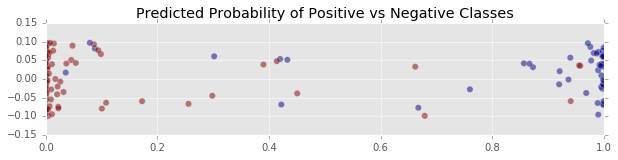

In [289]:
fig, ax = plt.subplots(figsize=(10,2))

_ = ax.scatter(pred_prob_dx[:,0], make_jitter(pred_prob_dx[:,0]), c=np.vectorize(dx_dict.get)(y_test_small),
           s=40, alpha=0.5)
_ = ax.set_xlim(0,1)
_ = ax.set_title('Predicted Probability of Positive vs Negative Classes')

In [302]:
fpr, tpr, thresholds = roc_curve(y_test_small, prob_dx, pos_label=3, drop_intermediate=False)
roc_auc = auc(fpr, tpr)

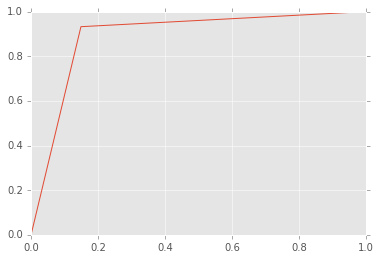

In [303]:
plt.plot(fpr, tpr)

# Classification Metrics

I created logistic regression, random forest, and gradient boosting models. I want to see the MSE and accuracy on train/test, cross-validated (k-fold=10), when predicting DX, and when predicting DXSUB.

In [20]:
#train_data = pd.read_csv('data/train_data.csv')

In [341]:
#%%capture
#classifier_metrics = run_classifiers(train_data)

In [347]:
#with open('classifier_metrics.pkl', 'wb') as f:
    #pickle.dump(classifier_metrics, f)

In [74]:
classification_metrics = pickle.load(open("classifier_metrics.pkl", "rb"))

In [75]:
#[clf][pred][metric][train/test]
# Logistic Regression
lr_dx_mse_train = np.mean(classification_metrics[0][0][0][0])
lr_dx_mse_test = np.mean(classification_metrics[0][0][0][1])
lr_dx_acc_train = np.mean(classification_metrics[0][0][1][0])
lr_dx_acc_test = np.mean(classification_metrics[0][0][1][1])

lr_dxsub_mse_train = np.mean(classification_metrics[0][1][0][0])
lr_dxsub_mse_test = np.mean(classification_metrics[0][1][0][1])
lr_dxsub_acc_train = np.mean(classification_metrics[0][1][1][0])
lr_dxsub_acc_test = np.mean(classification_metrics[0][1][1][1])

# Random Forest
rf_dx_mse_train = np.mean(classification_metrics[1][0][0][0])
rf_dx_mse_test = np.mean(classification_metrics[1][0][0][1])
rf_dx_acc_train = np.mean(classification_metrics[1][0][1][0])
rf_dx_acc_test = np.mean(classification_metrics[1][0][1][1])

rf_dxsub_mse_train = np.mean(classification_metrics[1][1][0][0])
rf_dxsub_mse_test = np.mean(classification_metrics[1][1][0][1])
rf_dxsub_acc_train = np.mean(classification_metrics[1][1][1][0])
rf_dxsub_acc_test = np.mean(classification_metrics[1][1][1][1])

# Gradient Boosting
gb_dx_mse_train = np.mean(classification_metrics[2][0][0][0])
gb_dx_mse_test = np.mean(classification_metrics[2][0][0][1])
gb_dx_acc_train = np.mean(classification_metrics[2][0][1][0])
gb_dx_acc_test = np.mean(classification_metrics[2][0][1][1])

gb_dxsub_mse_train = np.mean(classification_metrics[2][1][0][0])
gb_dxsub_mse_test = np.mean(classification_metrics[2][1][0][1])
gb_dxsub_acc_train = np.mean(classification_metrics[2][1][1][0])
gb_dxsub_acc_test = np.mean(classification_metrics[2][1][1][1])

In [76]:
# Make dataframes
metrics_dx_dict = {'DX_acc_train': [lr_dx_acc_train, rf_dx_acc_train, gb_dx_acc_train],
                   'DX_acc_test': [lr_dx_acc_test, rf_dx_acc_test, gb_dx_acc_test],
                   'DX_mse_train': [lr_dx_mse_train, rf_dx_mse_train, gb_dx_mse_train],
                   'DX_mse_test': [lr_dx_mse_test, rf_dx_mse_test, gb_dx_mse_test]}

metrics_DX = pd.DataFrame(data=metrics_dx_dict,
                          columns=['DX_acc_train', 'DX_acc_test', 'DX_mse_train', 'DX_mse_test'],
                          index=['LogReg', 'RandomForest', 'GradBoost'])

In [77]:
metrics_dxsub_dict = {'DXSUB_acc_train': [lr_dxsub_acc_train, rf_dxsub_acc_train, gb_dxsub_acc_train],
                   'DXSUB_acc_test': [lr_dxsub_acc_test, rf_dxsub_acc_test, gb_dxsub_acc_test],
                   'DXSUB_mse_train': [lr_dxsub_mse_train, rf_dxsub_mse_train, gb_dxsub_mse_train],
                   'DXSUB_mse_test': [lr_dxsub_mse_test, rf_dxsub_mse_test, gb_dxsub_mse_test]}

metrics_DXSUB = pd.DataFrame(data=metrics_dxsub_dict,
                             columns=['DXSUB_acc_train', 'DXSUB_acc_test', 'DXSUB_mse_train', 'DXSUB_mse_test'],
                             index=['LogReg', 'RandomForest', 'GradBoost'])

In [78]:
metrics_DX.round(3)

,DX_acc_train,DX_acc_test,DX_mse_train,DX_mse_test
LogReg,0.945,0.912,0.220,0.345
RandomForest,0.996,0.920,0.018,0.298
GradBoost,0.999,0.932,0.001,0.259


In [79]:
metrics_DXSUB.round(3)

,DXSUB_acc_train,DXSUB_acc_test,DXSUB_mse_train,DXSUB_mse_test
LogReg,0.806,0.765,1.277,1.776
RandomForest,0.989,0.741,0.057,1.352
GradBoost,1.000,0.786,0.000,1.489


# Neuropsych vs TMCQ

Now that I've evaluated models on all the data, I want to check out what accuracy and mse looks like for models run JUST on neuropsych, and JUST on TMCQ.

I'll use the same exact procedure as above, just with different X matrices.

In [80]:
train_data = pd.read_csv('data/train_data.csv')

In [82]:
X_TMCQ = train_data[['Y1_P_TMCQ_ACTIVCONT', 'Y1_P_TMCQ_ACTIVITY', 'Y1_P_TMCQ_AFFIL',
       'Y1_P_TMCQ_ANGER', 'Y1_P_TMCQ_FEAR', 'Y1_P_TMCQ_HIP',
       'Y1_P_TMCQ_IMPULS', 'Y1_P_TMCQ_INHIBIT', 'Y1_P_TMCQ_SAD',
       'Y1_P_TMCQ_SHY', 'Y1_P_TMCQ_SOOTHE', 'Y1_P_TMCQ_ASSERT',
       'Y1_P_TMCQ_ATTFOCUS', 'Y1_P_TMCQ_LIP', 'Y1_P_TMCQ_PERCEPT',
       'Y1_P_TMCQ_DISCOMF', 'Y1_P_TMCQ_OPENNESS', 'Y1_P_TMCQ_SURGENCY',
       'Y1_P_TMCQ_EFFCONT', 'Y1_P_TMCQ_NEGAFFECT']]

In [114]:
X_TMCQ.shape

(603, 20)

In [84]:
X_neuro = train_data[['STOP_SSRTAVE_Y1', 'DPRIME1_Y1', 'DPRIME2_Y1', 'SSBK_NUMCOMPLETE_Y1',
       'SSFD_NUMCOMPLETE_Y1', 'V_Y1', 'Y1_CLWRD_COND1', 'Y1_CLWRD_COND2',
       'Y1_DIGITS_BKWD_RS', 'Y1_DIGITS_FRWD_RS', 'Y1_TRAILS_COND2',
       'Y1_TRAILS_COND3', 'CW_RES', 'TR_RES', 'Y1_TAP_SD_TOT_CLOCK']]

In [86]:
y_all = train_data[['DX', 'DXSUB']]

In [121]:
# Must drop subjects where ALL data is missing, due to matrix factorixation imputation
X_TMCQ_nonull = X_TMCQ.dropna(how='all')
X_neuro_nonull = X_neuro.dropna(how='all')

In [111]:
%%capture
TMCQ_dx, TMCQ_dxsub = run_classifiers(X_TMCQ_nonull, y_all)

In [123]:
TMCQ_dx

,DX_acc_train,DX_acc_test,DX_mse_train,DX_mse_test
LogReg,0.627889,0.605763,1.4877,1.59028
RandomForest,0.991239,0.525311,0.0544415,1.90542
GradBoost,0.931395,0.569068,0.268458,1.66362


In [113]:
TMCQ_dxsub

,DXSUB_acc_train,DXSUB_acc_test,DXSUB_mse_train,DXSUB_mse_test
LogReg,0.470552,0.417966,6.24281,7.03506
RandomForest,0.985457,0.359181,0.189257,6.95472
GradBoost,0.969985,0.37791,0.264709,6.91573


In [124]:
%%capture
neuro_dx, neuro_dxsub = run_classifiers(X_neuro_nonull, y_all)

In [126]:
neuro_dx

,DX_acc_train,DX_acc_test,DX_mse_train,DX_mse_test
LogReg,0.635539,0.606813,1.46691,1.57261
RandomForest,0.990516,0.528826,0.0461788,1.77317
GradBoost,0.922075,0.575437,0.322411,1.78029


In [127]:
neuro_dxsub

,DXSUB_acc_train,DXSUB_acc_test,DXSUB_mse_train,DXSUB_mse_test
LogReg,0.465677,0.409993,6.32423,7.21003
RandomForest,0.984127,0.389553,0.163682,6.96321
GradBoost,0.977943,0.365479,0.214392,6.90692


# XGBoost model

Exploring more "modern" boosting techniques, starting with XGBoost. If it looks promising, I'll work on hyperparam tuning on this model.

In [128]:
param = {'max_depth':2, 'eta':0.1, 'objective':'binary:logistic'}

In [151]:
from xgboost import XGBClassifier

In [152]:
xgb = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)

In [215]:
train_data_small = train_data.sample(n=200)

In [216]:
#binarize data

In [217]:
X_train = train_data_small.drop(columns=['DX','DXSUB'])
y_train = train_data_small[['DX','DXSUB']]

In [224]:
y_train['DXSUB'].value_counts()

5.0    93
1.0    75
3.0    30
4.0     2
Name: DXSUB, dtype: int64

In [225]:
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [226]:
list_of_metrics = [accuracy_score, log_loss]
name_of_metrics = ['acc', 'logloss']
list_of_classifiers = [LogisticRegression(), RandomForestClassifier()]
name_of_classifiers = ['LogReg', 'RandomForest']

In [229]:
test_df = run_classifiers(X_train, y_train,
                          list_of_classifiers=list_of_classifiers,
                          name_of_classifiers=name_of_classifiers,
                          list_of_metrics=list_of_metrics,
                          name_of_metrics=name_of_metrics,
                          n_folds=3)

[MICE] Completing matrix with shape (133, 35)
[MICE] Starting imputation round 1/110, elapsed time 0.001
[MICE] Starting imputation round 2/110, elapsed time 0.008
[MICE] Starting imputation round 3/110, elapsed time 0.016
[MICE] Starting imputation round 4/110, elapsed time 0.024
[MICE] Starting imputation round 5/110, elapsed time 0.033
[MICE] Starting imputation round 6/110, elapsed time 0.041
[MICE] Starting imputation round 7/110, elapsed time 0.048
[MICE] Starting imputation round 8/110, elapsed time 0.056
[MICE] Starting imputation round 9/110, elapsed time 0.064
[MICE] Starting imputation round 10/110, elapsed time 0.074
[MICE] Starting imputation round 11/110, elapsed time 0.082
[MICE] Starting imputation round 12/110, elapsed time 0.090
[MICE] Starting imputation round 13/110, elapsed time 0.099
[MICE] Starting imputation round 14/110, elapsed time 0.106
[MICE] Starting imputation round 15/110, elapsed time 0.114
[MICE] Starting imputation round 16/110, elapsed time 0.121
[MI

[MICE] Starting imputation round 54/110, elapsed time 0.194
[MICE] Starting imputation round 55/110, elapsed time 0.198
[MICE] Starting imputation round 56/110, elapsed time 0.201
[MICE] Starting imputation round 57/110, elapsed time 0.205
[MICE] Starting imputation round 58/110, elapsed time 0.210
[MICE] Starting imputation round 59/110, elapsed time 0.213
[MICE] Starting imputation round 60/110, elapsed time 0.218
[MICE] Starting imputation round 61/110, elapsed time 0.222
[MICE] Starting imputation round 62/110, elapsed time 0.226
[MICE] Starting imputation round 63/110, elapsed time 0.230
[MICE] Starting imputation round 64/110, elapsed time 0.233
[MICE] Starting imputation round 65/110, elapsed time 0.237
[MICE] Starting imputation round 66/110, elapsed time 0.241
[MICE] Starting imputation round 67/110, elapsed time 0.245
[MICE] Starting imputation round 68/110, elapsed time 0.249
[MICE] Starting imputation round 69/110, elapsed time 0.252
[MICE] Starting imputation round 70/110,

[MICE] Starting imputation round 83/110, elapsed time 0.625
[MICE] Starting imputation round 84/110, elapsed time 0.633
[MICE] Starting imputation round 85/110, elapsed time 0.641
[MICE] Starting imputation round 86/110, elapsed time 0.650
[MICE] Starting imputation round 87/110, elapsed time 0.657
[MICE] Starting imputation round 88/110, elapsed time 0.664
[MICE] Starting imputation round 89/110, elapsed time 0.671
[MICE] Starting imputation round 90/110, elapsed time 0.678
[MICE] Starting imputation round 91/110, elapsed time 0.686
[MICE] Starting imputation round 92/110, elapsed time 0.692
[MICE] Starting imputation round 93/110, elapsed time 0.699
[MICE] Starting imputation round 94/110, elapsed time 0.706
[MICE] Starting imputation round 95/110, elapsed time 0.713
[MICE] Starting imputation round 96/110, elapsed time 0.720
[MICE] Starting imputation round 97/110, elapsed time 0.727
[MICE] Starting imputation round 98/110, elapsed time 0.734
[MICE] Starting imputation round 99/110,

[MICE] Starting imputation round 15/110, elapsed time 0.048
[MICE] Starting imputation round 16/110, elapsed time 0.055
[MICE] Starting imputation round 17/110, elapsed time 0.060
[MICE] Starting imputation round 18/110, elapsed time 0.065
[MICE] Starting imputation round 19/110, elapsed time 0.070
[MICE] Starting imputation round 20/110, elapsed time 0.074
[MICE] Starting imputation round 21/110, elapsed time 0.078
[MICE] Starting imputation round 22/110, elapsed time 0.082
[MICE] Starting imputation round 23/110, elapsed time 0.086
[MICE] Starting imputation round 24/110, elapsed time 0.090
[MICE] Starting imputation round 25/110, elapsed time 0.094
[MICE] Starting imputation round 26/110, elapsed time 0.098
[MICE] Starting imputation round 27/110, elapsed time 0.102
[MICE] Starting imputation round 28/110, elapsed time 0.106
[MICE] Starting imputation round 29/110, elapsed time 0.109
[MICE] Starting imputation round 30/110, elapsed time 0.113
[MICE] Starting imputation round 31/110,

[MICE] Starting imputation round 41/110, elapsed time 0.278
[MICE] Starting imputation round 42/110, elapsed time 0.284
[MICE] Starting imputation round 43/110, elapsed time 0.292
[MICE] Starting imputation round 44/110, elapsed time 0.299
[MICE] Starting imputation round 45/110, elapsed time 0.306
[MICE] Starting imputation round 46/110, elapsed time 0.313
[MICE] Starting imputation round 47/110, elapsed time 0.319
[MICE] Starting imputation round 48/110, elapsed time 0.326
[MICE] Starting imputation round 49/110, elapsed time 0.334
[MICE] Starting imputation round 50/110, elapsed time 0.341
[MICE] Starting imputation round 51/110, elapsed time 0.350
[MICE] Starting imputation round 52/110, elapsed time 0.358
[MICE] Starting imputation round 53/110, elapsed time 0.366
[MICE] Starting imputation round 54/110, elapsed time 0.373
[MICE] Starting imputation round 55/110, elapsed time 0.382
[MICE] Starting imputation round 56/110, elapsed time 0.390
[MICE] Starting imputation round 57/110,

[MICE] Starting imputation round 71/110, elapsed time 0.517
[MICE] Starting imputation round 72/110, elapsed time 0.524
[MICE] Starting imputation round 73/110, elapsed time 0.532
[MICE] Starting imputation round 74/110, elapsed time 0.539
[MICE] Starting imputation round 75/110, elapsed time 0.546
[MICE] Starting imputation round 76/110, elapsed time 0.554
[MICE] Starting imputation round 77/110, elapsed time 0.561
[MICE] Starting imputation round 78/110, elapsed time 0.568
[MICE] Starting imputation round 79/110, elapsed time 0.575
[MICE] Starting imputation round 80/110, elapsed time 0.582
[MICE] Starting imputation round 81/110, elapsed time 0.589
[MICE] Starting imputation round 82/110, elapsed time 0.596
[MICE] Starting imputation round 83/110, elapsed time 0.603
[MICE] Starting imputation round 84/110, elapsed time 0.610
[MICE] Starting imputation round 85/110, elapsed time 0.617
[MICE] Starting imputation round 86/110, elapsed time 0.624
[MICE] Starting imputation round 87/110,

[MICE] Starting imputation round 103/110, elapsed time 0.320
[MICE] Starting imputation round 104/110, elapsed time 0.323
[MICE] Starting imputation round 105/110, elapsed time 0.326
[MICE] Starting imputation round 106/110, elapsed time 0.329
[MICE] Starting imputation round 107/110, elapsed time 0.332
[MICE] Starting imputation round 108/110, elapsed time 0.335
[MICE] Starting imputation round 109/110, elapsed time 0.339
[MICE] Starting imputation round 110/110, elapsed time 0.343
0 <function accuracy_score at 0x7f1452517bf8>
1.0
i did it
1 <function log_loss at 0x7f1452525400>
13.2444990647
i did it
[MICE] Completing matrix with shape (133, 35)
[MICE] Starting imputation round 1/110, elapsed time 0.001
[MICE] Starting imputation round 2/110, elapsed time 0.008
[MICE] Starting imputation round 3/110, elapsed time 0.016
[MICE] Starting imputation round 4/110, elapsed time 0.023
[MICE] Starting imputation round 5/110, elapsed time 0.030
[MICE] Starting imputation round 6/110, elapsed t

[MICE] Starting imputation round 59/110, elapsed time 0.179
[MICE] Starting imputation round 60/110, elapsed time 0.182
[MICE] Starting imputation round 61/110, elapsed time 0.186
[MICE] Starting imputation round 62/110, elapsed time 0.189
[MICE] Starting imputation round 63/110, elapsed time 0.192
[MICE] Starting imputation round 64/110, elapsed time 0.195
[MICE] Starting imputation round 65/110, elapsed time 0.198
[MICE] Starting imputation round 66/110, elapsed time 0.202
[MICE] Starting imputation round 67/110, elapsed time 0.205
[MICE] Starting imputation round 68/110, elapsed time 0.208
[MICE] Starting imputation round 69/110, elapsed time 0.212
[MICE] Starting imputation round 70/110, elapsed time 0.215
[MICE] Starting imputation round 71/110, elapsed time 0.218
[MICE] Starting imputation round 72/110, elapsed time 0.222
[MICE] Starting imputation round 73/110, elapsed time 0.225
[MICE] Starting imputation round 74/110, elapsed time 0.228
[MICE] Starting imputation round 75/110,

[MICE] Starting imputation round 10/110, elapsed time 0.066
[MICE] Starting imputation round 11/110, elapsed time 0.073
[MICE] Starting imputation round 12/110, elapsed time 0.080
[MICE] Starting imputation round 13/110, elapsed time 0.088
[MICE] Starting imputation round 14/110, elapsed time 0.095
[MICE] Starting imputation round 15/110, elapsed time 0.102
[MICE] Starting imputation round 16/110, elapsed time 0.109
[MICE] Starting imputation round 17/110, elapsed time 0.115
[MICE] Starting imputation round 18/110, elapsed time 0.122
[MICE] Starting imputation round 19/110, elapsed time 0.129
[MICE] Starting imputation round 20/110, elapsed time 0.136
[MICE] Starting imputation round 21/110, elapsed time 0.143
[MICE] Starting imputation round 22/110, elapsed time 0.150
[MICE] Starting imputation round 23/110, elapsed time 0.156
[MICE] Starting imputation round 24/110, elapsed time 0.163
[MICE] Starting imputation round 25/110, elapsed time 0.171
[MICE] Starting imputation round 26/110,

[MICE] Starting imputation round 42/110, elapsed time 0.311
[MICE] Starting imputation round 43/110, elapsed time 0.318
[MICE] Starting imputation round 44/110, elapsed time 0.327
[MICE] Starting imputation round 45/110, elapsed time 0.335
[MICE] Starting imputation round 46/110, elapsed time 0.342
[MICE] Starting imputation round 47/110, elapsed time 0.351
[MICE] Starting imputation round 48/110, elapsed time 0.357
[MICE] Starting imputation round 49/110, elapsed time 0.365
[MICE] Starting imputation round 50/110, elapsed time 0.371
[MICE] Starting imputation round 51/110, elapsed time 0.380
[MICE] Starting imputation round 52/110, elapsed time 0.387
[MICE] Starting imputation round 53/110, elapsed time 0.394
[MICE] Starting imputation round 54/110, elapsed time 0.401
[MICE] Starting imputation round 55/110, elapsed time 0.408
[MICE] Starting imputation round 56/110, elapsed time 0.417
[MICE] Starting imputation round 57/110, elapsed time 0.424
[MICE] Starting imputation round 58/110,

[MICE] Starting imputation round 95/110, elapsed time 0.296
[MICE] Starting imputation round 96/110, elapsed time 0.299
[MICE] Starting imputation round 97/110, elapsed time 0.302
[MICE] Starting imputation round 98/110, elapsed time 0.305
[MICE] Starting imputation round 99/110, elapsed time 0.308
[MICE] Starting imputation round 100/110, elapsed time 0.311
[MICE] Starting imputation round 101/110, elapsed time 0.315
[MICE] Starting imputation round 102/110, elapsed time 0.319
[MICE] Starting imputation round 103/110, elapsed time 0.323
[MICE] Starting imputation round 104/110, elapsed time 0.326
[MICE] Starting imputation round 105/110, elapsed time 0.329
[MICE] Starting imputation round 106/110, elapsed time 0.332
[MICE] Starting imputation round 107/110, elapsed time 0.335
[MICE] Starting imputation round 108/110, elapsed time 0.339
[MICE] Starting imputation round 109/110, elapsed time 0.342
[MICE] Starting imputation round 110/110, elapsed time 0.345
0 <function accuracy_score at

ValueError: y_true and y_pred contain different number of classes 4, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [ 1.  3.  4.  5.]

In [230]:
from sklearn.model_selection import cross_val_score

In [233]:
test = cross_val_score(LogisticRegression(), X_train.values, y_train['DX'].values,
                scoring='accuracy',
                cv=3)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').